# Import Data

In [ ]:
# !pip install -q kaggle

In [ ]:
# cred = {"username":"irfanhakimm","key":"a5b6d676c709f55fdcba23308fb010ba"}

In [ ]:
# !mkdir ~/.kaggle/
# !touch ~/.kaggle/kaggle.json

# api_token = cred
# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c ristek-datathon-2024

 99% 141M/143M [00:01<00:00, 94.2MB/s]
100% 143M/143M [00:01<00:00, 80.4MB/s]


In [ ]:
# !unzip ristek-datathon-2024.zip

Archive:  ristek-datathon-2024.zip
  inflating: loan_activities.csv     
  inflating: non_borrower_user.csv   
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Accessing Data

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.metrics import average_precision_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# !pip install git+https://github.com/awslabs/datawig.git

In [ ]:
# !pip install pandas==0.25.3 scikit-learn==0.22.1 typing==3.6.6

In [ ]:
# !git clone https://github.com/awslabs/datawig

In [ ]:
# cd datawig

In [ ]:
# pip install .

In [ ]:
# !pip uninstall numpy
# !pip install numpy==1.23.1

In [ ]:
# import datawig

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.000000,...,0.0,0.0,NaN,0.000000e+00,8.988380e+01,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,...,0.0,0.0,0.0,0.000000e+00,3.314018e+01,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.750000,...,NaN,0.0,NaN,0.000000e+00,4.010890e+05,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.000000,...,NaN,0.0,0.0,0.000000e+00,2.424884e+04,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.000000e+00,2.758002e+04,0.000000e+00,0.0,NaN,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,COacmK2gmfhhWCrh73,103.255.15.150,53314,128.199.242.104,443,NaN,28.153470,36.599511,NaN,1.300000,...,0.0,5.0,0.0,1.092664e+08,3.551960e+05,0.000000e+00,29200.0,65160.0,402.0,Probing
416469,CUxjxWgzdF71Y5kXc,103.255.15.23,59005,8.8.8.8,53,NaN,NaN,80.762198,NaN,1.000000,...,0.0,0.0,NaN,0.000000e+00,2.476406e+04,0.000000e+00,0.0,0.0,NaN,Benign
416470,CUU9WM3olirlj8Absj,103.255.15.23,7978,128.199.88.81,443,NaN,46.391519,NaN,90.658236,0.954198,...,NaN,113.0,0.0,2.262403e+05,2.823808e+06,0.000000e+00,NaN,28960.0,0.0,Benign
416471,ChiYNu2wqDXFBTzHV4,fe80::c1a7:7791:969e:3c06,55784,2600:1901:0:38d7::,80,0.000000,0.000000,0.000000,0.000000,NaN,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,28800.0,0.0,NaN,Benign


In [ ]:
test_df

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,backward_bulk_bytes,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size
0,ClDOIi3yLGMfeRPzAc,103.255.15.23,49188,13.227.228.83,443,1.738424,8.628505,NaN,16.681776,NaN,...,0.0,0.0,NaN,NaN,0.000000e+00,1.738440e+06,NaN,29200.0,65535.0,80.0
1,C9chsd1cHTOBBHe6Q2,202.169.224.219,5678,255.255.255.255,5678,0.000000,0.000000,0.000000,0.000000,0.0,...,NaN,0.0,NaN,NaN,NaN,0.000000e+00,0.0,0.0,0.0,0.0
2,CUOe3U1NC5Nln7cItf,103.255.15.150,32976,8.8.8.8,53,NaN,80.446972,NaN,NaN,1.0,...,0.0,NaN,0.0,0.0,0.000000e+00,2.486110e+04,0.0,0.0,0.0,NaN
3,C6QhB04KTRUYOY2rMk,103.255.15.150,48606,128.199.242.104,443,NaN,NaN,51.891033,88.956056,NaN,...,4585.0,0.0,5.0,0.0,1.544649e+07,2.697961e+05,0.0,29200.0,NaN,NaN
4,C60oC51SZNEhCXlX6c,103.255.15.150,34794,128.199.242.104,443,0.326490,30.628816,NaN,70.446278,1.3,...,4585.0,0.0,NaN,NaN,5.211622e+07,NaN,NaN,29200.0,NaN,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138800,CWXgM92AOvagYVekD3,103.255.15.67,52975,103.255.15.23,161,NaN,7307.149826,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,1.368523e+02,0.0,0.0,0.0,0.0
138801,CMmDuU3aNTnOz4ZwSi,103.255.15.27,37214,103.255.15.23,42001,0.000144,6944.211921,NaN,NaN,1.0,...,NaN,NaN,0.0,0.0,0.000000e+00,NaN,0.0,29200.0,0.0,29200.0
138802,CQO5h64B0lXTYRlsNf,103.255.15.150,38336,8.8.8.8,53,NaN,NaN,33.424744,NaN,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,2.991796e+04,0.0,NaN,0.0,NaN
138803,CWZZN23jtBV7sZsBLi,103.255.15.150,37267,8.8.8.8,53,0.025681,77.878530,NaN,155.757060,NaN,...,0.0,0.0,0.0,0.0,0.000000e+00,2.568102e+04,0.0,0.0,0.0,0.0


# EDA

In [ ]:
print(train_df.isna().sum())

id                                   0
origin_host                          0
origin_port                          0
response_host                        0
response_port                        0
flow_duration                   117064
forward_packets_per_sec         123392
backward_packets_per_sec         92239
flow_packets_per_sec            111750
down_up_ratio                   123615
flow_FIN_flags                  112049
flow_SYN_flags                   91010
flow_RST_flags                  105436
forward_PSH_flags               116525
backward_PSH_flags               63554
flow_ACK_flags                  127531
forward_URG_flags               104300
backward_URG_flags               94548
flow_CWR_flags                  139659
flow_ECE_flags                   77302
forward_pkts_payload            136281
backward_pkts_payload           139662
flow_pkts_payload                83341
forward_iat                      69025
backward_iat                    110264
flow_iat                 

In [ ]:
print(test_df.isna().sum())

id                                  0
origin_host                         0
origin_port                         0
response_host                       0
response_port                       0
flow_duration                   52025
forward_packets_per_sec         42489
backward_packets_per_sec        47667
flow_packets_per_sec            48340
down_up_ratio                   40014
flow_FIN_flags                  23723
flow_SYN_flags                  29906
flow_RST_flags                  45122
forward_PSH_flags               46350
backward_PSH_flags              33820
flow_ACK_flags                  39571
forward_URG_flags               31030
backward_URG_flags              41778
flow_CWR_flags                  27383
flow_ECE_flags                  45202
forward_pkts_payload            35802
backward_pkts_payload           33083
flow_pkts_payload               41562
forward_iat                     32005
backward_iat                    33922
flow_iat                        41747
payload_byte

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            416473 non-null  object 
 1   origin_host                   416473 non-null  object 
 2   origin_port                   416473 non-null  int64  
 3   response_host                 416473 non-null  object 
 4   response_port                 416473 non-null  int64  
 5   flow_duration                 299409 non-null  float64
 6   forward_packets_per_sec       293081 non-null  float64
 7   backward_packets_per_sec      324234 non-null  float64
 8   flow_packets_per_sec          304723 non-null  float64
 9   down_up_ratio                 292858 non-null  float64
 10  flow_FIN_flags                304424 non-null  float64
 11  flow_SYN_flags                325463 non-null  float64
 12  flow_RST_flags                311037 non-nul

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            138805 non-null  object 
 1   origin_host                   138805 non-null  object 
 2   origin_port                   138805 non-null  int64  
 3   response_host                 138805 non-null  object 
 4   response_port                 138805 non-null  int64  
 5   flow_duration                 86780 non-null   float64
 6   forward_packets_per_sec       96316 non-null   float64
 7   backward_packets_per_sec      91138 non-null   float64
 8   flow_packets_per_sec          90465 non-null   float64
 9   down_up_ratio                 98791 non-null   float64
 10  flow_FIN_flags                115082 non-null  float64
 11  flow_SYN_flags                108899 non-null  float64
 12  flow_RST_flags                93683 non-null

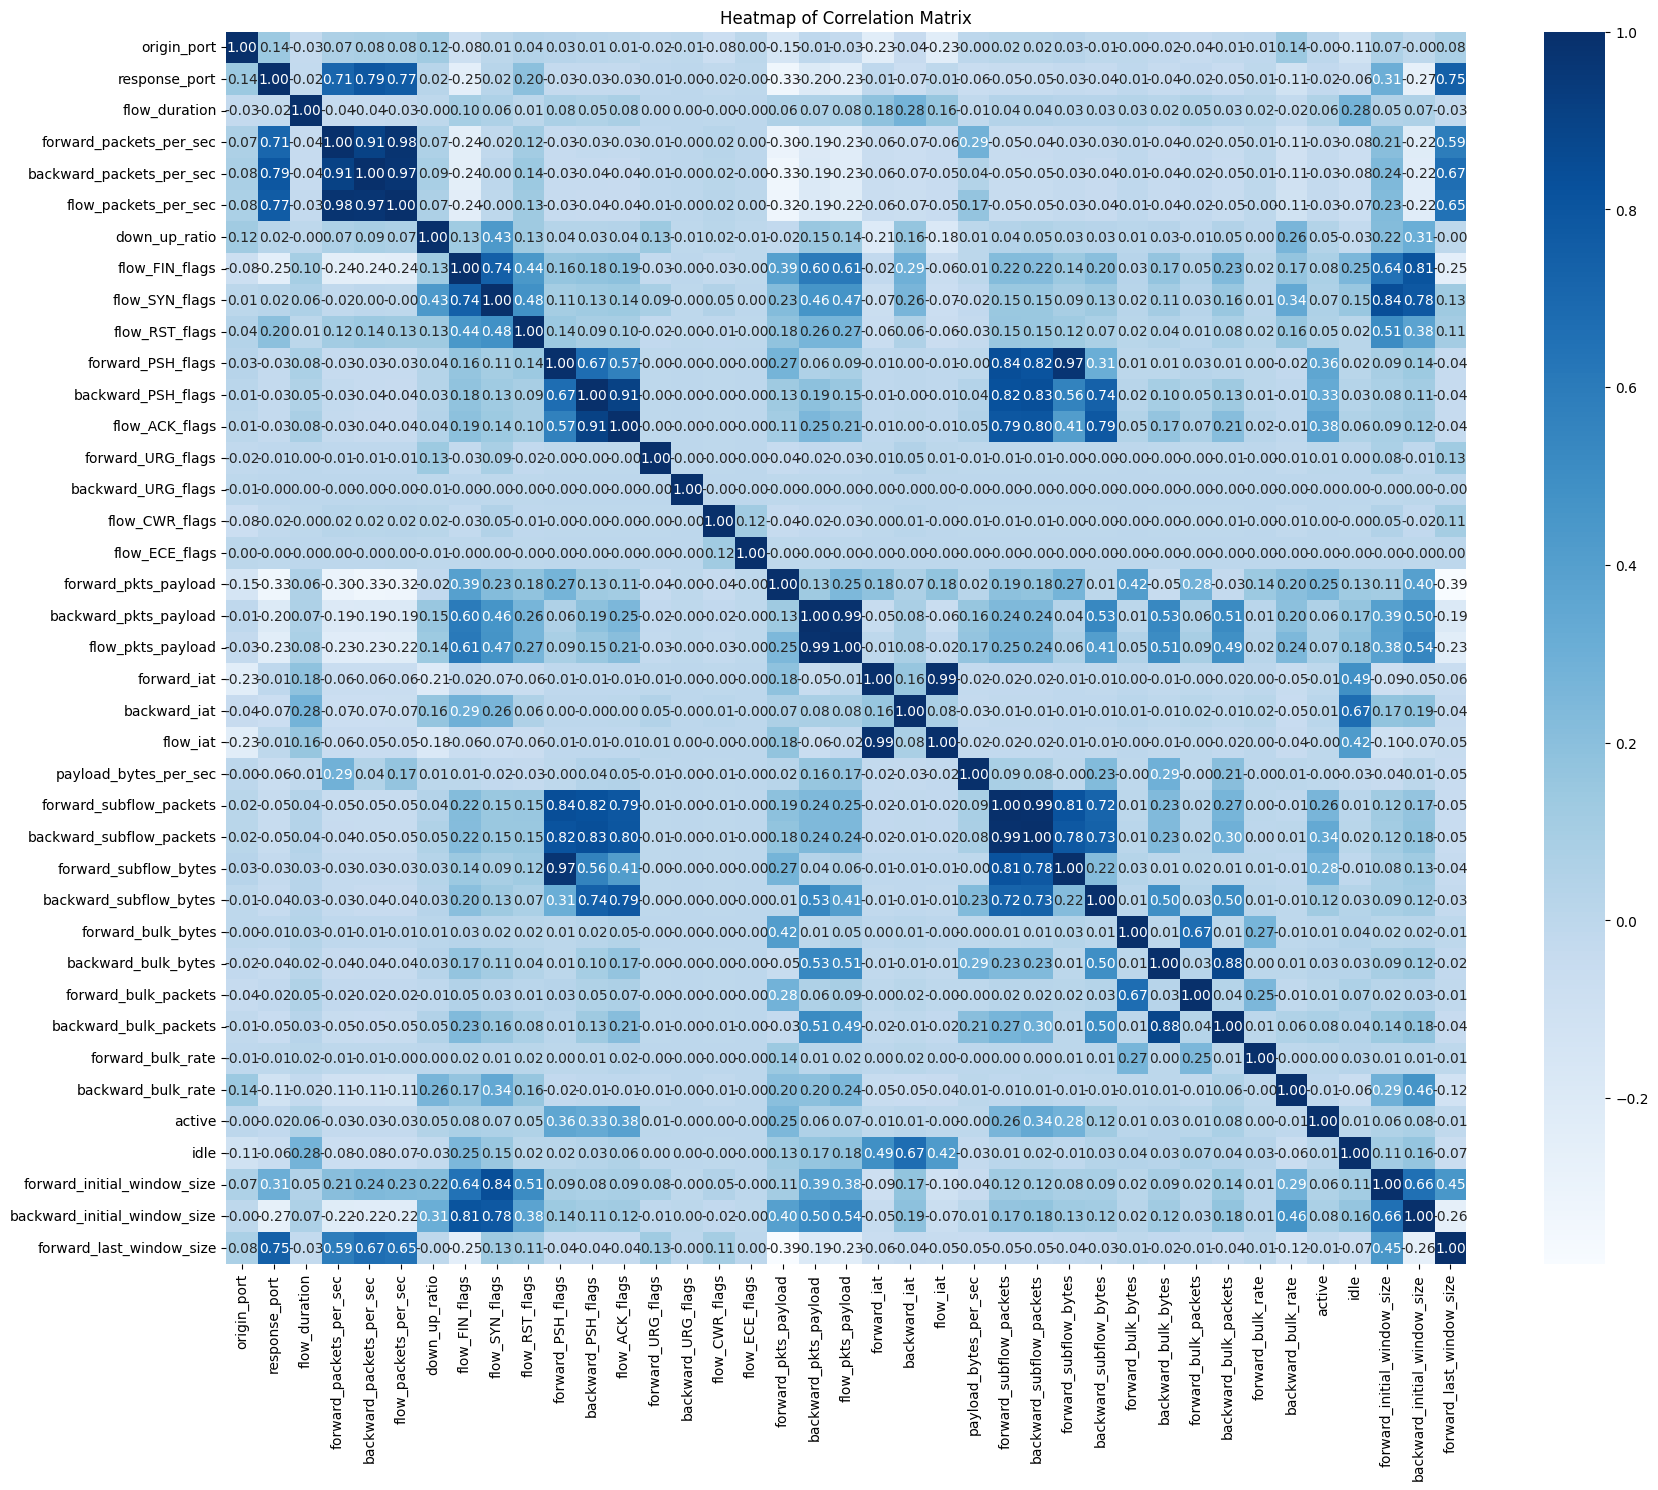

In [ ]:
temp = train_df.drop(['id', 'origin_host', 'response_host', 'traffic'], axis=1)
correlation_matrix = temp.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Misalnya train_df sudah di-load
# Misalnya: train_df = pd.read_csv('train.csv')

# Pilih hanya kolom yang bertipe float atau integer
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Subset dari dataframe hanya dengan kolom numerik
numerical_data = train_df[numerical_cols]

# Menggunakan KNNImputer untuk mengisi nilai yang hilang
imputer = KNNImputer(n_neighbors=5)  # n_neighbors bisa disesuaikan
imputed_data = imputer.fit_transform(numerical_data)

# Mengubah kembali hasil imputasi menjadi DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols)

# Menggabungkan kembali data yang telah diimputasi dengan kolom non-numerik
train_df[numerical_cols] = imputed_df


In [ ]:
# from sklearn.impute import KNNImputer
# import pandas as pd
# import numpy as np

# # Prepare the data for imputation
# columns_to_impute = ['loan_type_1']
# impute_data = merged_test_df[columns_to_impute]

# # Initialize KNN imputer
# imputer = KNNImputer(n_neighbors=5)

# # Fit the imputer and transform the data
# imputed_data = imputer.fit_transform(impute_data)

# # Convert the result back to a DataFrame
# imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# # Replace the imputed 'loan_type_1' column in the original DataFrame
# merged_test_df['loan_type_1'] = imputed_df['loan_type_1']

# # Print the DataFrame to verify changes
# print(merged_test_df.head())


In [ ]:
# from sklearn.impute import KNNImputer

# # Pisahkan kolom user_id
# user_ids = merged_train_df['user_id']

# # Drop user_id sebelum menggunakan KNNImputer
# features = merged_train_df.drop(columns=['user_id'])

# # Inisialisasi KNNImputer
# imputer = KNNImputer(n_neighbors=2)

# # Mengisi nilai yang hilang
# imputed_data = imputer.fit_transform(features)

# # Membuat dataframe baru dari hasil imputasi
# imputed_df = pd.DataFrame(imputed_data, columns=features.columns)

# # Gabungkan kembali user_id dengan dataframe yang telah diimputasi
# imputed_df['user_id'] = user_ids

# # Membulatkan kolom label (karena ini adalah biner)
# imputed_df['label'] = imputed_df['label'].round().astype(int)

# # Mengubah kolom loan_type_1 dan loan_type_2 kembali menjadi boolean jika diperlukan
# imputed_df[[ 'loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5', 'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9', 'loan_type_10', 'loan_type_11']] = imputed_df[[ 'loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5', 'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9', 'loan_type_10', 'loan_type_11']].astype(bool)
# merged_train_df = imputed_df

In [ ]:
# merged_train_df_imputed.to_csv('merged_train_df_imputed.csv', index=False)

In [ ]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# import numpy as np

# # Fungsi untuk mendapatkan subset data di sekitar nilai yang hilang
# def get_surrounding_data(df, missing_index, window=100):
#     start_index = max(0, missing_index - window)
#     end_index = min(len(df), missing_index + window + 1)
#     return df.iloc[start_index:end_index]

# # Proses imputasi untuk kolom 'label' di dataframe
# def impute_label_knn(df, user_id_col='user_id', label_col='label', window=100, n_neighbors=2):
#     # Pisahkan kolom user_i
#     user_ids = df[user_id_col]

#     # Pisahkan kolom label
#     labels = df[label_col]

#     # Drop user_id sebelum menggunakan KNNImputer
#     # features = df.drop(columns=[user_id_col, label_col])

#     # Cari indeks dari baris yang memiliki nilai hilang di kolom label
#     missing_indices = np.where(labels.isnull())[0]

#     # Inisialisasi dataframe untuk hasil imputasi
#     imputed_labels = labels.copy()

#     # Inisialisasi KNNImputer
#     imputer = KNNImputer(n_neighbors=n_neighbors)

#     # Imputasi nilai hilang dengan subset data
#     for idx in missing_indices:
#         surrounding_data = get_surrounding_data(df, idx, window)
#         surrounding_labels = surrounding_data[[label_col]]
#         surrounding_features = surrounding_data.drop(columns=[user_id_col, label_col])

#         imputer.fit(surrounding_features)
#         imputed_label = imputer.transform(surrounding_features)[0, -1]

#         imputed_labels.iloc[idx] = imputed_label

#     # Gabungkan kembali user_id dan label yang telah diimputasi ke dataframe asli
#     df[label_col] = imputed_labels

#     return df

# # Proses imputasi untuk merged_train_df
# merged_train_df_imputed = impute_label_knn(merged_train_df)

# # Membulatkan kolom label (karena ini adalah biner)
# merged_train_df_imputed['label'] = merged_train_df_imputed['label'].round().astype(int)

# # Mengubah kolom loan_type_1 hingga loan_type_11 kembali menjadi boolean jika diperlukan
# # loan_type_columns = [f'loan_type_{i}' for i in range(1, 12)]
# # merged_train_df_imputed[loan_type_columns] = merged_train_df_imputed[loan_type_columns].astype(bool)

# # Proses imputasi untuk merged_test_df
# # merged_test_df_imputed = impute_label_knn(merged_test_df)

# # Mengubah kolom loan_type_1 hingga loan_type_11 kembali menjadi boolean jika diperlukan
# # merged_test_df_imputed[loan_type_columns] = merged_test_df_imputed[loan_type_columns].astype(bool)


In [ ]:
# #Train
# # merged_train_df['loan_type'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type'].fillna(method='ffill', inplace=True)
# # merged_train_df['label'].fillna(method='ffill', inplace=True)
# # merged_train_df['label'].fillna(method='bfill', inplace=True)
# # merged_train_df['ts'].fillna(merged_train_df['ts'].mean(), inplace=True)
# merged_train_df = merged_train_df.drop(['reference_contact'],axis=1)
# # merged_train_df['loan_type_1'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_2'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_3'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_4'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_5'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_6'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_7'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_8'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_9'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_10'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_11'].fillna(method='ffill', inplace=True)
# # merged_train_df['loan_type_1'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_2'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_3'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_4'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_5'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_6'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_7'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_8'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_9'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_10'].fillna(method='bfill', inplace=True)
# # merged_train_df['loan_type_11'].fillna(method='bfill', inplace=True)

# #Test
# # merged_test_df['loan_type'].fillna(method='bfill', inplace=True)
# # merged_test_df['ts'].fillna(merged_test_df['ts'].mean(), inplace=True)
# merged_test_df = merged_test_df.drop(['reference_contact'],axis=1)
# # merged_test_df['loan_type_1'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_2'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_3'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_4'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_5'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_6'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_7'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_8'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_9'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_10'].fillna(method='bfill', inplace=True)
# # merged_test_df['loan_type_11'].fillna(method='bfill', inplace=True)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            416473 non-null  object 
 1   origin_host                   416473 non-null  object 
 2   origin_port                   416473 non-null  int64  
 3   response_host                 416473 non-null  object 
 4   response_port                 416473 non-null  int64  
 5   flow_duration                 299409 non-null  float64
 6   forward_packets_per_sec       293081 non-null  float64
 7   backward_packets_per_sec      324234 non-null  float64
 8   flow_packets_per_sec          304723 non-null  float64
 9   down_up_ratio                 292858 non-null  float64
 10  flow_FIN_flags                304424 non-null  float64
 11  flow_SYN_flags                325463 non-null  float64
 12  flow_RST_flags                311037 non-nul

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            138805 non-null  object 
 1   origin_host                   138805 non-null  object 
 2   origin_port                   138805 non-null  int64  
 3   response_host                 138805 non-null  object 
 4   response_port                 138805 non-null  int64  
 5   flow_duration                 86780 non-null   float64
 6   forward_packets_per_sec       96316 non-null   float64
 7   backward_packets_per_sec      91138 non-null   float64
 8   flow_packets_per_sec          90465 non-null   float64
 9   down_up_ratio                 98791 non-null   float64
 10  flow_FIN_flags                115082 non-null  float64
 11  flow_SYN_flags                108899 non-null  float64
 12  flow_RST_flags                93683 non-null

In [ ]:
# # Mengisi nilai yang hilang di merged_train_df dengan modus
# for col in ['loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5',
#             'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9', 'loan_type_10', 'loan_type_11']:
#     mode_value = merged_train_df[col].mode()[0]
#     merged_train_df[col].fillna(mode_value, inplace=True)

# # Mengisi nilai yang hilang di merged_test_df dengan modus
# for col in ['loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5',
#             'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9', 'loan_type_10', 'loan_type_11']:
#     mode_value = merged_test_df[col].mode()[0]
#     merged_test_df[col].fillna(mode_value, inplace=True)

In [ ]:
# from sklearn.impute import SimpleImputer

# # Inisialisasi SimpleImputer dengan strategi modus
# imputer = SimpleImputer(strategy='most_frequent')

# # List kolom yang perlu diimputasi
# columns_to_impute = ['loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5',
#                      'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9', 'loan_type_10', 'loan_type_11']

# # Mengisi nilai yang hilang di merged_train_df
# merged_train_df[columns_to_impute] = imputer.fit_transform(merged_train_df[columns_to_impute])

# # Mengisi nilai yang hilang di merged_test_df
# merged_test_df[columns_to_impute] = imputer.transform(merged_test_df[columns_to_impute])


In [ ]:
# import datawig
# import pandas as pd

# # Select columns to be imputed
# columns_to_impute = ['label']

# # Extract the relevant subset of data
# impute_data = merged_train_df[columns_to_impute + ['user_id']]  # Include user_id if it helps in the imputation

# # Initialize the SimpleImputer
# imputer = datawig.SimpleImputer(
#     input_columns=[col for col in impute_data.columns if col != 'label'],
#     output_column='label'
# )

# # Fit the imputer model
# imputer.fit(train_df=impute_data)

# # Impute missing values
# imputed_data = imputer.predict(impute_data)

# # Replace the imputed column in the original DataFrame
# merged_train_df['label'] = imputed_data['label']

# # Print the DataFrame to verify changes
# print(merged_train_df.head())


In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# import pandas as pd

# # Inisialisasi IterativeImputer
# imputer = IterativeImputer(random_state=0)

# # List kolom yang perlu diimputasi
# columns_to_impute = ['label']

# # Mengisi nilai yang hilang di merged_train_df
# merged_train_df[columns_to_impute] = imputer.fit_transform(merged_train_df[columns_to_impute])

# # Mengisi nilai yang hilang di merged_test_df
# # merged_test_df[columns_to_impute] = imputer.fit_transform(merged_test_df[columns_to_impute])

# # Cetak hasil imputasi
# print("Hasil imputasi untuk merged_train_df:")
# print(merged_train_df)
# print("\nHasil imputasi untuk merged_test_df:")
# print(merged_test_df)

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# import pandas as pd

# # Inisialisasi IterativeImputer
# imputer = IterativeImputer(random_state=0)

# # List kolom yang perlu diimputasi
# columns_to_impute = ['reference_contact', 'ts']

# # Mengisi nilai yang hilang di merged_train_df
# # merged_train_df[columns_to_impute] = imputer.fit_transform(merged_train_df[columns_to_impute])

# # Mengisi nilai yang hilang di merged_test_df
# merged_test_df[columns_to_impute] = imputer.fit_transform(merged_test_df[columns_to_impute])

# # Cetak hasil imputasi
# print("Hasil imputasi untuk merged_train_df:")
# print(merged_train_df)
# print("\nHasil imputasi untuk merged_test_df:")
# print(merged_test_df)

In [ ]:
# List kolom yang perlu diubah nilai "FALSE" dan "TRUE"
columns_to_convert = ['loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5',
                     'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9', 'loan_type_10', 'loan_type_11']

# Definisikan mapping untuk mengubah nilai "FALSE" dan "TRUE" menjadi 0 dan 1
boolean_mapping = {"FALSE": 0, "TRUE": 1}

# Loop melalui kolom-kolom yang perlu diubah
for col in columns_to_convert:
    # Mengubah nilai di merged_train_df
    merged_train_df[col] = merged_train_df[col].map(boolean_mapping).fillna(merged_train_df[col])

    # Mengubah nilai di merged_test_df
    merged_test_df[col] = merged_test_df[col].map(boolean_mapping).fillna(merged_test_df[col])


In [ ]:
print(merged_train_df.isna().sum())
print(merged_test_df.isna().sum())

user_id               0
pc0                   0
pc1                   0
pc2                   0
pc3                   0
pc4                   0
pc5                   0
pc6                   0
pc7                   0
pc8                   0
pc9                   0
pc10                  0
pc11                  0
pc12                  0
pc13                  0
pc14                  0
pc15                  0
pc16                  0
label                 0
ts              1431594
loan_type_1           0
loan_type_2           0
loan_type_3           0
loan_type_4           0
loan_type_5           0
loan_type_6           0
loan_type_7           0
loan_type_8           0
loan_type_9           0
loan_type_10          0
loan_type_11          0
dtype: int64
user_id             0
pc0                 0
pc1                 0
pc2                 0
pc3                 0
pc4                 0
pc5                 0
pc6                 0
pc7                 0
pc8                 0
pc9                 0
p

In [ ]:
temp = train_df.drop(['user_id'], axis=1)
correlation_matrix = temp.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(3, 1, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='ts', data= merged_train_df, hue= 'label', kde= True, ax= ax[0], palette='winter')
ax1.set(xlabel = 'ts')

ax2 = sns.histplot(x ='pc15', data= merged_train_df, hue= 'label', kde= True, ax= ax[1], palette='plasma')
ax2.set(xlabel = 'pc15')

ax3 = sns.histplot(x ='pc16', data= merged_train_df, hue= 'label', kde= True, ax= ax[2], palette='winter')
ax3.set(xlabel = 'pc16')

plt.show()

In [ ]:
merged_train_df[merged_train_df['label'] == 1]

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type_2,loan_type_3,loan_type_4,loan_type_5,loan_type_6,loan_type_7,loan_type_8,loan_type_9,loan_type_10,loan_type_11
252,1080,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
305,1307,1.0,1.0,0.295,0.285,0.966102,0.5,0.346,0.057,0.344,...,False,False,False,True,False,False,False,False,False,False
481,2001,0.0,1.0,0.490,0.455,0.928571,0.4,1.046,0.126,1.036,...,False,False,True,True,False,False,False,False,False,False
482,2002,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
515,2129,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857668,3699581,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
857678,3699636,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
857691,3699702,1.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,True,False,False,False,False,False,False,False
857775,3700044,1.0,6.0,0.590,0.575,0.974576,0.5,1.668,0.087,1.665,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
merged_train_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type_2,loan_type_3,loan_type_4,loan_type_5,loan_type_6,loan_type_7,loan_type_8,loan_type_9,loan_type_10,loan_type_11
857899,0,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,...,False,False,False,True,False,False,False,False,False,False
857900,1,0.0,8.0,0.630,0.565,0.896825,0.6,2.298,0.21,2.284,...,True,False,False,False,False,False,False,False,False,False
857901,2,-1.0,-1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,...,False,False,False,True,False,False,False,False,False,False
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.04,0.254,...,False,False,False,True,False,False,False,False,False,False
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.21,1.235,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332844,3700545,1.0,7.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,...,False,False,False,True,False,False,False,False,False,False
3332845,3700546,1.0,1.0,0.125,0.125,1.000000,-1.0,0.120,-1.00,0.120,...,False,False,True,False,False,False,False,False,False,False
3332846,3700547,1.0,0.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,...,False,False,False,True,False,False,False,False,False,False
857898,3700548,0.0,4.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.00,-1.000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
merged_train_df[merged_train_df['label'] == 0]

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type_2,loan_type_3,loan_type_4,loan_type_5,loan_type_6,loan_type_7,loan_type_8,loan_type_9,loan_type_10,loan_type_11
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,False,False,False,True,False,False,False,False,False,False
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,False,False,False,True,False,False,False,False,True,False
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,False,False,True,True,False,False,False,False,False,False
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,True,False,False,False,False,False,False,False
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,...,False,False,True,False,False,False,False,False,False,False
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,False,False,True,True,True,False,False,False,False,False
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,False,True,False,False,False,False,False,False,False,False
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Filter data yang memiliki nilai tidak null di kolom 'ts'
# valid_data = merged_train_df.dropna(subset=['ts'])
valid_data = merged_train_df

# Hitung jumlah maksimum sampel yang bisa diambil dari label 1 dan 0 di data yang valid
label_1_count = valid_data[valid_data['label'] == 1].shape[0]
label_0_count = valid_data[valid_data['label'] == 0].shape[0]

# Tentukan ukuran sampel yang seimbang (jumlah minimum antara label 1 dan 0)
sample_size = min(label_1_count, label_0_count)

# Ambil sampel dari masing-masing label di data yang valid
sampled_label_1 = valid_data[valid_data['label'] == 1].sample(n=sample_size, random_state=42)
sampled_label_0 = valid_data[valid_data['label'] == 0].sample(n=sample_size, random_state=42)

# Gabungkan kedua sampel menjadi satu dataframe seimbang
balanced_df = pd.concat([sampled_label_1, sampled_label_0], ignore_index=True)

# Periksa distribusi label dalam dataframe seimbang
print(balanced_df['label'].value_counts())


label
1.0    10857
0.0    10857
Name: count, dtype: int64


In [ ]:
# # Drop kolom 'ts' dari balanced_df
# merged_train_df.drop(columns=['ts'], inplace=True)

In [ ]:
# # Drop kolom 'ts' dari balanced_df
# merged_test_df.drop(columns=['ts'], inplace=True)

In [ ]:
# # Drop kolom 'ts' dari balanced_df
# balanced_df.drop(columns=['ts'], inplace=True)

In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21714 entries, 0 to 21713
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       21714 non-null  int64  
 1   pc0           21714 non-null  float64
 2   pc1           21714 non-null  float64
 3   pc2           21714 non-null  float64
 4   pc3           21714 non-null  float64
 5   pc4           21714 non-null  float64
 6   pc5           21714 non-null  float64
 7   pc6           21714 non-null  float64
 8   pc7           21714 non-null  float64
 9   pc8           21714 non-null  float64
 10  pc9           21714 non-null  float64
 11  pc10          21714 non-null  float64
 12  pc11          21714 non-null  float64
 13  pc12          21714 non-null  float64
 14  pc13          21714 non-null  float64
 15  pc14          21714 non-null  float64
 16  pc15          21714 non-null  float64
 17  pc16          21714 non-null  float64
 18  label         21714 non-nu

In [ ]:
balanced_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type_2,loan_type_3,loan_type_4,loan_type_5,loan_type_6,loan_type_7,loan_type_8,loan_type_9,loan_type_10,loan_type_11
0,12325,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
1,2471153,1.0,5.0,0.590,0.490,0.830508,0.4,0.361,0.051,0.341,...,False,False,False,True,False,False,False,False,False,False
2,1584515,1.0,4.0,1.050,1.015,0.966667,1.1,2.192,0.034,2.184,...,False,False,False,False,False,False,False,False,False,True
3,2051716,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
4,1132416,1.0,5.0,0.315,0.310,0.984127,0.1,0.083,0.002,0.082,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21709,297046,1.0,3.0,7.730,7.530,0.974127,7.0,2.807,0.116,2.765,...,False,False,False,True,False,False,False,False,False,False
21710,3439582,1.0,7.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,False,False,False,True,False,False,False,False,False,False
21711,3040965,1.0,4.0,0.550,0.445,0.809091,0.1,0.995,0.001,0.969,...,False,False,False,True,True,False,False,False,False,False
21712,1199980,1.0,6.0,0.160,0.160,1.000000,0.2,0.247,0.041,0.247,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367702 entries, 0 to 367701
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       367702 non-null  int64  
 1   pc0           367702 non-null  float64
 2   pc1           367702 non-null  float64
 3   pc2           367702 non-null  float64
 4   pc3           367702 non-null  float64
 5   pc4           367702 non-null  float64
 6   pc5           367702 non-null  float64
 7   pc6           367702 non-null  float64
 8   pc7           367702 non-null  float64
 9   pc8           367702 non-null  float64
 10  pc9           367702 non-null  float64
 11  pc10          367702 non-null  float64
 12  pc11          367702 non-null  float64
 13  pc12          367702 non-null  float64
 14  pc13          367702 non-null  float64
 15  pc14          367702 non-null  float64
 16  pc15          367702 non-null  float64
 17  pc16          367702 non-null  float64
 18  ts  

# Graph Convert

In [ ]:
# import pandas as pd
# import networkx as nx
# from itertools import combinations

# # Membaca data
# # merge_train_df = pd.read_csv('path/to/merge_train_df.csv')

# # Inisialisasi graf
# G = nx.Graph()

# # Menambahkan node dan fitur node
# for _, row in balanced_df.iterrows():
#     user_id = row['user_id']
#     features = row[['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16']].tolist()
#     label = row['label']
#     G.add_node(user_id, features=features, label=label)

# # Membuat dictionary untuk pengguna berdasarkan loan_type
# loan_types = [f'loan_type_{i}' for i in range(1, 12)]
# loan_dict = {loan_type: [] for loan_type in loan_types}

# # Mengelompokkan pengguna berdasarkan loan_type
# for loan_type in loan_types:
#     users_with_loan = balanced_df[balanced_df[loan_type] == 1]['user_id'].tolist()
#     loan_dict[loan_type].extend(users_with_loan)

# # Membuat edge antar pengguna berdasarkan loan_dict
# for users in loan_dict.values():
#     for u1, u2 in combinations(users, 2):
#         G.add_edge(u1, u2)

# # G sekarang adalah graf dengan node, fitur, dan sisi


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
import math

# Membaca data
# balanced_df =

# Inisialisasi graf
G = nx.Graph()

# Menambahkan node dan fitur node
for _, row in balanced_df.iterrows():
    user_id = row['user_id']
    features = row[['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16']].tolist()
    label = row['label']
    G.add_node(user_id, features=features, label=label)

# Menghitung jumlah batch yang diperlukan
batch_size = 1000  # Ubah sesuai dengan kebutuhan
num_batches = math.ceil(len(balanced_df) / batch_size)

line0 = 0

# Definisi loan_types
loan_types = [f'loan_type_{i}' for i in range(1, 12)]

# Memproses dataset secara berbasis batch
for batch_idx in range(num_batches):
    batch_start = batch_idx * batch_size
    batch_end = min((batch_idx + 1) * batch_size, len(balanced_df))
    batch_data = balanced_df.iloc[batch_start:batch_end]
    line1 = 0
    line0 += 1
    print("batch: ", line0)
    # Membuat edge untuk batch saat ini
    for loan_type in loan_types:
        line1+=1
        print("type: ", line1)
        users_with_loan = batch_data[batch_data[loan_type] == 1]['user_id'].tolist()
        # line2 = 0
        for u1, u2 in combinations(users_with_loan, 2):
            G.add_edge(u1, u2)
            # line2+=1
            # print("comb: ", line2)

# G sekarang adalah graf dengan node, fitur, dan sisi


batch:  1
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  2
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  3
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  4
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  5
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  6
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  7
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  8
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  9
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
b

In [ ]:
# import pandas as pd
# import networkx as nx
# from itertools import combinations

# # Membaca data test
# # merged_test_df = pd.read_csv('path/to/merged_test_df.csv')

# # Inisialisasi graf
# G_test = nx.Graph()

# # Menambahkan node dan fitur node
# for _, row in merged_test_df.iterrows():
#     user_id = row['user_id']
#     features = row[['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16']].tolist()
#     G_test.add_node(user_id, features=features)

# # Membuat dictionary untuk pengguna berdasarkan loan_type
# loan_types = [f'loan_type_{i}' for i in range(1, 12)]
# loan_dict_test = {loan_type: [] for loan_type in loan_types}


# # Mengelompokkan pengguna berdasarkan loan_type
# for loan_type in loan_types:
#     users_with_loan = merged_test_df[merged_test_df[loan_type] == 1]['user_id'].tolist()
#     loan_dict_test[loan_type].extend(users_with_loan)

# # Membuat edge antar pengguna berdasarkan loan_dict_test
# for users in loan_dict_test.values():
#     for u1, u2 in combinations(users, 2):
#         G_test.add_edge(u1, u2)

# # G_test sekarang adalah graf dengan node dan fitur


In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
import math

# Membaca data test
# Gantilah dengan path yang sesuai dengan lokasi merged_test_df.csv
# merged_test_df = pd.read_csv('path/to/merged_test_df.csv')

# Inisialisasi graf
G_test = nx.Graph()

# Menambahkan node dan fitur node
for _, row in merged_test_df.iterrows():
    user_id = row['user_id']
    features = row[['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16']].tolist()
    G_test.add_node(user_id, features=features)

# Menghitung jumlah batch yang diperlukan
batch_size = 1000  # Ubah sesuai dengan kebutuhan
num_batches = math.ceil(len(merged_test_df) / batch_size)

# Definisi loan_types
loan_types = [f'loan_type_{i}' for i in range(1, 12)]

line0 = 0

# Memproses dataset secara berbasis batch
for batch_idx in range(num_batches):
    batch_start = batch_idx * batch_size
    batch_end = min((batch_idx + 1) * batch_size, len(merged_test_df))
    batch_data = merged_test_df.iloc[batch_start:batch_end]
    line1 = 0
    line0 += 1
    print("batch: ", line0)
    # Membuat edge untuk batch saat ini
    for loan_type in loan_types:
        users_with_loan = batch_data[batch_data[loan_type] == 1]['user_id'].tolist()
        line1+=1
        print("type: ", line1)
        for u1, u2 in combinations(users_with_loan, 2):
            G_test.add_edge(u1, u2)

# G_test sekarang adalah graf dengan node dan fitur


batch:  1
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  2
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  3
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  4
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  5
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  6
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  7
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  8
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
batch:  9
type:  1
type:  2
type:  3
type:  4
type:  5
type:  6
type:  7
type:  8
type:  9
type:  10
type:  11
b

In [ ]:
!pip install gdown

In [ ]:
import gdown
import torch

# URL file di Google Drive
url = 'https://drive.google.com/uc?export=download&id=1BVbDyTTm0ysm-7P8CBNMqSAsHxKQN-Aq'
output = 'data.pt'

# Unduh file
gdown.download(url, output, quiet=False)

# Memuat kembali data dari file .pt
data = torch.load(output)

# Jika Anda juga memiliki file data_test.pt
url_test = 'https://drive.google.com/uc?export=download&id=1KWRPoVpsUuHJ1lvWwvKs1p05N3Xuatu7'
output_test = 'data_test.pt'

# Unduh file data_test
gdown.download(url_test, output_test, quiet=False)

# Memuat kembali data_test dari file .pt
data_test = torch.load(output_test)


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx

# data = from_networkx(G)
data = torch.load('data.pt')

# Memindahkan fitur node dan label ke tensor
data.x = torch.tensor([G.nodes[n]['features'] for n in G.nodes()], dtype=torch.float)
data.y = torch.tensor([G.nodes[n]['label'] for n in G.nodes()], dtype=torch.float)

torch.save(data, 'data5000.pt')
# Data siap untuk digunakan dalam model GNN


In [ ]:
import torch
from torch_geometric.utils import from_networkx

# data_test = from_networkx(G_test)
data_test = torch.load('data_test.pt')

# Memindahkan fitur node ke tensor
data_test.x = torch.tensor([G_test.nodes[n]['features'] for n in G_test.nodes()], dtype=torch.float)


torch.save(data_test, 'data_test5000.pt')

# Data test siap untuk digunakan dalam model GNN


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 37.3 MB/s eta 0:00:00


In [ ]:
# import torch
# import torch.nn.functional as F
# from torch_geometric.nn import GCNConv
# from torch_geometric.data import Data
# from torch_geometric.loader import DataLoader
# from torch_geometric.utils import from_networkx
# import networkx as nx
# import pandas as pd
# from sklearn.metrics import average_precision_score, classification_report
# from sklearn.model_selection import train_test_split
# import optuna

# # Definisi model GNN
# class GCN(torch.nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(GCN, self).__init__()
#         self.conv1 = GCNConv(input_dim, hidden_dim)
#         self.conv2 = GCNConv(hidden_dim, output_dim)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
#         x = self.conv1(x, edge_index)
#         x = F.relu(x)
#         x = self.conv2(x, edge_index)
#         return F.log_softmax(x, dim=1)

# # Fungsi untuk tujuan optimasi hyperparameter
# def objective(trial):
#     input_dim = 17  # Jumlah fitur
#     hidden_dim = trial.suggest_int('hidden_dim', 16, 128)
#     output_dim = 2  # Binary classification

#     model = GCN(input_dim, hidden_dim, output_dim).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=trial.suggest_loguniform('lr', 1e-4, 1e-2))
#     criterion = torch.nn.CrossEntropyLoss()

#     # Melatih model
#     model.train()
#     for epoch in range(50):  # Mengatur jumlah epoch
#         optimizer.zero_grad()
#         out = model(data_train)
#         loss = criterion(out[data_train.train_mask], data_train.y[data_train.train_mask].long())
#         loss.backward()
#         optimizer.step()

#     # Evaluasi model
#     model.eval()
#     with torch.no_grad():
#         out = model(data_val)
#         y_pred_proba = F.softmax(out[data_val.test_mask], dim=1)[:, 1].cpu().numpy()
#     aps = average_precision_score(data_val.y[data_val.test_mask].cpu().numpy(), y_pred_proba)
#     return aps

# # Load data and preprocess as previously described
# # Assuming data_train, data_val, and data_test have been created

# # Setup device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Convert data to PyTorch Geometric format
# data_train = data
# data_val = data
# data_test = data_test

# # Adding train and test mask for training and evaluation
# data_train.train_mask = torch.tensor([True] * len(data_train.y), dtype=torch.bool)
# data_val.test_mask = torch.tensor([True] * len(data_val.y), dtype=torch.bool)

# # Create Optuna study and optimize hyperparameters
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Hasil hyperparameter terbaik
# best_params = study.best_params
# print(f"Best parameters found: {best_params}")

# # Melatih model dengan hyperparameter terbaik
# best_model = GCN(17, best_params['hidden_dim'], 2).to(device)
# optimizer = torch.optim.Adam(best_model.parameters(), lr=best_params['lr'])
# criterion = torch.nn.CrossEntropyLoss()

# # Melatih model
# best_model.train()
# for epoch in range(50):
#     optimizer.zero_grad()
#     out = best_model(data_train)
#     loss = criterion(out[data_train.train_mask], data_train.y[data_train.train_mask].long())
#     loss.backward()
#     optimizer.step()

# # Evaluasi model
# best_model.eval()
# with torch.no_grad():
#     out = best_model(data_val)
#     y_pred_proba_val = F.softmax(out[data_val.test_mask], dim=1)[:, 1].cpu().numpy()

# average_precision = average_precision_score(data_val.y[data_val.test_mask].cpu().numpy(), y_pred_proba_val)
# print(f'Average Precision Score: {average_precision:.4f}')

# # Optional: Evaluasi model menggunakan classification report
# y_pred = out[data_val.test_mask].max(1)[1].cpu().numpy()
# print(classification_report(data_val.y[data_val.test_mask].cpu().numpy(), y_pred))

# # Prediksi probabilitas untuk data test
# with torch.no_grad():
#     out_test = best_model(data_test)
#     y_pred_proba_test = F.softmax(out_test, dim=1)[:, 1].cpu().numpy()

# # Menyimpan hasil prediksi ke CSV
# submission = pd.DataFrame({
#     'user_id': merged_test_df['user_id'],
#     'label': y_pred_proba_test
# })
# submission.to_csv('submission_gnn.csv', index=False)

# subs = pd.read_csv('submission_gnn.csv')
# print(subs[subs['label'] >= 0.5])


[I 2024-07-07 02:39:00,805] A new study created in memory with name: no-name-864a1b4f-5630-4ddb-b066-8c2b827653fa
<ipython-input-42-0bc52bf83b44>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  optimizer = torch.optim.Adam(model.parameters(), lr=trial.suggest_loguniform('lr', 1e-4, 1e-2))
[W 2024-07-07 02:45:16,723] Trial 0 failed with parameters: {'hidden_dim': 116, 'lr': 0.0037727808757116754} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-42-0bc52bf83b44>", line 43, in objective
    loss.backward()
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 525, in backward
    torch.autograd.backward(
  File "/usr/l

KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
import pandas as pd
from sklearn.metrics import average_precision_score, classification_report
from sklearn.model_selection import train_test_split

# Definisi model GNN
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Load data and preprocess as previously described
# Assuming data_train, data_val, and data_test have been created

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert data to PyTorch Geometric format
data_train = data
data_val = data
data_test = data_test

# Adding train and test mask for training and evaluation
data_train.train_mask = torch.tensor([True] * len(data_train.y), dtype=torch.bool)
data_val.test_mask = torch.tensor([True] * len(data_val.y), dtype=torch.bool)

# Hyperparameters
input_dim = 17  # Jumlah fitur
hidden_dim = 64
output_dim = 2  # Binary classification
lr = 0.01

# Initialize model, optimizer and loss function
model = GCN(input_dim, hidden_dim, output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()

# Melatih model
model.train()
for epoch in range(50):  # Mengatur jumlah epoch
    optimizer.zero_grad()
    out = model(data_train)
    loss = criterion(out[data_train.train_mask], data_train.y[data_train.train_mask].long())
    loss.backward()
    optimizer.step()

# Evaluasi model
model.eval()
with torch.no_grad():
    out = model(data_val)
    y_pred_proba_val = F.softmax(out[data_val.test_mask], dim=1)[:, 1].cpu().numpy()

average_precision = average_precision_score(data_val.y[data_val.test_mask].cpu().numpy(), y_pred_proba_val)
print(f'Average Precision Score: {average_precision:.4f}')

# Optional: Evaluasi model menggunakan classification report
y_pred = out[data_val.test_mask].max(1)[1].cpu().numpy()
print(classification_report(data_val.y[data_val.test_mask].cpu().numpy(), y_pred))

# Prediksi probabilitas untuk data test
with torch.no_grad():
    out_test = model(data_test)
    y_pred_proba_test = F.softmax(out_test, dim=1)[:, 1].cpu().numpy()

# Menyimpan hasil prediksi ke CSV
submission = pd.DataFrame({
    'user_id': merged_test_df['user_id'],
    'label': y_pred_proba_test
})
submission.to_csv('submission_gnn.csv', index=False)

subs = pd.read_csv('submission_gnn.csv')
print(subs[subs['label'] >= 0.5])


Average Precision Score: 0.9913
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     42418
         1.0       0.97      0.96      0.97     42418

    accuracy                           0.97     84836
   macro avg       0.97      0.97      0.97     84836
weighted avg       0.97      0.97      0.97     84836

        user_id     label
1582      15985  0.608218
3907      38709  0.666300
6184      61292  0.646900
11174    109848  1.000000
15310    150219  1.000000
...         ...       ...
361142  3633358  0.960320
361754  3640000  0.960320
364431  3667022  1.000000
365930  3682822  0.952021
366732  3690673  0.711544

[207 rows x 2 columns]


# Preprocessing

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X = balanced_df.drop(columns=['label'])
y = balanced_df['label']

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test = merged_test_df
# X_test = scaler.fit_transform(X_test)

# Random Forest Modelling

In [ ]:
# Train model_rf (contoh dengan RandomForest)
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluasi model_rf
from sklearn.metrics import classification_report
y_pred = model_rf.predict(X_val)
print(classification_report(y_val, y_pred))

# Prediksi probabilitas untuk data validasi
y_val_pred_proba = model_rf.predict_proba(X_val)[:, 1]

# Evaluasi model_rf menggunakan Average Precision Score
average_precision = average_precision_score(y_val, y_val_pred_proba)
print(f'Average Precision Score: {average_precision:.4f}')

              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66      2175
         1.0       0.66      0.66      0.66      2168

    accuracy                           0.66      4343
   macro avg       0.66      0.66      0.66      4343
weighted avg       0.66      0.66      0.66      4343

Average Precision Score: 0.6701


In [ ]:
y_pred = model_rf.predict(X_test)

submisi_df = pd.DataFrame({
    'user_id': data_test['user_id'],
    'label': y_pred
})

submisi_df.to_csv('submisi.csv', index=False)

# GNN Modelling


In [ ]:
# Membuat graph dari data pinjaman
G = nx.from_pandas_edgelist(data_loan, source='user_id', target='reference_contact')

# Memastikan bahwa setiap node dalam G memiliki fitur di combined_train_df
# Kita perlu menambahkan node ke graf yang mungkin tidak memiliki edges
all_users = pd.concat([data_train['user_id'], data_non_borrower['user_id'], data_loan['user_id'], data_test['user_id']]).unique()
for user in all_users:
    if user not in G:
        G.add_node(user)

# Menambahkan fitur node dari combined_train_df
node_features_df = combined_train_df.set_index('user_id').sort_index()
node_features = node_features_df.drop(columns=['label']).reindex(G.nodes).fillna(0).values
labels = node_features_df['label'].reindex(G.nodes).fillna(0).values

In [ ]:
for i, node in enumerate(G.nodes):
    G.nodes[node]['x'] = node_features[i]

# Mengkonversi graph NetworkX menjadi PyTorch Geometric
data = from_networkx(G)
data.x = data.x.float()  # Konversi data.x menjadi float32
data.edge_index = data.edge_index.long()  # Konversi data.edge_index menjadi long
data.y = torch.tensor(labels, dtype=torch.long)

KeyboardInterrupt: 

In [ ]:
train_mask = torch.rand(len(data.y)) < 0.8
test_mask = ~train_mask
data.train_mask = train_mask
data.test_mask = test_mask

In [ ]:
# Mendefinisikan model GNN
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = global_mean_pool(x, batch)
        return F.log_softmax(x, dim=1)


In [ ]:
num_features = data.x.shape[1]
num_classes = 2

# Inisialisasi model
model = GCN(num_features, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.batch)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

# Evaluate model
def evaluate():
    model.eval()
    out = model(data.x, data.edge_index, data.batch)
    pred = out.argmax(dim=1)
    test_pred = pred[data.test_mask]
    test_true = data.y[data.test_mask]
    aps = average_precision_score(test_true.cpu(), test_pred.cpu())
    report = classification_report(test_true.cpu(), test_pred.cpu(), output_dict=True)
    return aps, report

In [ ]:
for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        aps, report = evaluate()
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Average Precision Score: {aps:.4f}')

In [ ]:
# Evaluasi akhir
aps, report = evaluate()
print(f'Final Average Precision Score: {aps:.4f}')
print('Classification Report:')
print(report)

# GCN

In [ ]:
import os
import pandas as pd
import torch
from torch.nn.utils.rnn import pad_sequence
import json

data_dir = "/content/"

# Ekstrak fitur dan simpan sebagai JSON
node_features = balanced_df[['user_id', 'pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'ts',
                                 'loan_type_1', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'loan_type_5', 'loan_type_6', 'loan_type_7', 'loan_type_8', 'loan_type_9',
                                 'loan_type_10', 'loan_type_11']]

# Convert dataframe to dictionary
node_features_dict = node_features.set_index('user_id').T.to_dict('list')

# Save the dictionary as JSON file
with open(os.path.join(data_dir, "node_features.json"), "w") as json_file:
    json.dump(node_features_dict, json_file)

In [ ]:
# Simpan label sebagai CSV
merged_train_df[['user_id', 'label']].to_csv(os.path.join(data_dir, "node_labels.csv"), index=False)


In [ ]:
import os
import pandas as pd
import torch
from torch.nn.utils.rnn import pad_sequence

# Load node features
def load_node_csv(path, index_col, **kwargs):
    df = pd.read_csv(path, **kwargs)
    mapping = {i: node_id for i, node_id in enumerate(df[index_col].unique())}

    with open(os.path.join(data_dir, "node_features.json"), "r") as json_file:
        features_data = json.load(json_file)

    xs = []
    for index, node_id in mapping.items():
        features = features_data.get(str(node_id), [])
        if features:
            features_tensor = torch.tensor(features, dtype=torch.float)
            xs.append(features_tensor)
        else:
            xs.append(torch.zeros(1, dtype=torch.float))

    padded_features = pad_sequence(xs, batch_first=True, padding_value=0)
    mask = padded_features != 0

    mean = torch.mean(padded_features[mask].float())
    std = torch.std(padded_features[mask].float())

    x = (padded_features - mean) / (std + 1e-8)

    return x

# Load labels
def load_labels_csv(path, label_col, **kwargs):
    df = pd.read_csv(path, **kwargs)

    label_categories = df[label_col].astype("category").cat.categories

    class_label_to_code = pd.DataFrame({
        "class_label": label_categories,
        "class_label_code": pd.Categorical(label_categories, categories=label_categories).codes
    })
    df["class_label_code"] = pd.Categorical(df[label_col], categories=label_categories).codes

    y = torch.tensor(df["class_label_code"].values, dtype=torch.long)

    return y

# Paths
data_dir = "/content/"
node_features_path = os.path.join(data_dir, "node_labels.csv")
label_path = os.path.join(data_dir, "node_labels.csv")

# Load node features and labels
x = load_node_csv(path=node_features_path, index_col="user_id")
y = load_labels_csv(path=label_path, label_col="label")

print(x)
print(y)


In [ ]:
# Load edges
def load_edge_csv(path, src_index_col, dst_index_col, **kwargs):
    df = pd.read_csv(path, **kwargs)

    src = df[src_index_col].values
    dst = df[dst_index_col].values
    edge_index = torch.tensor([src, dst])

    return edge_index

print("Edges:")
print(edge_index)

# GBM

In [ ]:
!pip install lightgbm
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
import optuna

# Fungsi untuk tujuan optimasi hyperparameter
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'average_precision',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
    }

    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='average_precision')

    y_pred_proba = model.predict_proba(X_val)[:, 1]
    aps = average_precision_score(y_val, y_pred_proba)
    return aps

# # Prediksi probabilitas untuk data validasi
# y_pred_proba = model_lgb.predict_proba(X_val)[:, 1]

# # Evaluasi model_lgb menggunakan Average Precision Score
# average_precision = average_precision_score(y_val, y_pred_proba)
# print(f'Average Precision Score: {average_precision:.4f}')

# # Optional: Evaluasi model_lgb menggunakan classification report
# y_pred = model_lgb.predict(X_val)
# print(classification_report(y_val, y_pred))

In [ ]:
# Buat study Optuna dan optimasi hyperparameter
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Hasil hyperparameter terbaik
best_params = study.best_params
print(f"Best parameters found: {best_params}")

[I 2024-07-12 20:55:50,839] A new study created in memory with name: no-name-510a7d4d-c09b-4c23-8eea-dfa1e6869099
<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6575172938465543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6575172938465543
[LightGBM] [Warning] bagging_fraction is set=0.9726364877921121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9726364877921121
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6575172938465543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6575172938465543
[LightGBM] [Warning] bagging_fraction is set=0.9726364877921121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9726364877921121
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006777 seconds.
You can s

[I 2024-07-12 20:55:51,606] Trial 0 finished with value: 0.7822706329330791 and parameters: {'learning_rate': 0.03567562155383362, 'feature_fraction': 0.6575172938465543, 'bagging_fraction': 0.9726364877921121, 'bagging_freq': 1, 'min_child_samples': 40}. Best is trial 0 with value: 0.7822706329330791.


[LightGBM] [Warning] feature_fraction is set=0.6575172938465543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6575172938465543
[LightGBM] [Warning] bagging_fraction is set=0.9726364877921121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9726364877921121
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6288593146938257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6288593146938257
[LightGBM] [Warning] bagging_fraction is set=0.6303536038963711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6303536038963711
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6288593146938257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6288593146938257
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:52,394] Trial 1 finished with value: 0.7841289550057557 and parameters: {'learning_rate': 0.046450551022745895, 'feature_fraction': 0.6288593146938257, 'bagging_fraction': 0.6303536038963711, 'bagging_freq': 6, 'min_child_samples': 100}. Best is trial 1 with value: 0.7841289550057557.


[LightGBM] [Warning] feature_fraction is set=0.6288593146938257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6288593146938257
[LightGBM] [Warning] bagging_fraction is set=0.6303536038963711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6303536038963711
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9950428452984351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9950428452984351
[LightGBM] [Warning] bagging_fraction is set=0.9275504687497534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9275504687497534
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9950428452984351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9950428452984351
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:53,311] Trial 2 finished with value: 0.773694407766156 and parameters: {'learning_rate': 0.01466468646104885, 'feature_fraction': 0.9950428452984351, 'bagging_fraction': 0.9275504687497534, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 1 with value: 0.7841289550057557.


[LightGBM] [Warning] feature_fraction is set=0.9950428452984351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9950428452984351
[LightGBM] [Warning] bagging_fraction is set=0.9275504687497534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9275504687497534
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8947724270109003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8947724270109003
[LightGBM] [Warning] bagging_fraction is set=0.8796108576610537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8796108576610537
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8947724270109003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8947724270109003
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:54,136] Trial 3 finished with value: 0.7848919556591344 and parameters: {'learning_rate': 0.05294035695008923, 'feature_fraction': 0.8947724270109003, 'bagging_fraction': 0.8796108576610537, 'bagging_freq': 5, 'min_child_samples': 59}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.8947724270109003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8947724270109003
[LightGBM] [Warning] bagging_fraction is set=0.8796108576610537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8796108576610537
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8442305932085916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8442305932085916
[LightGBM] [Warning] bagging_fraction is set=0.9423861836413975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9423861836413975
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8442305932085916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8442305932085916
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:54,983] Trial 4 finished with value: 0.7656183278039317 and parameters: {'learning_rate': 0.00010667656181121106, 'feature_fraction': 0.8442305932085916, 'bagging_fraction': 0.9423861836413975, 'bagging_freq': 4, 'min_child_samples': 94}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.8442305932085916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8442305932085916
[LightGBM] [Warning] bagging_fraction is set=0.9423861836413975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9423861836413975
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6526848113657407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526848113657407
[LightGBM] [Warning] bagging_fraction is set=0.6306716867375853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6306716867375853
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6526848113657407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526848113657407
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:55,742] Trial 5 finished with value: 0.7730346979791003 and parameters: {'learning_rate': 0.0004650662363225693, 'feature_fraction': 0.6526848113657407, 'bagging_fraction': 0.6306716867375853, 'bagging_freq': 7, 'min_child_samples': 91}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.6526848113657407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526848113657407
[LightGBM] [Warning] bagging_fraction is set=0.6306716867375853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6306716867375853
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6823732234664681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6823732234664681
[LightGBM] [Warning] bagging_fraction is set=0.9418790338029207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9418790338029207
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6823732234664681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6823732234664681
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:56,930] Trial 6 finished with value: 0.769711246953762 and parameters: {'learning_rate': 0.0077806262832110715, 'feature_fraction': 0.6823732234664681, 'bagging_fraction': 0.9418790338029207, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.6823732234664681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6823732234664681
[LightGBM] [Warning] bagging_fraction is set=0.9418790338029207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9418790338029207
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.886025171047331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.886025171047331
[LightGBM] [Warning] bagging_fraction is set=0.6722261540738538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6722261540738538
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.886025171047331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.886025171047331
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:58,075] Trial 7 finished with value: 0.77106918990985 and parameters: {'learning_rate': 0.0007635520924148433, 'feature_fraction': 0.886025171047331, 'bagging_fraction': 0.6722261540738538, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.886025171047331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.886025171047331
[LightGBM] [Warning] bagging_fraction is set=0.6722261540738538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6722261540738538
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8657030147315312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8657030147315312
[LightGBM] [Warning] bagging_fraction is set=0.6730383429866194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6730383429866194
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8657030147315312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8657030147315312
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:55:59,124] Trial 8 finished with value: 0.7700059454373502 and parameters: {'learning_rate': 0.0012060279459756265, 'feature_fraction': 0.8657030147315312, 'bagging_fraction': 0.6730383429866194, 'bagging_freq': 1, 'min_child_samples': 14}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.8657030147315312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8657030147315312
[LightGBM] [Warning] bagging_fraction is set=0.6730383429866194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6730383429866194
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9224082101305578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9224082101305578
[LightGBM] [Warning] bagging_fraction is set=0.683010551362109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.683010551362109
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9224082101305578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9224082101305578
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:00,331] Trial 9 finished with value: 0.7758453171922262 and parameters: {'learning_rate': 0.01559890274225313, 'feature_fraction': 0.9224082101305578, 'bagging_fraction': 0.683010551362109, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.9224082101305578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9224082101305578
[LightGBM] [Warning] bagging_fraction is set=0.683010551362109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.683010551362109
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7591913303693937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591913303693937
[LightGBM] [Warning] bagging_fraction is set=0.8290340548749148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8290340548749148
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7591913303693937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591913303693937
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.7591913303693937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591913303693937
[LightGBM] [Warning] bagging_fraction is set=0.8290340548749148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8290340548749148
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:01,621] Trial 10 finished with value: 0.7837754012715887 and parameters: {'learning_rate': 0.07888625247767903, 'feature_fraction': 0.7591913303693937, 'bagging_fraction': 0.8290340548749148, 'bagging_freq': 4, 'min_child_samples': 67}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.7591913303693937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591913303693937
[LightGBM] [Warning] bagging_fraction is set=0.8290340548749148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8290340548749148
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7601590552320173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7601590552320173
[LightGBM] [Warning] bagging_fraction is set=0.8076180126200887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8076180126200887
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7601590552320173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7601590552320173
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.7601590552320173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7601590552320173
[LightGBM] [Warning] bagging_fraction is set=0.8076180126200887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8076180126200887
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:02,935] Trial 11 finished with value: 0.7785761342996407 and parameters: {'learning_rate': 0.0969307613874608, 'feature_fraction': 0.7601590552320173, 'bagging_fraction': 0.8076180126200887, 'bagging_freq': 6, 'min_child_samples': 72}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.7601590552320173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7601590552320173
[LightGBM] [Warning] bagging_fraction is set=0.8076180126200887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8076180126200887
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6117489585569581, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6117489585569581
[LightGBM] [Warning] bagging_fraction is set=0.8648711945494466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8648711945494466
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6117489585569581, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6117489585569581
[LightGBM] [Warning] bagging_fraction is set=0.8648711945494466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8648711945494466
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6117489585569581, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6117489585569581
[LightGBM] [Warning] bagging_fraction is set=0.8648711945494466, subsample=1.0 

[I 2024-07-12 20:56:04,219] Trial 12 finished with value: 0.7695425986413046 and parameters: {'learning_rate': 0.005494182397582521, 'feature_fraction': 0.6117489585569581, 'bagging_fraction': 0.8648711945494466, 'bagging_freq': 7, 'min_child_samples': 54}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.6117489585569581, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6117489585569581
[LightGBM] [Warning] bagging_fraction is set=0.8648711945494466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8648711945494466
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9736674562627092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9736674562627092
[LightGBM] [Warning] bagging_fraction is set=0.7494467916634204, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7494467916634204
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9736674562627092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9736674562627092
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:05,170] Trial 13 finished with value: 0.7817755725266542 and parameters: {'learning_rate': 0.03024336139056413, 'feature_fraction': 0.9736674562627092, 'bagging_fraction': 0.7494467916634204, 'bagging_freq': 5, 'min_child_samples': 79}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.9736674562627092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9736674562627092
[LightGBM] [Warning] bagging_fraction is set=0.7494467916634204, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7494467916634204
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8021113139117204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8021113139117204
[LightGBM] [Warning] bagging_fraction is set=0.7484191954410271, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7484191954410271
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8021113139117204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8021113139117204
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:06,098] Trial 14 finished with value: 0.7704529125913828 and parameters: {'learning_rate': 0.0026054802900807163, 'feature_fraction': 0.8021113139117204, 'bagging_fraction': 0.7484191954410271, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 3 with value: 0.7848919556591344.


[LightGBM] [Warning] feature_fraction is set=0.8021113139117204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8021113139117204
[LightGBM] [Warning] bagging_fraction is set=0.7484191954410271, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7484191954410271
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7316015556860268, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7316015556860268
[LightGBM] [Warning] bagging_fraction is set=0.8871297934870989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8871297934870989
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7316015556860268, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7316015556860268
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:06,970] Trial 15 finished with value: 0.7852221793123216 and parameters: {'learning_rate': 0.04648833132067453, 'feature_fraction': 0.7316015556860268, 'bagging_fraction': 0.8871297934870989, 'bagging_freq': 5, 'min_child_samples': 82}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.7316015556860268, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7316015556860268
[LightGBM] [Warning] bagging_fraction is set=0.8871297934870989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8871297934870989
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7276486860677093, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276486860677093
[LightGBM] [Warning] bagging_fraction is set=0.861460126013871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861460126013871
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7276486860677093, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276486860677093
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:07,883] Trial 16 finished with value: 0.7798522212740852 and parameters: {'learning_rate': 0.01784757832355384, 'feature_fraction': 0.7276486860677093, 'bagging_fraction': 0.861460126013871, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.7276486860677093, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276486860677093
[LightGBM] [Warning] bagging_fraction is set=0.861460126013871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861460126013871
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9316589778289809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9316589778289809
[LightGBM] [Warning] bagging_fraction is set=0.8925406974600686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8925406974600686
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9316589778289809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9316589778289809
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:08,744] Trial 17 finished with value: 0.7655102428777079 and parameters: {'learning_rate': 0.0027941218924727117, 'feature_fraction': 0.9316589778289809, 'bagging_fraction': 0.8925406974600686, 'bagging_freq': 5, 'min_child_samples': 81}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.9316589778289809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9316589778289809
[LightGBM] [Warning] bagging_fraction is set=0.8925406974600686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8925406974600686
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8188387474220176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8188387474220176
[LightGBM] [Warning] bagging_fraction is set=0.7647741577138525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7647741577138525
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8188387474220176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8188387474220176
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:09,618] Trial 18 finished with value: 0.7714277621727844 and parameters: {'learning_rate': 0.0065854312128589484, 'feature_fraction': 0.8188387474220176, 'bagging_fraction': 0.7647741577138525, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.8188387474220176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8188387474220176
[LightGBM] [Warning] bagging_fraction is set=0.7647741577138525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7647741577138525
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7077570988443141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077570988443141
[LightGBM] [Warning] bagging_fraction is set=0.9992937135646451, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9992937135646451
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7077570988443141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077570988443141
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:10,526] Trial 19 finished with value: 0.7833413777349205 and parameters: {'learning_rate': 0.05337538634070312, 'feature_fraction': 0.7077570988443141, 'bagging_fraction': 0.9992937135646451, 'bagging_freq': 4, 'min_child_samples': 60}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.7077570988443141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077570988443141
[LightGBM] [Warning] bagging_fraction is set=0.9992937135646451, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9992937135646451
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7743016081369404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7743016081369404
[LightGBM] [Warning] bagging_fraction is set=0.8981171867074395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8981171867074395
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7743016081369404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7743016081369404
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:11,448] Trial 20 finished with value: 0.7799576136649976 and parameters: {'learning_rate': 0.023748755842852496, 'feature_fraction': 0.7743016081369404, 'bagging_fraction': 0.8981171867074395, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.7743016081369404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7743016081369404
[LightGBM] [Warning] bagging_fraction is set=0.8981171867074395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8981171867074395
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6049765126281896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6049765126281896
[LightGBM] [Warning] bagging_fraction is set=0.6142572189154542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142572189154542
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6049765126281896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6049765126281896
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:12,226] Trial 21 finished with value: 0.7825527018574252 and parameters: {'learning_rate': 0.05537105739651134, 'feature_fraction': 0.6049765126281896, 'bagging_fraction': 0.6142572189154542, 'bagging_freq': 6, 'min_child_samples': 99}. Best is trial 15 with value: 0.7852221793123216.


[LightGBM] [Warning] feature_fraction is set=0.6049765126281896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6049765126281896
[LightGBM] [Warning] bagging_fraction is set=0.6142572189154542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142572189154542
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6419639057854207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6419639057854207
[LightGBM] [Warning] bagging_fraction is set=0.8399524765617303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8399524765617303
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6419639057854207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6419639057854207
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:13,033] Trial 22 finished with value: 0.7861004704662568 and parameters: {'learning_rate': 0.039697684421743096, 'feature_fraction': 0.6419639057854207, 'bagging_fraction': 0.8399524765617303, 'bagging_freq': 7, 'min_child_samples': 88}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6419639057854207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6419639057854207
[LightGBM] [Warning] bagging_fraction is set=0.8399524765617303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8399524765617303
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.712270535117837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712270535117837
[LightGBM] [Warning] bagging_fraction is set=0.8294724202539135, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8294724202539135
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.712270535117837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712270535117837
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:13,926] Trial 23 finished with value: 0.7736071773208975 and parameters: {'learning_rate': 0.011593991659584227, 'feature_fraction': 0.712270535117837, 'bagging_fraction': 0.8294724202539135, 'bagging_freq': 7, 'min_child_samples': 88}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.712270535117837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712270535117837
[LightGBM] [Warning] bagging_fraction is set=0.8294724202539135, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8294724202539135
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6806547079892233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6806547079892233
[LightGBM] [Warning] bagging_fraction is set=0.8720824247202075, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8720824247202075
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6806547079892233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6806547079892233
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:14,944] Trial 24 finished with value: 0.784843120678671 and parameters: {'learning_rate': 0.09276374847286771, 'feature_fraction': 0.6806547079892233, 'bagging_fraction': 0.8720824247202075, 'bagging_freq': 4, 'min_child_samples': 73}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6806547079892233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6806547079892233
[LightGBM] [Warning] bagging_fraction is set=0.8720824247202075, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8720824247202075
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9080308106745816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9080308106745816
[LightGBM] [Warning] bagging_fraction is set=0.7924139737405448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7924139737405448
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9080308106745816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9080308106745816
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.9080308106745816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9080308106745816
[LightGBM] [Warning] bagging_fraction is set=0.7924139737405448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7924139737405448
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:16,107] Trial 25 finished with value: 0.7835168620590873 and parameters: {'learning_rate': 0.034076810547992664, 'feature_fraction': 0.9080308106745816, 'bagging_fraction': 0.7924139737405448, 'bagging_freq': 7, 'min_child_samples': 86}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.9080308106745816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9080308106745816
[LightGBM] [Warning] bagging_fraction is set=0.7924139737405448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7924139737405448
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8328182740788599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8328182740788599
[LightGBM] [Warning] bagging_fraction is set=0.90966639102628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.90966639102628
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8328182740788599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8328182740788599
[LightGBM] [Warning] bagging_fraction is set=0.90966639102628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.90966639102628
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.8328182740788599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8328182740788599
[LightGBM] [Warning] bagging_fraction is set=0.90966639102628, subsample=1.0 will b

[I 2024-07-12 20:56:17,456] Trial 26 finished with value: 0.7797728793889356 and parameters: {'learning_rate': 0.025148791116843944, 'feature_fraction': 0.8328182740788599, 'bagging_fraction': 0.90966639102628, 'bagging_freq': 5, 'min_child_samples': 74}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.8328182740788599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8328182740788599
[LightGBM] [Warning] bagging_fraction is set=0.90966639102628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.90966639102628
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7812163906363725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812163906363725
[LightGBM] [Warning] bagging_fraction is set=0.8431148562282158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431148562282158
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7812163906363725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812163906363725
[LightGBM] [Warning] bagging_fraction is set=0.8431148562282158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431148562282158
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7812163906363725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812163906363725
[LightGBM] [War

[I 2024-07-12 20:56:18,778] Trial 27 finished with value: 0.7740181702984451 and parameters: {'learning_rate': 0.008909904635583306, 'feature_fraction': 0.7812163906363725, 'bagging_fraction': 0.8431148562282158, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.7812163906363725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812163906363725
[LightGBM] [Warning] bagging_fraction is set=0.8431148562282158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431148562282158
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7400642696212084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7400642696212084
[LightGBM] [Warning] bagging_fraction is set=0.7985606428768308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7985606428768308
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7400642696212084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7400642696212084
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7400642696212084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7400642696212084
[LightGBM] [Warning] bagging_fraction is set=0.7985606428768308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7985606428768308
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:20,094] Trial 28 finished with value: 0.7696931736614389 and parameters: {'learning_rate': 0.004127710818002898, 'feature_fraction': 0.7400642696212084, 'bagging_fraction': 0.7985606428768308, 'bagging_freq': 5, 'min_child_samples': 61}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.7400642696212084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7400642696212084
[LightGBM] [Warning] bagging_fraction is set=0.7985606428768308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7985606428768308
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6554775732087454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6554775732087454
[LightGBM] [Warning] bagging_fraction is set=0.8865644328947118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8865644328947118
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6554775732087454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6554775732087454
[LightGBM] [Warning] bagging_fraction is set=0.8865644328947118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8865644328947118
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6554775732087454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6554775732087454
[LightGBM] [Warning] bagging_fraction is set=0.8865644328947118, subsample=1.0 

[I 2024-07-12 20:56:21,454] Trial 29 finished with value: 0.7853409725805673 and parameters: {'learning_rate': 0.0485796393121503, 'feature_fraction': 0.6554775732087454, 'bagging_fraction': 0.8865644328947118, 'bagging_freq': 2, 'min_child_samples': 34}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6554775732087454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6554775732087454
[LightGBM] [Warning] bagging_fraction is set=0.8865644328947118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8865644328947118
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6501138525369139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501138525369139
[LightGBM] [Warning] bagging_fraction is set=0.9642960627398107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9642960627398107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6501138525369139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501138525369139
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6501138525369139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501138525369139
[LightGBM] [Warning] bagging_fraction is set=0.9642960627398107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9642960627398107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:22,439] Trial 30 finished with value: 0.7834113326368866 and parameters: {'learning_rate': 0.03570447299309602, 'feature_fraction': 0.6501138525369139, 'bagging_fraction': 0.9642960627398107, 'bagging_freq': 1, 'min_child_samples': 30}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6501138525369139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501138525369139
[LightGBM] [Warning] bagging_fraction is set=0.9642960627398107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9642960627398107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6723017087249981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6723017087249981
[LightGBM] [Warning] bagging_fraction is set=0.8835315667654752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8835315667654752
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6723017087249981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6723017087249981
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:23,292] Trial 31 finished with value: 0.7841415102709132 and parameters: {'learning_rate': 0.05935785507368148, 'feature_fraction': 0.6723017087249981, 'bagging_fraction': 0.8835315667654752, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6723017087249981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6723017087249981
[LightGBM] [Warning] bagging_fraction is set=0.8835315667654752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8835315667654752
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6244499232534939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6244499232534939
[LightGBM] [Warning] bagging_fraction is set=0.911924880279556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.911924880279556
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6244499232534939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6244499232534939
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:24,188] Trial 32 finished with value: 0.7848145114166031 and parameters: {'learning_rate': 0.041810430838764054, 'feature_fraction': 0.6244499232534939, 'bagging_fraction': 0.911924880279556, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6244499232534939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6244499232534939
[LightGBM] [Warning] bagging_fraction is set=0.911924880279556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.911924880279556
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6969414187972746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969414187972746
[LightGBM] [Warning] bagging_fraction is set=0.8505157324393136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8505157324393136
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6969414187972746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969414187972746
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:25,102] Trial 33 finished with value: 0.7810533062401184 and parameters: {'learning_rate': 0.021524313631754752, 'feature_fraction': 0.6969414187972746, 'bagging_fraction': 0.8505157324393136, 'bagging_freq': 2, 'min_child_samples': 26}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6969414187972746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969414187972746
[LightGBM] [Warning] bagging_fraction is set=0.8505157324393136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8505157324393136
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6400261499461661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400261499461661
[LightGBM] [Warning] bagging_fraction is set=0.9271774472675668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9271774472675668
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6400261499461661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400261499461661
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:25,956] Trial 34 finished with value: 0.7844944009253734 and parameters: {'learning_rate': 0.06543037717459659, 'feature_fraction': 0.6400261499461661, 'bagging_fraction': 0.9271774472675668, 'bagging_freq': 4, 'min_child_samples': 46}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6400261499461661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400261499461661
[LightGBM] [Warning] bagging_fraction is set=0.9271774472675668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9271774472675668
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6672598874958334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6672598874958334
[LightGBM] [Warning] bagging_fraction is set=0.966957606423043, subsample=1.0 will be ignored. Current value: bagging_fraction=0.966957606423043
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6672598874958334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6672598874958334
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:26,849] Trial 35 finished with value: 0.7665762866709768 and parameters: {'learning_rate': 0.00014770488435563586, 'feature_fraction': 0.6672598874958334, 'bagging_fraction': 0.966957606423043, 'bagging_freq': 4, 'min_child_samples': 96}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6672598874958334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6672598874958334
[LightGBM] [Warning] bagging_fraction is set=0.966957606423043, subsample=1.0 will be ignored. Current value: bagging_fraction=0.966957606423043
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6289352711009955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289352711009955
[LightGBM] [Warning] bagging_fraction is set=0.9288809994716606, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9288809994716606
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6289352711009955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289352711009955
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:27,757] Trial 36 finished with value: 0.7732694996033894 and parameters: {'learning_rate': 0.010880604998084442, 'feature_fraction': 0.6289352711009955, 'bagging_fraction': 0.9288809994716606, 'bagging_freq': 2, 'min_child_samples': 85}. Best is trial 22 with value: 0.7861004704662568.


[LightGBM] [Warning] feature_fraction is set=0.6289352711009955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289352711009955
[LightGBM] [Warning] bagging_fraction is set=0.9288809994716606, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9288809994716606
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7248852830750256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7248852830750256
[LightGBM] [Warning] bagging_fraction is set=0.8206924278356114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206924278356114
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7248852830750256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7248852830750256
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:28,618] Trial 37 finished with value: 0.788632039189861 and parameters: {'learning_rate': 0.047321162935646074, 'feature_fraction': 0.7248852830750256, 'bagging_fraction': 0.8206924278356114, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 37 with value: 0.788632039189861.


[LightGBM] [Warning] feature_fraction is set=0.7248852830750256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7248852830750256
[LightGBM] [Warning] bagging_fraction is set=0.8206924278356114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206924278356114
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7319964805860192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319964805860192
[LightGBM] [Warning] bagging_fraction is set=0.816765591234877, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816765591234877
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7319964805860192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319964805860192
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:29,446] Trial 38 finished with value: 0.7858916959042112 and parameters: {'learning_rate': 0.043170300092197654, 'feature_fraction': 0.7319964805860192, 'bagging_fraction': 0.816765591234877, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 37 with value: 0.788632039189861.


[LightGBM] [Warning] feature_fraction is set=0.7319964805860192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319964805860192
[LightGBM] [Warning] bagging_fraction is set=0.816765591234877, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816765591234877
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6939209088024504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6939209088024504
[LightGBM] [Warning] bagging_fraction is set=0.7696595253966884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7696595253966884
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6939209088024504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6939209088024504
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:30,320] Trial 39 finished with value: 0.776240202555071 and parameters: {'learning_rate': 0.01346116672628049, 'feature_fraction': 0.6939209088024504, 'bagging_fraction': 0.7696595253966884, 'bagging_freq': 3, 'min_child_samples': 23}. Best is trial 37 with value: 0.788632039189861.


[LightGBM] [Warning] feature_fraction is set=0.6939209088024504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6939209088024504
[LightGBM] [Warning] bagging_fraction is set=0.7696595253966884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7696595253966884
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6566037456724098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6566037456724098
[LightGBM] [Warning] bagging_fraction is set=0.7138899010820491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7138899010820491
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6566037456724098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6566037456724098
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:31,180] Trial 40 finished with value: 0.784174012232125 and parameters: {'learning_rate': 0.029820776096615768, 'feature_fraction': 0.6566037456724098, 'bagging_fraction': 0.7138899010820491, 'bagging_freq': 2, 'min_child_samples': 16}. Best is trial 37 with value: 0.788632039189861.


[LightGBM] [Warning] feature_fraction is set=0.6566037456724098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6566037456724098
[LightGBM] [Warning] bagging_fraction is set=0.7138899010820491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7138899010820491
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7307546600134389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7307546600134389
[LightGBM] [Warning] bagging_fraction is set=0.8206536263160757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206536263160757
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7307546600134389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7307546600134389
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:32,052] Trial 41 finished with value: 0.788631165911464 and parameters: {'learning_rate': 0.04427103328064878, 'feature_fraction': 0.7307546600134389, 'bagging_fraction': 0.8206536263160757, 'bagging_freq': 3, 'min_child_samples': 23}. Best is trial 37 with value: 0.788632039189861.


[LightGBM] [Warning] feature_fraction is set=0.7307546600134389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7307546600134389
[LightGBM] [Warning] bagging_fraction is set=0.8206536263160757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206536263160757
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7465417557936151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465417557936151
[LightGBM] [Warning] bagging_fraction is set=0.8184511412761016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8184511412761016
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7465417557936151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465417557936151
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:33,159] Trial 42 finished with value: 0.7864409183641962 and parameters: {'learning_rate': 0.07356358596689819, 'feature_fraction': 0.7465417557936151, 'bagging_fraction': 0.8184511412761016, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 37 with value: 0.788632039189861.


[LightGBM] [Warning] feature_fraction is set=0.7465417557936151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465417557936151
[LightGBM] [Warning] bagging_fraction is set=0.8184511412761016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8184511412761016
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7499287003387377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7499287003387377
[LightGBM] [Warning] bagging_fraction is set=0.8280324517609294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8280324517609294
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7499287003387377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7499287003387377
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7499287003387377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7499287003387377
[LightGBM] [Warning] bagging_fraction is set=0.8280324517609294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8280324517609294
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:34,307] Trial 43 finished with value: 0.7888139905937138 and parameters: {'learning_rate': 0.07157382492625827, 'feature_fraction': 0.7499287003387377, 'bagging_fraction': 0.8280324517609294, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7499287003387377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7499287003387377
[LightGBM] [Warning] bagging_fraction is set=0.8280324517609294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8280324517609294
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7549827911890771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549827911890771
[LightGBM] [Warning] bagging_fraction is set=0.7842554224002833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7842554224002833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7549827911890771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549827911890771
[LightGBM] [Warning] bagging_fraction is set=0.7842554224002833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7842554224002833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7549827911890771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549827911890771
[LightGBM] [Warning] bagging_fraction is set=0.7842554224002833, subsample=1.0 

[I 2024-07-12 20:56:35,462] Trial 44 finished with value: 0.7845332694542112 and parameters: {'learning_rate': 0.07324293956439476, 'feature_fraction': 0.7549827911890771, 'bagging_fraction': 0.7842554224002833, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7549827911890771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549827911890771
[LightGBM] [Warning] bagging_fraction is set=0.7842554224002833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7842554224002833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.79162069328517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79162069328517
[LightGBM] [Warning] bagging_fraction is set=0.8276641210326147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8276641210326147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.79162069328517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79162069328517
[LightGBM] [Warning] bagging_fractio

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.79162069328517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79162069328517
[LightGBM] [Warning] bagging_fraction is set=0.8276641210326147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8276641210326147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:36,636] Trial 45 finished with value: 0.7852793269522872 and parameters: {'learning_rate': 0.09733171729642194, 'feature_fraction': 0.79162069328517, 'bagging_fraction': 0.8276641210326147, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.79162069328517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79162069328517
[LightGBM] [Warning] bagging_fraction is set=0.8276641210326147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8276641210326147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7561438728221498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561438728221498
[LightGBM] [Warning] bagging_fraction is set=0.8464003059145926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8464003059145926
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7561438728221498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561438728221498
[LightGBM] [Warning] bagging_fraction is set=0.8464003059145926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8464003059145926
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7561438728221498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561438728221498
[LightGBM] [Warning] bagging_fraction is set=0.8464003059145926, subsample=1.0 

[I 2024-07-12 20:56:37,959] Trial 46 finished with value: 0.7866824016783576 and parameters: {'learning_rate': 0.06941806580654411, 'feature_fraction': 0.7561438728221498, 'bagging_fraction': 0.8464003059145926, 'bagging_freq': 3, 'min_child_samples': 29}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7561438728221498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561438728221498
[LightGBM] [Warning] bagging_fraction is set=0.8464003059145926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8464003059145926
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7594009749314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7594009749314
[LightGBM] [Warning] bagging_fraction is set=0.814868391139111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.814868391139111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7594009749314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7594009749314
[LightGBM] [Warning] bagging_fraction is set=0.814868391139111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.814868391139111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7594009749314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7594009749314
[LightGBM] [Warning] bagging_fraction is set=0.814868391139111, subsample=1.0 will be ignored

[I 2024-07-12 20:56:39,223] Trial 47 finished with value: 0.7850416257121521 and parameters: {'learning_rate': 0.07069983374054284, 'feature_fraction': 0.7594009749314, 'bagging_fraction': 0.814868391139111, 'bagging_freq': 3, 'min_child_samples': 26}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7594009749314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7594009749314
[LightGBM] [Warning] bagging_fraction is set=0.814868391139111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.814868391139111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8081279902565833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8081279902565833
[LightGBM] [Warning] bagging_fraction is set=0.7393996481425, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7393996481425
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8081279902565833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8081279902565833
[LightGBM] [Warning] bagging_fraction is set=0.7393996481425, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7393996481425
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8081279902565833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8081279902565833
[LightGBM] [Warning] 

[I 2024-07-12 20:56:40,533] Trial 48 finished with value: 0.7697660562650419 and parameters: {'learning_rate': 0.0011330273389774388, 'feature_fraction': 0.8081279902565833, 'bagging_fraction': 0.7393996481425, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.8081279902565833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8081279902565833
[LightGBM] [Warning] bagging_fraction is set=0.7393996481425, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7393996481425
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7193907514204847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193907514204847
[LightGBM] [Warning] bagging_fraction is set=0.7761097449138423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7761097449138423
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7193907514204847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193907514204847
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7193907514204847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193907514204847
[LightGBM] [Warning] bagging_fraction is set=0.7761097449138423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7761097449138423
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:41,432] Trial 49 finished with value: 0.7833372813825684 and parameters: {'learning_rate': 0.07572988570343665, 'feature_fraction': 0.7193907514204847, 'bagging_fraction': 0.7761097449138423, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7193907514204847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193907514204847
[LightGBM] [Warning] bagging_fraction is set=0.7761097449138423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7761097449138423
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7451514515797024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451514515797024
[LightGBM] [Warning] bagging_fraction is set=0.8597077305477477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8597077305477477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7451514515797024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451514515797024
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:42,282] Trial 50 finished with value: 0.7800032751815729 and parameters: {'learning_rate': 0.018081471919261058, 'feature_fraction': 0.7451514515797024, 'bagging_fraction': 0.8597077305477477, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7451514515797024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451514515797024
[LightGBM] [Warning] bagging_fraction is set=0.8597077305477477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8597077305477477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7732887062475453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7732887062475453
[LightGBM] [Warning] bagging_fraction is set=0.8417082055186678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8417082055186678
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7732887062475453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7732887062475453
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:43,195] Trial 51 finished with value: 0.7814702597519813 and parameters: {'learning_rate': 0.03446654038213507, 'feature_fraction': 0.7732887062475453, 'bagging_fraction': 0.8417082055186678, 'bagging_freq': 4, 'min_child_samples': 30}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7732887062475453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7732887062475453
[LightGBM] [Warning] bagging_fraction is set=0.8417082055186678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8417082055186678
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7062880181276814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7062880181276814
[LightGBM] [Warning] bagging_fraction is set=0.8107858024782817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8107858024782817
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7062880181276814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7062880181276814
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:44,002] Trial 52 finished with value: 0.7849881430191444 and parameters: {'learning_rate': 0.0592018363490833, 'feature_fraction': 0.7062880181276814, 'bagging_fraction': 0.8107858024782817, 'bagging_freq': 3, 'min_child_samples': 37}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7062880181276814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7062880181276814
[LightGBM] [Warning] bagging_fraction is set=0.8107858024782817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8107858024782817
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.866663151957318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.866663151957318
[LightGBM] [Warning] bagging_fraction is set=0.8295704668699846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8295704668699846
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.866663151957318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.866663151957318
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:44,827] Trial 53 finished with value: 0.7861791783766855 and parameters: {'learning_rate': 0.09716667987294672, 'feature_fraction': 0.866663151957318, 'bagging_fraction': 0.8295704668699846, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.866663151957318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.866663151957318
[LightGBM] [Warning] bagging_fraction is set=0.8295704668699846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8295704668699846
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8528367659453452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8528367659453452
[LightGBM] [Warning] bagging_fraction is set=0.791337218675634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.791337218675634
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8528367659453452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8528367659453452
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:45,631] Trial 54 finished with value: 0.7842473966995347 and parameters: {'learning_rate': 0.09158010024938906, 'feature_fraction': 0.8528367659453452, 'bagging_fraction': 0.791337218675634, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.8528367659453452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8528367659453452
[LightGBM] [Warning] bagging_fraction is set=0.791337218675634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.791337218675634
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9500457637731794, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9500457637731794
[LightGBM] [Warning] bagging_fraction is set=0.8309474575859516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8309474575859516
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9500457637731794, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9500457637731794
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:46,399] Trial 55 finished with value: 0.7818381015035857 and parameters: {'learning_rate': 0.027396210630972976, 'feature_fraction': 0.9500457637731794, 'bagging_fraction': 0.8309474575859516, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.9500457637731794, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9500457637731794
[LightGBM] [Warning] bagging_fraction is set=0.8309474575859516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8309474575859516
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8219945916639099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8219945916639099
[LightGBM] [Warning] bagging_fraction is set=0.856440237426724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.856440237426724
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8219945916639099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8219945916639099
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:47,303] Trial 56 finished with value: 0.7685382146358772 and parameters: {'learning_rate': 0.0003330328160343739, 'feature_fraction': 0.8219945916639099, 'bagging_fraction': 0.856440237426724, 'bagging_freq': 2, 'min_child_samples': 29}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.8219945916639099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8219945916639099
[LightGBM] [Warning] bagging_fraction is set=0.856440237426724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.856440237426724
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8735791731999069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8735791731999069
[LightGBM] [Warning] bagging_fraction is set=0.8050654553487073, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8050654553487073
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8735791731999069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8735791731999069
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:48,111] Trial 57 finished with value: 0.7869736377474512 and parameters: {'learning_rate': 0.07561737684333456, 'feature_fraction': 0.8735791731999069, 'bagging_fraction': 0.8050654553487073, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.8735791731999069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8735791731999069
[LightGBM] [Warning] bagging_fraction is set=0.8050654553487073, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8050654553487073
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7818176474408384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7818176474408384
[LightGBM] [Warning] bagging_fraction is set=0.7559350543246284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7559350543246284
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7818176474408384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7818176474408384
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:49,030] Trial 58 finished with value: 0.7700148160301343 and parameters: {'learning_rate': 0.0020904128935741507, 'feature_fraction': 0.7818176474408384, 'bagging_fraction': 0.7559350543246284, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7818176474408384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7818176474408384
[LightGBM] [Warning] bagging_fraction is set=0.7559350543246284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7559350543246284
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7442837181555452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7442837181555452
[LightGBM] [Warning] bagging_fraction is set=0.7997945093910027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7997945093910027
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7442837181555452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7442837181555452
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:49,827] Trial 59 finished with value: 0.788369758405268 and parameters: {'learning_rate': 0.05178694833771033, 'feature_fraction': 0.7442837181555452, 'bagging_fraction': 0.7997945093910027, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7442837181555452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7442837181555452
[LightGBM] [Warning] bagging_fraction is set=0.7997945093910027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7997945093910027
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7264104072107693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7264104072107693
[LightGBM] [Warning] bagging_fraction is set=0.7338558849147251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7338558849147251
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7264104072107693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7264104072107693
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:56:50,702] Trial 60 finished with value: 0.7787086474758393 and parameters: {'learning_rate': 0.01983400723425159, 'feature_fraction': 0.7264104072107693, 'bagging_fraction': 0.7338558849147251, 'bagging_freq': 4, 'min_child_samples': 15}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7264104072107693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7264104072107693
[LightGBM] [Warning] bagging_fraction is set=0.7338558849147251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7338558849147251
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7506101238859464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7506101238859464
[LightGBM] [Warning] bagging_fraction is set=0.7996883079336125, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7996883079336125
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7506101238859464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7506101238859464
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7506101238859464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7506101238859464
[LightGBM] [Warning] bagging_fraction is set=0.7996883079336125, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7996883079336125
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:51,911] Trial 61 finished with value: 0.7875041660676394 and parameters: {'learning_rate': 0.050128183630439756, 'feature_fraction': 0.7506101238859464, 'bagging_fraction': 0.7996883079336125, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7506101238859464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7506101238859464
[LightGBM] [Warning] bagging_fraction is set=0.7996883079336125, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7996883079336125
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7929241697654574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7929241697654574
[LightGBM] [Warning] bagging_fraction is set=0.8039809294530563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8039809294530563
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7929241697654574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7929241697654574
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7929241697654574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7929241697654574
[LightGBM] [Warning] bagging_fraction is set=0.8039809294530563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8039809294530563
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:56:53,103] Trial 62 finished with value: 0.7851881334292803 and parameters: {'learning_rate': 0.04789808699514595, 'feature_fraction': 0.7929241697654574, 'bagging_fraction': 0.8039809294530563, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7929241697654574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7929241697654574
[LightGBM] [Warning] bagging_fraction is set=0.8039809294530563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8039809294530563
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7667413309768746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7667413309768746
[LightGBM] [Warning] bagging_fraction is set=0.8712551525952504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8712551525952504
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7667413309768746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7667413309768746
[LightGBM] [Warning] bagging_fraction is set=0.8712551525952504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8712551525952504
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7667413309768746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7667413309768746
[LightGBM] [Warning] bagging_fraction is set=0.8712551525952504, subsample=1.0 

[I 2024-07-12 20:56:54,371] Trial 63 finished with value: 0.7863214650238826 and parameters: {'learning_rate': 0.05288370743536456, 'feature_fraction': 0.7667413309768746, 'bagging_fraction': 0.8712551525952504, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7667413309768746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7667413309768746
[LightGBM] [Warning] bagging_fraction is set=0.8712551525952504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8712551525952504
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7494842302462776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7494842302462776
[LightGBM] [Warning] bagging_fraction is set=0.781610803340034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.781610803340034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7494842302462776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7494842302462776


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] bagging_fraction is set=0.781610803340034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.781610803340034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7494842302462776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7494842302462776
[LightGBM] [Warning] bagging_fraction is set=0.781610803340034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.781610803340034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current valu

[I 2024-07-12 20:56:55,717] Trial 64 finished with value: 0.7850093178860318 and parameters: {'learning_rate': 0.039826448889842526, 'feature_fraction': 0.7494842302462776, 'bagging_fraction': 0.781610803340034, 'bagging_freq': 3, 'min_child_samples': 23}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7494842302462776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7494842302462776
[LightGBM] [Warning] bagging_fraction is set=0.781610803340034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.781610803340034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7173116267463122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7173116267463122
[LightGBM] [Warning] bagging_fraction is set=0.8006746255942913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8006746255942913
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7173116267463122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7173116267463122
[LightGBM] [Warning] bagging_fraction is set=0.8006746255942913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8006746255942913
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7173116267463122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7173116267463122
[LightGBM] [Warning] bagging_fraction is set=0.8006746255942913, subsample=1.0 

[I 2024-07-12 20:56:57,101] Trial 65 finished with value: 0.7834740270680728 and parameters: {'learning_rate': 0.03050838032355542, 'feature_fraction': 0.7173116267463122, 'bagging_fraction': 0.8006746255942913, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7173116267463122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7173116267463122
[LightGBM] [Warning] bagging_fraction is set=0.8006746255942913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8006746255942913
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7319506136577876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319506136577876
[LightGBM] [Warning] bagging_fraction is set=0.7626586696446689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7626586696446689
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7319506136577876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319506136577876
[LightGBM] [Warning] bagging_fraction is set=0.7626586696446689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7626586696446689
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7319506136577876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319506136577876
[LightGBM] [War

[I 2024-07-12 20:56:58,349] Trial 66 finished with value: 0.7871148216500596 and parameters: {'learning_rate': 0.06273736146620085, 'feature_fraction': 0.7319506136577876, 'bagging_fraction': 0.7626586696446689, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7319506136577876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319506136577876
[LightGBM] [Warning] bagging_fraction is set=0.7626586696446689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7626586696446689
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6942483704229155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6942483704229155
[LightGBM] [Warning] bagging_fraction is set=0.7169671580871846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7169671580871846
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6942483704229155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6942483704229155
[LightGBM] [Warning] bagging_fraction is set=0.7169671580871846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7169671580871846
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6942483704229155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6942483704229155
[LightGBM] [Warning] bagging_fraction is set=0.7169671580871846, subsample=1.0 

[I 2024-07-12 20:56:59,410] Trial 67 finished with value: 0.7869116962725506 and parameters: {'learning_rate': 0.05574539689042404, 'feature_fraction': 0.6942483704229155, 'bagging_fraction': 0.7169671580871846, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.6942483704229155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6942483704229155
[LightGBM] [Warning] bagging_fraction is set=0.7169671580871846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7169671580871846
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.73307260681204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.73307260681204
[LightGBM] [Warning] bagging_fraction is set=0.7655028144642612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7655028144642612
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.73307260681204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.73307260681204
[LightGBM] [Warning] bagging_fractio

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:00,242] Trial 68 finished with value: 0.7806156400380309 and parameters: {'learning_rate': 0.026436019693759652, 'feature_fraction': 0.73307260681204, 'bagging_fraction': 0.7655028144642612, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.73307260681204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.73307260681204
[LightGBM] [Warning] bagging_fraction is set=0.7655028144642612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7655028144642612
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8840014704460862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8840014704460862
[LightGBM] [Warning] bagging_fraction is set=0.7836834928551568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7836834928551568
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8840014704460862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8840014704460862
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:01,125] Trial 69 finished with value: 0.7842605003441641 and parameters: {'learning_rate': 0.040330639713212005, 'feature_fraction': 0.8840014704460862, 'bagging_fraction': 0.7836834928551568, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.8840014704460862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8840014704460862
[LightGBM] [Warning] bagging_fraction is set=0.7836834928551568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7836834928551568
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7027023135453123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7027023135453123
[LightGBM] [Warning] bagging_fraction is set=0.7554013178199537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7554013178199537
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7027023135453123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7027023135453123
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:02,029] Trial 70 finished with value: 0.7751399846021219 and parameters: {'learning_rate': 0.015603223309415876, 'feature_fraction': 0.7027023135453123, 'bagging_fraction': 0.7554013178199537, 'bagging_freq': 4, 'min_child_samples': 23}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.7027023135453123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7027023135453123
[LightGBM] [Warning] bagging_fraction is set=0.7554013178199537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7554013178199537
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6850778470229996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6850778470229996
[LightGBM] [Warning] bagging_fraction is set=0.7050785642085583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7050785642085583
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6850778470229996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6850778470229996
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:02,862] Trial 71 finished with value: 0.7854166546978797 and parameters: {'learning_rate': 0.057760419687790804, 'feature_fraction': 0.6850778470229996, 'bagging_fraction': 0.7050785642085583, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 43 with value: 0.7888139905937138.


[LightGBM] [Warning] feature_fraction is set=0.6850778470229996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6850778470229996
[LightGBM] [Warning] bagging_fraction is set=0.7050785642085583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7050785642085583
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6890013605013567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6890013605013567
[LightGBM] [Warning] bagging_fraction is set=0.6589937741676131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6589937741676131
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6890013605013567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6890013605013567
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:03,672] Trial 72 finished with value: 0.7905655863734544 and parameters: {'learning_rate': 0.08080757622142744, 'feature_fraction': 0.6890013605013567, 'bagging_fraction': 0.6589937741676131, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6890013605013567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6890013605013567
[LightGBM] [Warning] bagging_fraction is set=0.6589937741676131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6589937741676131
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.995966272330377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.995966272330377
[LightGBM] [Warning] bagging_fraction is set=0.628242627013881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628242627013881
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.995966272330377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.995966272330377
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:04,472] Trial 73 finished with value: 0.7844517195224776 and parameters: {'learning_rate': 0.07836890302985845, 'feature_fraction': 0.995966272330377, 'bagging_fraction': 0.628242627013881, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.995966272330377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.995966272330377
[LightGBM] [Warning] bagging_fraction is set=0.628242627013881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628242627013881
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7227979285846031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7227979285846031
[LightGBM] [Warning] bagging_fraction is set=0.6533023663064785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6533023663064785
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7227979285846031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7227979285846031
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:05,286] Trial 74 finished with value: 0.7892325172162995 and parameters: {'learning_rate': 0.046874842760751885, 'feature_fraction': 0.7227979285846031, 'bagging_fraction': 0.6533023663064785, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7227979285846031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7227979285846031
[LightGBM] [Warning] bagging_fraction is set=0.6533023663064785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6533023663064785
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7158444675836976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7158444675836976
[LightGBM] [Warning] bagging_fraction is set=0.6546599424724262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6546599424724262
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7158444675836976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7158444675836976
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:06,166] Trial 75 finished with value: 0.7898954421984536 and parameters: {'learning_rate': 0.047044705032866695, 'feature_fraction': 0.7158444675836976, 'bagging_fraction': 0.6546599424724262, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7158444675836976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7158444675836976
[LightGBM] [Warning] bagging_fraction is set=0.6546599424724262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6546599424724262
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.716306205002824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.716306205002824
[LightGBM] [Warning] bagging_fraction is set=0.638205886814413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638205886814413
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.716306205002824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.716306205002824
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:07,009] Trial 76 finished with value: 0.7840809962796994 and parameters: {'learning_rate': 0.04585549959065605, 'feature_fraction': 0.716306205002824, 'bagging_fraction': 0.638205886814413, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.716306205002824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.716306205002824
[LightGBM] [Warning] bagging_fraction is set=0.638205886814413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638205886814413
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6695365615960058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6695365615960058
[LightGBM] [Warning] bagging_fraction is set=0.6635095919354378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6635095919354378
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6695365615960058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6695365615960058
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:07,883] Trial 77 finished with value: 0.7827486495425615 and parameters: {'learning_rate': 0.03397615013378601, 'feature_fraction': 0.6695365615960058, 'bagging_fraction': 0.6635095919354378, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6695365615960058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6695365615960058
[LightGBM] [Warning] bagging_fraction is set=0.6635095919354378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6635095919354378
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6825818565400034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6825818565400034
[LightGBM] [Warning] bagging_fraction is set=0.6528867337766276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6528867337766276
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6825818565400034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6825818565400034
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:08,720] Trial 78 finished with value: 0.7820242096219165 and parameters: {'learning_rate': 0.02068257596412472, 'feature_fraction': 0.6825818565400034, 'bagging_fraction': 0.6528867337766276, 'bagging_freq': 3, 'min_child_samples': 26}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6825818565400034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6825818565400034
[LightGBM] [Warning] bagging_fraction is set=0.6528867337766276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6528867337766276
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7407231159620339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7407231159620339
[LightGBM] [Warning] bagging_fraction is set=0.6955636932411184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955636932411184
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7407231159620339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7407231159620339
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:09,791] Trial 79 finished with value: 0.7836758526931451 and parameters: {'learning_rate': 0.023606786775497088, 'feature_fraction': 0.7407231159620339, 'bagging_fraction': 0.6955636932411184, 'bagging_freq': 2, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7407231159620339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7407231159620339
[LightGBM] [Warning] bagging_fraction is set=0.6955636932411184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955636932411184
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7221995084581119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7221995084581119
[LightGBM] [Warning] bagging_fraction is set=0.6005289102298906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6005289102298906
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7221995084581119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7221995084581119
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7221995084581119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7221995084581119
[LightGBM] [Warning] bagging_fraction is set=0.6005289102298906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6005289102298906
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:57:10,894] Trial 80 finished with value: 0.7856799086953049 and parameters: {'learning_rate': 0.04896832180670038, 'feature_fraction': 0.7221995084581119, 'bagging_fraction': 0.6005289102298906, 'bagging_freq': 4, 'min_child_samples': 19}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7221995084581119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7221995084581119
[LightGBM] [Warning] bagging_fraction is set=0.6005289102298906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6005289102298906
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7070212308595369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070212308595369
[LightGBM] [Warning] bagging_fraction is set=0.6854459639177298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6854459639177298
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7070212308595369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070212308595369
[LightGBM] [Warning] bagging_fraction is set=0.6854459639177298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6854459639177298
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7070212308595369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070212308595369
[LightGBM] [Warning] bagging_fraction is set=0.6854459639177298, subsample=1.0 

[I 2024-07-12 20:57:12,038] Trial 81 finished with value: 0.788383485988193 and parameters: {'learning_rate': 0.06211698321188859, 'feature_fraction': 0.7070212308595369, 'bagging_fraction': 0.6854459639177298, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7070212308595369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070212308595369
[LightGBM] [Warning] bagging_fraction is set=0.6854459639177298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6854459639177298
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7088661261890589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7088661261890589
[LightGBM] [Warning] bagging_fraction is set=0.681093874603712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.681093874603712
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7088661261890589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7088661261890589
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7088661261890589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7088661261890589
[LightGBM] [Warning] bagging_fraction is set=0.681093874603712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.681093874603712
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:57:13,120] Trial 82 finished with value: 0.7877458400192968 and parameters: {'learning_rate': 0.08678808131584095, 'feature_fraction': 0.7088661261890589, 'bagging_fraction': 0.681093874603712, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7088661261890589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7088661261890589
[LightGBM] [Warning] bagging_fraction is set=0.681093874603712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.681093874603712
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.707565246753401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.707565246753401
[LightGBM] [Warning] bagging_fraction is set=0.6824522909097726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6824522909097726
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.707565246753401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.707565246753401


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] bagging_fraction is set=0.6824522909097726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6824522909097726
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.707565246753401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.707565246753401
[LightGBM] [Warning] bagging_fraction is set=0.6824522909097726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6824522909097726
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current va

[I 2024-07-12 20:57:14,333] Trial 83 finished with value: 0.790360489513099 and parameters: {'learning_rate': 0.08813117982840395, 'feature_fraction': 0.707565246753401, 'bagging_fraction': 0.6824522909097726, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.707565246753401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.707565246753401
[LightGBM] [Warning] bagging_fraction is set=0.6824522909097726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6824522909097726
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6951424066493703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6951424066493703
[LightGBM] [Warning] bagging_fraction is set=0.6517351923269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6517351923269
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6951424066493703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6951424066493703
[LightGBM] [Warning] bagging_fraction is set=0.6517351923269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6517351923269
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6951424066493703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6951424066493703
[LightGBM] [Warning] bagging_fraction is set=0.6517351923269, subsample=1.0 will be i

[I 2024-07-12 20:57:15,574] Trial 84 finished with value: 0.7849801651920276 and parameters: {'learning_rate': 0.06392541124114647, 'feature_fraction': 0.6951424066493703, 'bagging_fraction': 0.6517351923269, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6951424066493703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6951424066493703
[LightGBM] [Warning] bagging_fraction is set=0.6517351923269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6517351923269
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6813147991542522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813147991542522
[LightGBM] [Warning] bagging_fraction is set=0.6693004793872392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6693004793872392
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6813147991542522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813147991542522
[LightGBM] [Warning] bagging_fraction is set=0.6693004793872392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6693004793872392
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6813147991542522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813147991542522
[LightGBM] [Warning] bagging_fraction is set=0.6693004793872392, subsample=1.0 

[I 2024-07-12 20:57:16,829] Trial 85 finished with value: 0.784240395062688 and parameters: {'learning_rate': 0.03720053219737886, 'feature_fraction': 0.6813147991542522, 'bagging_fraction': 0.6693004793872392, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6813147991542522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813147991542522
[LightGBM] [Warning] bagging_fraction is set=0.6693004793872392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6693004793872392
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7379017224139958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7379017224139958
[LightGBM] [Warning] bagging_fraction is set=0.6888339651593621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6888339651593621
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7379017224139958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7379017224139958
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7379017224139958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7379017224139958
[LightGBM] [Warning] bagging_fraction is set=0.6888339651593621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6888339651593621
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.

[I 2024-07-12 20:57:17,868] Trial 86 finished with value: 0.7823416304302954 and parameters: {'learning_rate': 0.08332518095470795, 'feature_fraction': 0.7379017224139958, 'bagging_fraction': 0.6888339651593621, 'bagging_freq': 3, 'min_child_samples': 57}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7379017224139958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7379017224139958
[LightGBM] [Warning] bagging_fraction is set=0.6888339651593621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6888339651593621
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.700973798122445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.700973798122445
[LightGBM] [Warning] bagging_fraction is set=0.638512415089593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638512415089593
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.700973798122445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.700973798122445
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:18,734] Trial 87 finished with value: 0.78535649868734 and parameters: {'learning_rate': 0.06549083783165759, 'feature_fraction': 0.700973798122445, 'bagging_fraction': 0.638512415089593, 'bagging_freq': 2, 'min_child_samples': 65}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.700973798122445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.700973798122445
[LightGBM] [Warning] bagging_fraction is set=0.638512415089593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638512415089593
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7668364401048956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7668364401048956
[LightGBM] [Warning] bagging_fraction is set=0.6211492162074684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6211492162074684
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7668364401048956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7668364401048956
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:19,472] Trial 88 finished with value: 0.7820296154370197 and parameters: {'learning_rate': 0.09691680996161671, 'feature_fraction': 0.7668364401048956, 'bagging_fraction': 0.6211492162074684, 'bagging_freq': 3, 'min_child_samples': 25}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7668364401048956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7668364401048956
[LightGBM] [Warning] bagging_fraction is set=0.6211492162074684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6211492162074684
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6638009306146112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6638009306146112
[LightGBM] [Warning] bagging_fraction is set=0.6551618177236717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6551618177236717
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6638009306146112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6638009306146112
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:20,301] Trial 89 finished with value: 0.7844172147567435 and parameters: {'learning_rate': 0.03207757727519242, 'feature_fraction': 0.6638009306146112, 'bagging_fraction': 0.6551618177236717, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6638009306146112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6638009306146112
[LightGBM] [Warning] bagging_fraction is set=0.6551618177236717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6551618177236717
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6888811256329881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6888811256329881
[LightGBM] [Warning] bagging_fraction is set=0.6782061023838047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782061023838047
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6888811256329881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6888811256329881
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:21,129] Trial 90 finished with value: 0.7862738982289323 and parameters: {'learning_rate': 0.04183576904107302, 'feature_fraction': 0.6888811256329881, 'bagging_fraction': 0.6782061023838047, 'bagging_freq': 4, 'min_child_samples': 18}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6888811256329881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6888811256329881
[LightGBM] [Warning] bagging_fraction is set=0.6782061023838047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782061023838047
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7073241155549908, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7073241155549908
[LightGBM] [Warning] bagging_fraction is set=0.6638089776069641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6638089776069641
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7073241155549908, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7073241155549908
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:21,915] Trial 91 finished with value: 0.788668030027162 and parameters: {'learning_rate': 0.08112759826736592, 'feature_fraction': 0.7073241155549908, 'bagging_fraction': 0.6638089776069641, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7073241155549908, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7073241155549908
[LightGBM] [Warning] bagging_fraction is set=0.6638089776069641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6638089776069641
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7115026989122744, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7115026989122744
[LightGBM] [Warning] bagging_fraction is set=0.6427915896540438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6427915896540438
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7115026989122744, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7115026989122744
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:22,700] Trial 92 finished with value: 0.7884725036157225 and parameters: {'learning_rate': 0.08545285518237826, 'feature_fraction': 0.7115026989122744, 'bagging_fraction': 0.6427915896540438, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7115026989122744, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7115026989122744
[LightGBM] [Warning] bagging_fraction is set=0.6427915896540438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6427915896540438
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7115555483938008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7115555483938008
[LightGBM] [Warning] bagging_fraction is set=0.6452864873746635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6452864873746635
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7115555483938008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7115555483938008
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:23,501] Trial 93 finished with value: 0.7830094841680415 and parameters: {'learning_rate': 0.08159772642892998, 'feature_fraction': 0.7115555483938008, 'bagging_fraction': 0.6452864873746635, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7115555483938008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7115555483938008
[LightGBM] [Warning] bagging_fraction is set=0.6452864873746635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6452864873746635
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7200605687547722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7200605687547722
[LightGBM] [Warning] bagging_fraction is set=0.6625470645059874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6625470645059874
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7200605687547722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7200605687547722
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:24,291] Trial 94 finished with value: 0.7860422648739557 and parameters: {'learning_rate': 0.06437920507651282, 'feature_fraction': 0.7200605687547722, 'bagging_fraction': 0.6625470645059874, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7200605687547722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7200605687547722
[LightGBM] [Warning] bagging_fraction is set=0.6625470645059874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6625470645059874
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.677437778930191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.677437778930191
[LightGBM] [Warning] bagging_fraction is set=0.610489280831833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610489280831833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.677437778930191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.677437778930191
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:25,075] Trial 95 finished with value: 0.7863387628226505 and parameters: {'learning_rate': 0.08418212322316006, 'feature_fraction': 0.677437778930191, 'bagging_fraction': 0.610489280831833, 'bagging_freq': 3, 'min_child_samples': 28}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.677437778930191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.677437778930191
[LightGBM] [Warning] bagging_fraction is set=0.610489280831833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610489280831833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7048686590649627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7048686590649627
[LightGBM] [Warning] bagging_fraction is set=0.6898975851672476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6898975851672476
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7048686590649627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7048686590649627
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:25,891] Trial 96 finished with value: 0.7866421892101721 and parameters: {'learning_rate': 0.057827035577567965, 'feature_fraction': 0.7048686590649627, 'bagging_fraction': 0.6898975851672476, 'bagging_freq': 3, 'min_child_samples': 22}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7048686590649627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7048686590649627
[LightGBM] [Warning] bagging_fraction is set=0.6898975851672476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6898975851672476
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7304648075822344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7304648075822344
[LightGBM] [Warning] bagging_fraction is set=0.631879004239445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.631879004239445
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7304648075822344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7304648075822344
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:26,677] Trial 97 finished with value: 0.7839824748650314 and parameters: {'learning_rate': 0.07329217361889223, 'feature_fraction': 0.7304648075822344, 'bagging_fraction': 0.631879004239445, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7304648075822344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7304648075822344
[LightGBM] [Warning] bagging_fraction is set=0.631879004239445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.631879004239445
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.713717402818637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713717402818637
[LightGBM] [Warning] bagging_fraction is set=0.6709455537967193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6709455537967193
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.713717402818637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713717402818637
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:27,438] Trial 98 finished with value: 0.780956217189339 and parameters: {'learning_rate': 0.09768698821040922, 'feature_fraction': 0.713717402818637, 'bagging_fraction': 0.6709455537967193, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.713717402818637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713717402818637
[LightGBM] [Warning] bagging_fraction is set=0.6709455537967193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6709455537967193
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6901541018098173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6901541018098173
[LightGBM] [Warning] bagging_fraction is set=0.6454171070407583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6454171070407583
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6901541018098173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6901541018098173
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:28,494] Trial 99 finished with value: 0.7888593040241448 and parameters: {'learning_rate': 0.04364839627534737, 'feature_fraction': 0.6901541018098173, 'bagging_fraction': 0.6454171070407583, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6901541018098173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6901541018098173
[LightGBM] [Warning] bagging_fraction is set=0.6454171070407583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6454171070407583
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6959304155610742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6959304155610742
[LightGBM] [Warning] bagging_fraction is set=0.6456704285876215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6456704285876215
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6959304155610742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6959304155610742
[LightGBM] [Warning] bagging_fraction is set=0.6456704285876215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6456704285876215
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6959304155610742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6959304155610742
[LightGBM] [War

[I 2024-07-12 20:57:29,646] Trial 100 finished with value: 0.7856014426580843 and parameters: {'learning_rate': 0.04422157871306909, 'feature_fraction': 0.6959304155610742, 'bagging_fraction': 0.6456704285876215, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6959304155610742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6959304155610742
[LightGBM] [Warning] bagging_fraction is set=0.6456704285876215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6456704285876215
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.723002326140905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.723002326140905
[LightGBM] [Warning] bagging_fraction is set=0.6598795068371985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6598795068371985
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.723002326140905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.723002326140905
[LightGBM] [Warning] bagging_fraction is set=0.6598795068371985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6598795068371985
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.723002326140905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.723002326140905
[LightGBM] [Warning] bagging_fraction is set=0.6598795068371985, subsample=1.0 will

[I 2024-07-12 20:57:30,871] Trial 101 finished with value: 0.7698623230450576 and parameters: {'learning_rate': 0.0048527795469906106, 'feature_fraction': 0.723002326140905, 'bagging_fraction': 0.6598795068371985, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.723002326140905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.723002326140905
[LightGBM] [Warning] bagging_fraction is set=0.6598795068371985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6598795068371985
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6742046208347526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6742046208347526
[LightGBM] [Warning] bagging_fraction is set=0.6434907525651107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6434907525651107
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6742046208347526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6742046208347526

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),



[LightGBM] [Warning] bagging_fraction is set=0.6434907525651107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6434907525651107
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6742046208347526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6742046208347526
[LightGBM] [Warning] bagging_fraction is set=0.6434907525651107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6434907525651107
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current

[I 2024-07-12 20:57:32,038] Trial 102 finished with value: 0.7871089773368501 and parameters: {'learning_rate': 0.06545913525259242, 'feature_fraction': 0.6742046208347526, 'bagging_fraction': 0.6434907525651107, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6742046208347526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6742046208347526
[LightGBM] [Warning] bagging_fraction is set=0.6434907525651107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6434907525651107
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.689284620644073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689284620644073
[LightGBM] [Warning] bagging_fraction is set=0.6239421196168061, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6239421196168061
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.689284620644073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689284620644073
[LightGBM] [Warning] bagging_fraction is set=0.6239421196168061, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6239421196168061
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.689284620644073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689284620644073
[LightGBM] [Warning] bagging_fraction is set=0.6239421196168061, subsample=1.0 will

[I 2024-07-12 20:57:33,285] Trial 103 finished with value: 0.7854351285275751 and parameters: {'learning_rate': 0.036962323372488184, 'feature_fraction': 0.689284620644073, 'bagging_fraction': 0.6239421196168061, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.689284620644073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689284620644073
[LightGBM] [Warning] bagging_fraction is set=0.6239421196168061, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6239421196168061
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.645941375102087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.645941375102087
[LightGBM] [Warning] bagging_fraction is set=0.7066853338724591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7066853338724591
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.645941375102087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.645941375102087
[LightGBM] [Warning] bagging_fraction is set=0.7066853338724591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7066853338724591
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.645941375102087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.645941375102087
[LightGBM] [Warning] bagging_fraction is set=0.7066853338724591, subsample=1.0 will

[I 2024-07-12 20:57:34,534] Trial 104 finished with value: 0.7897143681140699 and parameters: {'learning_rate': 0.054645506524975136, 'feature_fraction': 0.645941375102087, 'bagging_fraction': 0.7066853338724591, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.645941375102087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.645941375102087
[LightGBM] [Warning] bagging_fraction is set=0.7066853338724591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7066853338724591
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6501104339620851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501104339620851
[LightGBM] [Warning] bagging_fraction is set=0.6698875242000862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6698875242000862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6501104339620851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501104339620851
[LightGBM] [Warning] bagging_fraction is set=0.6698875242000862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6698875242000862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6501104339620851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501104339620851
[LightGBM] [Warning] bagging_fraction is set=0.6698875242000862, subsample=1.0 

[I 2024-07-12 20:57:35,776] Trial 105 finished with value: 0.7873654915752569 and parameters: {'learning_rate': 0.0526855662156846, 'feature_fraction': 0.6501104339620851, 'bagging_fraction': 0.6698875242000862, 'bagging_freq': 2, 'min_child_samples': 18}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6501104339620851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501104339620851
[LightGBM] [Warning] bagging_fraction is set=0.6698875242000862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6698875242000862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6264914367082424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6264914367082424
[LightGBM] [Warning] bagging_fraction is set=0.6161116513602426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6161116513602426
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6264914367082424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6264914367082424
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6264914367082424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6264914367082424
[LightGBM] [Warning] bagging_fraction is set=0.6161116513602426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6161116513602426
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:57:36,702] Trial 106 finished with value: 0.7838610143327289 and parameters: {'learning_rate': 0.029353020029672994, 'feature_fraction': 0.6264914367082424, 'bagging_fraction': 0.6161116513602426, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6264914367082424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6264914367082424
[LightGBM] [Warning] bagging_fraction is set=0.6161116513602426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6161116513602426
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6662763523350768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662763523350768
[LightGBM] [Warning] bagging_fraction is set=0.8215287652793474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8215287652793474
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6662763523350768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662763523350768
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:37,526] Trial 107 finished with value: 0.7843018812499416 and parameters: {'learning_rate': 0.08472062300795691, 'feature_fraction': 0.6662763523350768, 'bagging_fraction': 0.8215287652793474, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6662763523350768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6662763523350768
[LightGBM] [Warning] bagging_fraction is set=0.8215287652793474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8215287652793474
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6120431498008827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6120431498008827
[LightGBM] [Warning] bagging_fraction is set=0.7004977393523678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7004977393523678
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6120431498008827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6120431498008827
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:38,347] Trial 108 finished with value: 0.7843249254828271 and parameters: {'learning_rate': 0.0445277810363122, 'feature_fraction': 0.6120431498008827, 'bagging_fraction': 0.7004977393523678, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6120431498008827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6120431498008827
[LightGBM] [Warning] bagging_fraction is set=0.7004977393523678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7004977393523678
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6384459954057814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6384459954057814
[LightGBM] [Warning] bagging_fraction is set=0.8361469394847514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8361469394847514
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6384459954057814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6384459954057814
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:39,160] Trial 109 finished with value: 0.7885128252767227 and parameters: {'learning_rate': 0.07364095517740005, 'feature_fraction': 0.6384459954057814, 'bagging_fraction': 0.8361469394847514, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6384459954057814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6384459954057814
[LightGBM] [Warning] bagging_fraction is set=0.8361469394847514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8361469394847514
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6437049787093795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6437049787093795
[LightGBM] [Warning] bagging_fraction is set=0.7112970974824275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7112970974824275
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6437049787093795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6437049787093795
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:39,966] Trial 110 finished with value: 0.7865597488755369 and parameters: {'learning_rate': 0.07133808478662654, 'feature_fraction': 0.6437049787093795, 'bagging_fraction': 0.7112970974824275, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6437049787093795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6437049787093795
[LightGBM] [Warning] bagging_fraction is set=0.7112970974824275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7112970974824275
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6155479790292837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6155479790292837
[LightGBM] [Warning] bagging_fraction is set=0.6345779433982688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6345779433982688
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6155479790292837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6155479790292837
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:40,754] Trial 111 finished with value: 0.785361396932087 and parameters: {'learning_rate': 0.051366930356188265, 'feature_fraction': 0.6155479790292837, 'bagging_fraction': 0.6345779433982688, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6155479790292837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6155479790292837
[LightGBM] [Warning] bagging_fraction is set=0.6345779433982688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6345779433982688
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6300918649527226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6300918649527226
[LightGBM] [Warning] bagging_fraction is set=0.8328632740476611, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8328632740476611
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6300918649527226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6300918649527226
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:41,571] Trial 112 finished with value: 0.7854791032700448 and parameters: {'learning_rate': 0.07268369221538695, 'feature_fraction': 0.6300918649527226, 'bagging_fraction': 0.8328632740476611, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6300918649527226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6300918649527226
[LightGBM] [Warning] bagging_fraction is set=0.8328632740476611, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8328632740476611
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6001975505275249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6001975505275249
[LightGBM] [Warning] bagging_fraction is set=0.839111412598509, subsample=1.0 will be ignored. Current value: bagging_fraction=0.839111412598509
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6001975505275249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6001975505275249
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:42,452] Trial 113 finished with value: 0.7700848521691038 and parameters: {'learning_rate': 0.0006331413565839854, 'feature_fraction': 0.6001975505275249, 'bagging_fraction': 0.839111412598509, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6001975505275249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6001975505275249
[LightGBM] [Warning] bagging_fraction is set=0.839111412598509, subsample=1.0 will be ignored. Current value: bagging_fraction=0.839111412598509
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6595311225696918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6595311225696918
[LightGBM] [Warning] bagging_fraction is set=0.6782147756260076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782147756260076
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6595311225696918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6595311225696918
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:43,209] Trial 114 finished with value: 0.7843940184623941 and parameters: {'learning_rate': 0.09986969474640367, 'feature_fraction': 0.6595311225696918, 'bagging_fraction': 0.6782147756260076, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6595311225696918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6595311225696918
[LightGBM] [Warning] bagging_fraction is set=0.6782147756260076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782147756260076
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6340649950761981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6340649950761981
[LightGBM] [Warning] bagging_fraction is set=0.658437914126797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.658437914126797
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6340649950761981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6340649950761981
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:43,998] Trial 115 finished with value: 0.7862292485337589 and parameters: {'learning_rate': 0.08001290474350352, 'feature_fraction': 0.6340649950761981, 'bagging_fraction': 0.658437914126797, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6340649950761981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6340649950761981
[LightGBM] [Warning] bagging_fraction is set=0.658437914126797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.658437914126797
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7346994656068353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346994656068353
[LightGBM] [Warning] bagging_fraction is set=0.6485352330442928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6485352330442928
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7346994656068353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346994656068353
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:44,782] Trial 116 finished with value: 0.7861720091232619 and parameters: {'learning_rate': 0.055398636761082934, 'feature_fraction': 0.7346994656068353, 'bagging_fraction': 0.6485352330442928, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7346994656068353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346994656068353
[LightGBM] [Warning] bagging_fraction is set=0.6485352330442928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6485352330442928
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7147628437338761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7147628437338761
[LightGBM] [Warning] bagging_fraction is set=0.85248732919191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85248732919191
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7147628437338761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7147628437338761
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:45,680] Trial 117 finished with value: 0.7850359363077131 and parameters: {'learning_rate': 0.03782893241319804, 'feature_fraction': 0.7147628437338761, 'bagging_fraction': 0.85248732919191, 'bagging_freq': 4, 'min_child_samples': 51}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7147628437338761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7147628437338761
[LightGBM] [Warning] bagging_fraction is set=0.85248732919191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85248732919191
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7021253977257159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7021253977257159
[LightGBM] [Warning] bagging_fraction is set=0.8107641339788814, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8107641339788814
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7021253977257159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7021253977257159
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:46,664] Trial 118 finished with value: 0.7878968295154546 and parameters: {'learning_rate': 0.04695206049276233, 'feature_fraction': 0.7021253977257159, 'bagging_fraction': 0.8107641339788814, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7021253977257159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7021253977257159
[LightGBM] [Warning] bagging_fraction is set=0.8107641339788814, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8107641339788814
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7238807780876618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238807780876618
[LightGBM] [Warning] bagging_fraction is set=0.8739203376981594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8739203376981594
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7238807780876618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238807780876618
[LightGBM] [Warning] bagging_fraction is set=0.8739203376981594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8739203376981594
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7238807780876618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238807780876618
[LightGBM] [Warning] bagging_fraction is set=0.8739203376981594, subsample=1.0 

[I 2024-07-12 20:57:47,917] Trial 119 finished with value: 0.7696064292184029 and parameters: {'learning_rate': 0.00015193898276614378, 'feature_fraction': 0.7238807780876618, 'bagging_fraction': 0.8739203376981594, 'bagging_freq': 3, 'min_child_samples': 22}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7238807780876618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238807780876618
[LightGBM] [Warning] bagging_fraction is set=0.8739203376981594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8739203376981594
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6889960397531243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6889960397531243
[LightGBM] [Warning] bagging_fraction is set=0.8239605761687502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8239605761687502
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6889960397531243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6889960397531243
[LightGBM] [Warning] bagging_fraction is set=0.8239605761687502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8239605761687502
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6889960397531243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6889960397531243
[LightGBM] [Warning] bagging_fraction is set=0.8239605761687502, subsample=1.0 

[I 2024-07-12 20:57:49,129] Trial 120 finished with value: 0.785932366002974 and parameters: {'learning_rate': 0.059257927000378206, 'feature_fraction': 0.6889960397531243, 'bagging_fraction': 0.8239605761687502, 'bagging_freq': 2, 'min_child_samples': 18}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6889960397531243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6889960397531243
[LightGBM] [Warning] bagging_fraction is set=0.8239605761687502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8239605761687502
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7057986662418442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7057986662418442
[LightGBM] [Warning] bagging_fraction is set=0.6878110310029228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6878110310029228
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7057986662418442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7057986662418442
[LightGBM] [Warning] bagging_fraction is set=0.6878110310029228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6878110310029228
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7057986662418442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7057986662418442
[LightGBM] [Warning] bagging_fraction is set=0.6878110310029228, subsample=1.0 

[I 2024-07-12 20:57:50,257] Trial 121 finished with value: 0.7873592255395417 and parameters: {'learning_rate': 0.0661312439113341, 'feature_fraction': 0.7057986662418442, 'bagging_fraction': 0.6878110310029228, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7057986662418442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7057986662418442
[LightGBM] [Warning] bagging_fraction is set=0.6878110310029228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6878110310029228
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7281902631818152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7281902631818152
[LightGBM] [Warning] bagging_fraction is set=0.6647848312104021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6647848312104021
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7281902631818152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7281902631818152
[LightGBM] [Warning] bagging_fraction is set=0.6647848312104021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6647848312104021
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7281902631818152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7281902631818152
[LightGBM] [Warning] bagging_fraction is set=0.6647848312104021, subsample=1.0 

[I 2024-07-12 20:57:51,483] Trial 122 finished with value: 0.7844712867972874 and parameters: {'learning_rate': 0.08263330159846811, 'feature_fraction': 0.7281902631818152, 'bagging_fraction': 0.6647848312104021, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7281902631818152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7281902631818152
[LightGBM] [Warning] bagging_fraction is set=0.6647848312104021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6647848312104021
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7435970301364764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7435970301364764
[LightGBM] [Warning] bagging_fraction is set=0.6759524086359259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6759524086359259
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7435970301364764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7435970301364764
[LightGBM] [Warning] bagging_fraction is set=0.6759524086359259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6759524086359259
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7435970301364764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7435970301364764
[LightGBM] [Warning] bagging_fraction is set=0.6759524086359259, subsample=1.0 

[I 2024-07-12 20:57:52,731] Trial 123 finished with value: 0.789130100332102 and parameters: {'learning_rate': 0.05874542609145147, 'feature_fraction': 0.7435970301364764, 'bagging_fraction': 0.6759524086359259, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7435970301364764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7435970301364764
[LightGBM] [Warning] bagging_fraction is set=0.6759524086359259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6759524086359259
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7500936548247411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7500936548247411
[LightGBM] [Warning] bagging_fraction is set=0.7233861180428153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7233861180428153
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7500936548247411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7500936548247411
[LightGBM] [Warning] bagging_fraction is set=0.7233861180428153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7233861180428153
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7500936548247411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7500936548247411
[LightGBM] [Warning] bagging_fraction is set=0.7233861180428153, subsample=1.0 

[I 2024-07-12 20:57:54,084] Trial 124 finished with value: 0.7880518041839945 and parameters: {'learning_rate': 0.04083270561801342, 'feature_fraction': 0.7500936548247411, 'bagging_fraction': 0.7233861180428153, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7500936548247411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7500936548247411
[LightGBM] [Warning] bagging_fraction is set=0.7233861180428153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7233861180428153
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7642562616714906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7642562616714906
[LightGBM] [Warning] bagging_fraction is set=0.6959198112011074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6959198112011074
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7642562616714906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7642562616714906
[LightGBM] [Warning] bagging_fraction is set=0.6959198112011074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6959198112011074
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7642562616714906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7642562616714906
[LightGBM] [Warning] bagging_fraction is set=0.6959198112011074, subsample=1.0 

[I 2024-07-12 20:57:55,034] Trial 125 finished with value: 0.788801445191746 and parameters: {'learning_rate': 0.07175400433857011, 'feature_fraction': 0.7642562616714906, 'bagging_fraction': 0.6959198112011074, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7642562616714906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7642562616714906
[LightGBM] [Warning] bagging_fraction is set=0.6959198112011074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6959198112011074
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7636695651125842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7636695651125842
[LightGBM] [Warning] bagging_fraction is set=0.6787509374551336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6787509374551336
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7636695651125842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7636695651125842
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:55,910] Trial 126 finished with value: 0.7837477460189326 and parameters: {'learning_rate': 0.03254871671939265, 'feature_fraction': 0.7636695651125842, 'bagging_fraction': 0.6787509374551336, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7636695651125842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7636695651125842
[LightGBM] [Warning] bagging_fraction is set=0.6787509374551336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6787509374551336
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7417352720558844, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417352720558844
[LightGBM] [Warning] bagging_fraction is set=0.6987601340486846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6987601340486846
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7417352720558844, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417352720558844
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:56,750] Trial 127 finished with value: 0.7892319238605269 and parameters: {'learning_rate': 0.05381368487784647, 'feature_fraction': 0.7417352720558844, 'bagging_fraction': 0.6987601340486846, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7417352720558844, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417352720558844
[LightGBM] [Warning] bagging_fraction is set=0.6987601340486846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6987601340486846
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7417458300420638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417458300420638
[LightGBM] [Warning] bagging_fraction is set=0.7302643274833163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7302643274833163
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7417458300420638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417458300420638
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:57,620] Trial 128 finished with value: 0.778977841275797 and parameters: {'learning_rate': 0.024173460837274206, 'feature_fraction': 0.7417458300420638, 'bagging_fraction': 0.7302643274833163, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7417458300420638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7417458300420638
[LightGBM] [Warning] bagging_fraction is set=0.7302643274833163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7302643274833163
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7849191300053244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7849191300053244
[LightGBM] [Warning] bagging_fraction is set=0.7034508914211345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7034508914211345
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7849191300053244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7849191300053244
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:58,430] Trial 129 finished with value: 0.7878232492509765 and parameters: {'learning_rate': 0.048922308525168955, 'feature_fraction': 0.7849191300053244, 'bagging_fraction': 0.7034508914211345, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7849191300053244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7849191300053244
[LightGBM] [Warning] bagging_fraction is set=0.7034508914211345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7034508914211345
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7737078568986683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7737078568986683
[LightGBM] [Warning] bagging_fraction is set=0.6948513751367411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6948513751367411
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7737078568986683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7737078568986683
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:59,190] Trial 130 finished with value: 0.7879619897864263 and parameters: {'learning_rate': 0.05706718958610513, 'feature_fraction': 0.7737078568986683, 'bagging_fraction': 0.6948513751367411, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7737078568986683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7737078568986683
[LightGBM] [Warning] bagging_fraction is set=0.6948513751367411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6948513751367411
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7551949803646896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7551949803646896
[LightGBM] [Warning] bagging_fraction is set=0.6716889935926172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6716889935926172
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7551949803646896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7551949803646896
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:57:59,973] Trial 131 finished with value: 0.7875070907354407 and parameters: {'learning_rate': 0.07272862879703247, 'feature_fraction': 0.7551949803646896, 'bagging_fraction': 0.6716889935926172, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7551949803646896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7551949803646896
[LightGBM] [Warning] bagging_fraction is set=0.6716889935926172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6716889935926172
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7360351782884604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7360351782884604
[LightGBM] [Warning] bagging_fraction is set=0.6981987620594369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6981987620594369
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7360351782884604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7360351782884604
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:00,822] Trial 132 finished with value: 0.7880777709645831 and parameters: {'learning_rate': 0.04342939373375112, 'feature_fraction': 0.7360351782884604, 'bagging_fraction': 0.6981987620594369, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7360351782884604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7360351782884604
[LightGBM] [Warning] bagging_fraction is set=0.6981987620594369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6981987620594369
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.756322684591264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.756322684591264
[LightGBM] [Warning] bagging_fraction is set=0.6756266254485087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6756266254485087
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.756322684591264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.756322684591264
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:01,612] Trial 133 finished with value: 0.7879853909660386 and parameters: {'learning_rate': 0.059012978740467355, 'feature_fraction': 0.756322684591264, 'bagging_fraction': 0.6756266254485087, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.756322684591264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.756322684591264
[LightGBM] [Warning] bagging_fraction is set=0.6756266254485087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6756266254485087
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7412736014789657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7412736014789657
[LightGBM] [Warning] bagging_fraction is set=0.7090526350737708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7090526350737708
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7412736014789657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7412736014789657
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:02,452] Trial 134 finished with value: 0.7696927540133555 and parameters: {'learning_rate': 0.0018576576210901164, 'feature_fraction': 0.7412736014789657, 'bagging_fraction': 0.7090526350737708, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7412736014789657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7412736014789657
[LightGBM] [Warning] bagging_fraction is set=0.7090526350737708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7090526350737708
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7272549134770572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272549134770572
[LightGBM] [Warning] bagging_fraction is set=0.8351740678912953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8351740678912953
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7272549134770572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272549134770572
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:03,297] Trial 135 finished with value: 0.7885497372303023 and parameters: {'learning_rate': 0.06689956350596708, 'feature_fraction': 0.7272549134770572, 'bagging_fraction': 0.8351740678912953, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7272549134770572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272549134770572
[LightGBM] [Warning] bagging_fraction is set=0.8351740678912953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8351740678912953
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7274837095833163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7274837095833163
[LightGBM] [Warning] bagging_fraction is set=0.846267080516178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.846267080516178
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7274837095833163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7274837095833163
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:04,202] Trial 136 finished with value: 0.7704120082642124 and parameters: {'learning_rate': 0.007777129914727562, 'feature_fraction': 0.7274837095833163, 'bagging_fraction': 0.846267080516178, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7274837095833163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7274837095833163
[LightGBM] [Warning] bagging_fraction is set=0.846267080516178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.846267080516178
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7454413366067176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7454413366067176
[LightGBM] [Warning] bagging_fraction is set=0.6548615601162404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6548615601162404
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7454413366067176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7454413366067176
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:05,266] Trial 137 finished with value: 0.7826228738608543 and parameters: {'learning_rate': 0.051160341323520805, 'feature_fraction': 0.7454413366067176, 'bagging_fraction': 0.6548615601162404, 'bagging_freq': 3, 'min_child_samples': 77}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7454413366067176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7454413366067176
[LightGBM] [Warning] bagging_fraction is set=0.6548615601162404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6548615601162404
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7640480765193446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640480765193446
[LightGBM] [Warning] bagging_fraction is set=0.6658584193576923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6658584193576923
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7640480765193446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640480765193446
[LightGBM] [Warning] bagging_fraction is set=0.6658584193576923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6658584193576923
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7640480765193446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640480765193446
[LightGBM] [Warning] bagging_fraction is set=0.6658584193576923, subsample=1.0 

[I 2024-07-12 20:58:06,473] Trial 138 finished with value: 0.7837332083365176 and parameters: {'learning_rate': 0.035043418233143935, 'feature_fraction': 0.7640480765193446, 'bagging_fraction': 0.6658584193576923, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7640480765193446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640480765193446
[LightGBM] [Warning] bagging_fraction is set=0.6658584193576923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6658584193576923
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7191831488672327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7191831488672327
[LightGBM] [Warning] bagging_fraction is set=0.8165466756954696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8165466756954696
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7191831488672327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7191831488672327
[LightGBM] [Warning] bagging_fraction is set=0.8165466756954696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8165466756954696
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7191831488672327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7191831488672327
[LightGBM] [Warning] bagging_fraction is set=0.8165466756954696, subsample=1.0 

[I 2024-07-12 20:58:07,652] Trial 139 finished with value: 0.7860784774673213 and parameters: {'learning_rate': 0.06599457162834771, 'feature_fraction': 0.7191831488672327, 'bagging_fraction': 0.8165466756954696, 'bagging_freq': 4, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7191831488672327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7191831488672327
[LightGBM] [Warning] bagging_fraction is set=0.8165466756954696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8165466756954696
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6979966991275468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979966991275468
[LightGBM] [Warning] bagging_fraction is set=0.6857096950996594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6857096950996594
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6979966991275468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979966991275468
[LightGBM] [Warning] bagging_fraction is set=0.6857096950996594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6857096950996594
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6979966991275468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979966991275468
[LightGBM] [War

[I 2024-07-12 20:58:08,932] Trial 140 finished with value: 0.7847094131955561 and parameters: {'learning_rate': 0.028391131651351466, 'feature_fraction': 0.6979966991275468, 'bagging_fraction': 0.6857096950996594, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6979966991275468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979966991275468
[LightGBM] [Warning] bagging_fraction is set=0.6857096950996594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6857096950996594
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7358467438611919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358467438611919
[LightGBM] [Warning] bagging_fraction is set=0.8303045579528703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8303045579528703
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7358467438611919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358467438611919
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7358467438611919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358467438611919
[LightGBM] [Warning] bagging_fraction is set=0.8303045579528703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8303045579528703
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:58:10,168] Trial 141 finished with value: 0.7867963102950989 and parameters: {'learning_rate': 0.07542194071476069, 'feature_fraction': 0.7358467438611919, 'bagging_fraction': 0.8303045579528703, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7358467438611919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358467438611919
[LightGBM] [Warning] bagging_fraction is set=0.8303045579528703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8303045579528703
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7252583332129837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252583332129837
[LightGBM] [Warning] bagging_fraction is set=0.8357751887104704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8357751887104704
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7252583332129837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252583332129837
[LightGBM] [Warning] bagging_fraction is set=0.8357751887104704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8357751887104704
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7252583332129837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252583332129837
[LightGBM] [Warning] bagging_fraction is set=0.8357751887104704, subsample=1.0 

[I 2024-07-12 20:58:11,421] Trial 142 finished with value: 0.7869018219329381 and parameters: {'learning_rate': 0.090623870772956, 'feature_fraction': 0.7252583332129837, 'bagging_fraction': 0.8357751887104704, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7252583332129837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252583332129837
[LightGBM] [Warning] bagging_fraction is set=0.8357751887104704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8357751887104704
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7479581842866038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479581842866038
[LightGBM] [Warning] bagging_fraction is set=0.8611910035914413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8611910035914413
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7479581842866038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479581842866038
[LightGBM] [Warning] bagging_fraction is set=0.8611910035914413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8611910035914413
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7479581842866038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479581842866038
[LightGBM] [Warning] bagging_fraction is set=0.8611910035914413, subsample=1.0 

[I 2024-07-12 20:58:13,579] Trial 143 finished with value: 0.7896734510108917 and parameters: {'learning_rate': 0.06668257712082398, 'feature_fraction': 0.7479581842866038, 'bagging_fraction': 0.8611910035914413, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7479581842866038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479581842866038
[LightGBM] [Warning] bagging_fraction is set=0.8611910035914413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8611910035914413
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7497527252776142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7497527252776142
[LightGBM] [Warning] bagging_fraction is set=0.86630225560584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86630225560584
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7497527252776142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7497527252776142
[LightGBM] [Warning] bagging_fraction is set=0.86630225560584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86630225560584
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7497527252776142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7497527252776142
[LightGBM] [Warning] bagging_fraction is set=0.86630225560584, subsample=1.0 will b

[I 2024-07-12 20:58:14,655] Trial 144 finished with value: 0.7889717708319364 and parameters: {'learning_rate': 0.05334312112225956, 'feature_fraction': 0.7497527252776142, 'bagging_fraction': 0.86630225560584, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7497527252776142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7497527252776142
[LightGBM] [Warning] bagging_fraction is set=0.86630225560584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86630225560584
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7483658840149798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7483658840149798
[LightGBM] [Warning] bagging_fraction is set=0.7180237500185896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180237500185896
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7483658840149798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7483658840149798


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] bagging_fraction is set=0.7180237500185896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180237500185896
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7483658840149798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7483658840149798
[LightGBM] [Warning] bagging_fraction is set=0.7180237500185896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180237500185896
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current 

[I 2024-07-12 20:58:15,745] Trial 145 finished with value: 0.7878491996861836 and parameters: {'learning_rate': 0.04663413875488532, 'feature_fraction': 0.7483658840149798, 'bagging_fraction': 0.7180237500185896, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7483658840149798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7483658840149798
[LightGBM] [Warning] bagging_fraction is set=0.7180237500185896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180237500185896
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7721151237316215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7721151237316215
[LightGBM] [Warning] bagging_fraction is set=0.8947891660181481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8947891660181481
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7721151237316215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7721151237316215
[LightGBM] [Warning] bagging_fraction is set=0.8947891660181481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8947891660181481
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7721151237316215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7721151237316215
[LightGBM] [War

[I 2024-07-12 20:58:16,752] Trial 146 finished with value: 0.7871313123276522 and parameters: {'learning_rate': 0.055304299388836325, 'feature_fraction': 0.7721151237316215, 'bagging_fraction': 0.8947891660181481, 'bagging_freq': 3, 'min_child_samples': 24}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7721151237316215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7721151237316215
[LightGBM] [Warning] bagging_fraction is set=0.8947891660181481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8947891660181481
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7385386780994407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385386780994407
[LightGBM] [Warning] bagging_fraction is set=0.8811738255215026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8811738255215026
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7385386780994407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385386780994407
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:17,628] Trial 147 finished with value: 0.7847179870970613 and parameters: {'learning_rate': 0.03756313782514327, 'feature_fraction': 0.7385386780994407, 'bagging_fraction': 0.8811738255215026, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7385386780994407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385386780994407
[LightGBM] [Warning] bagging_fraction is set=0.8811738255215026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8811738255215026
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7516577590583351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7516577590583351
[LightGBM] [Warning] bagging_fraction is set=0.9067643865463227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9067643865463227
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7516577590583351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7516577590583351
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:18,566] Trial 148 finished with value: 0.7860493968185589 and parameters: {'learning_rate': 0.04109175260779905, 'feature_fraction': 0.7516577590583351, 'bagging_fraction': 0.9067643865463227, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7516577590583351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7516577590583351
[LightGBM] [Warning] bagging_fraction is set=0.9067643865463227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9067643865463227
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7967395508685089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7967395508685089
[LightGBM] [Warning] bagging_fraction is set=0.8589683782709904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589683782709904
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7967395508685089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7967395508685089
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:19,395] Trial 149 finished with value: 0.787088269817898 and parameters: {'learning_rate': 0.058460375944274695, 'feature_fraction': 0.7967395508685089, 'bagging_fraction': 0.8589683782709904, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7967395508685089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7967395508685089
[LightGBM] [Warning] bagging_fraction is set=0.8589683782709904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589683782709904
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7610770068238936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7610770068238936
[LightGBM] [Warning] bagging_fraction is set=0.7924518548855448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7924518548855448
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7610770068238936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7610770068238936
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:20,203] Trial 150 finished with value: 0.7864171416876071 and parameters: {'learning_rate': 0.09970440311884601, 'feature_fraction': 0.7610770068238936, 'bagging_fraction': 0.7924518548855448, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7610770068238936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7610770068238936
[LightGBM] [Warning] bagging_fraction is set=0.7924518548855448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7924518548855448
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7156966480662192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156966480662192
[LightGBM] [Warning] bagging_fraction is set=0.8688110698078241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8688110698078241
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7156966480662192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156966480662192
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:21,067] Trial 151 finished with value: 0.7905394097296805 and parameters: {'learning_rate': 0.06787142514948104, 'feature_fraction': 0.7156966480662192, 'bagging_fraction': 0.8688110698078241, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7156966480662192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156966480662192
[LightGBM] [Warning] bagging_fraction is set=0.8688110698078241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8688110698078241
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7145414762889304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145414762889304
[LightGBM] [Warning] bagging_fraction is set=0.8646632980225698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8646632980225698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7145414762889304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145414762889304
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:21,969] Trial 152 finished with value: 0.7879988649608254 and parameters: {'learning_rate': 0.05056420790531147, 'feature_fraction': 0.7145414762889304, 'bagging_fraction': 0.8646632980225698, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7145414762889304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145414762889304
[LightGBM] [Warning] bagging_fraction is set=0.8646632980225698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8646632980225698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7093459033638402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7093459033638402
[LightGBM] [Warning] bagging_fraction is set=0.8679091032212024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8679091032212024
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7093459033638402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7093459033638402
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:22,855] Trial 153 finished with value: 0.7877990169319038 and parameters: {'learning_rate': 0.06367474581350958, 'feature_fraction': 0.7093459033638402, 'bagging_fraction': 0.8679091032212024, 'bagging_freq': 3, 'min_child_samples': 43}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7093459033638402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7093459033638402
[LightGBM] [Warning] bagging_fraction is set=0.8679091032212024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8679091032212024
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7183772531281486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7183772531281486
[LightGBM] [Warning] bagging_fraction is set=0.8734690919506728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8734690919506728
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7183772531281486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7183772531281486
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:23,722] Trial 154 finished with value: 0.7865999761000938 and parameters: {'learning_rate': 0.0841232066410783, 'feature_fraction': 0.7183772531281486, 'bagging_fraction': 0.8734690919506728, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7183772531281486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7183772531281486
[LightGBM] [Warning] bagging_fraction is set=0.8734690919506728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8734690919506728
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7338520070563328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7338520070563328
[LightGBM] [Warning] bagging_fraction is set=0.659856727647368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.659856727647368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7338520070563328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7338520070563328
[LightGBM] [Warning] bagging_fraction is set=0.659856727647368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.659856727647368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7338520070563328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7338520070563328
[LightGBM] [Warning] bagging_fraction is set=0.659856727647368, subsample=1.0 wil

[I 2024-07-12 20:58:24,886] Trial 155 finished with value: 0.7864740225205069 and parameters: {'learning_rate': 0.04501925890482142, 'feature_fraction': 0.7338520070563328, 'bagging_fraction': 0.659856727647368, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7338520070563328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7338520070563328
[LightGBM] [Warning] bagging_fraction is set=0.659856727647368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.659856727647368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7809809662912944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7809809662912944
[LightGBM] [Warning] bagging_fraction is set=0.8509473580037095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8509473580037095
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7809809662912944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7809809662912944
[LightGBM] [Warning] bagging_fraction is set=0.8509473580037095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8509473580037095
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7809809662912944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7809809662912944
[LightGBM] [Warning] bagging_fraction is set=0.8509473580037095, subsample=1.0 

[I 2024-07-12 20:58:26,094] Trial 156 finished with value: 0.7881440398038116 and parameters: {'learning_rate': 0.0680022022146534, 'feature_fraction': 0.7809809662912944, 'bagging_fraction': 0.8509473580037095, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7809809662912944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7809809662912944
[LightGBM] [Warning] bagging_fraction is set=0.8509473580037095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8509473580037095
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7465890480601775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465890480601775
[LightGBM] [Warning] bagging_fraction is set=0.8886549989413736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8886549989413736
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7465890480601775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465890480601775
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7465890480601775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465890480601775
[LightGBM] [Warning] bagging_fraction is set=0.8886549989413736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8886549989413736
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:58:27,299] Trial 157 finished with value: 0.7871381546046329 and parameters: {'learning_rate': 0.05322333879920578, 'feature_fraction': 0.7465890480601775, 'bagging_fraction': 0.8886549989413736, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.7465890480601775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7465890480601775
[LightGBM] [Warning] bagging_fraction is set=0.8886549989413736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8886549989413736
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6960011217615426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6960011217615426
[LightGBM] [Warning] bagging_fraction is set=0.6516431641166515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6516431641166515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6960011217615426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6960011217615426
[LightGBM] [Warning] bagging_fraction is set=0.6516431641166515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6516431641166515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6960011217615426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6960011217615426
[LightGBM] [Warning] bagging_fraction is set=0.6516431641166515, subsample=1.0 

[I 2024-07-12 20:58:28,456] Trial 158 finished with value: 0.7887858947730377 and parameters: {'learning_rate': 0.07522944365434918, 'feature_fraction': 0.6960011217615426, 'bagging_fraction': 0.6516431641166515, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6960011217615426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6960011217615426
[LightGBM] [Warning] bagging_fraction is set=0.6516431641166515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6516431641166515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6779643106711005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779643106711005
[LightGBM] [Warning] bagging_fraction is set=0.6519221001387338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6519221001387338
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6779643106711005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779643106711005
[LightGBM] [Warning] bagging_fraction is set=0.6519221001387338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6519221001387338
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6779643106711005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779643106711005
[LightGBM] [Warning] bagging_fraction is set=0.6519221001387338, subsample=1.0 

[I 2024-07-12 20:58:29,603] Trial 159 finished with value: 0.7897400777720938 and parameters: {'learning_rate': 0.07916233325501214, 'feature_fraction': 0.6779643106711005, 'bagging_fraction': 0.6519221001387338, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 72 with value: 0.7905655863734544.


[LightGBM] [Warning] feature_fraction is set=0.6779643106711005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779643106711005
[LightGBM] [Warning] bagging_fraction is set=0.6519221001387338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6519221001387338
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6874640457051617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6874640457051617
[LightGBM] [Warning] bagging_fraction is set=0.6375279654653782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6375279654653782
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6874640457051617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6874640457051617
[LightGBM] [Warning] bagging_fraction is set=0.6375279654653782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6375279654653782
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6874640457051617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6874640457051617
[LightGBM] [War

[I 2024-07-12 20:58:30,775] Trial 160 finished with value: 0.7914369906862723 and parameters: {'learning_rate': 0.08719244695498335, 'feature_fraction': 0.6874640457051617, 'bagging_fraction': 0.6375279654653782, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6874640457051617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6874640457051617
[LightGBM] [Warning] bagging_fraction is set=0.6375279654653782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6375279654653782
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6943227626167345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6943227626167345
[LightGBM] [Warning] bagging_fraction is set=0.6329740136074006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6329740136074006
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6943227626167345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6943227626167345
[LightGBM] [Warning] bagging_fraction is set=0.6329740136074006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6329740136074006
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6943227626167345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6943227626167345
[LightGBM] [Warning] bagging_fraction is set=0.6329740136074006, subsample=1.0 

[I 2024-07-12 20:58:31,946] Trial 161 finished with value: 0.7858045537175606 and parameters: {'learning_rate': 0.08746479832004986, 'feature_fraction': 0.6943227626167345, 'bagging_fraction': 0.6329740136074006, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6943227626167345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6943227626167345
[LightGBM] [Warning] bagging_fraction is set=0.6329740136074006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6329740136074006
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6849902675227875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6849902675227875
[LightGBM] [Warning] bagging_fraction is set=0.6454938220042145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6454938220042145
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6849902675227875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6849902675227875
[LightGBM] [Warning] bagging_fraction is set=0.6454938220042145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6454938220042145
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6849902675227875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6849902675227875
[LightGBM] [Warning] bagging_fraction is set=0.6454938220042145, subsample=1.0 

[I 2024-07-12 20:58:32,906] Trial 162 finished with value: 0.7880782989092311 and parameters: {'learning_rate': 0.07671610805975668, 'feature_fraction': 0.6849902675227875, 'bagging_fraction': 0.6454938220042145, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6849902675227875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6849902675227875
[LightGBM] [Warning] bagging_fraction is set=0.6454938220042145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6454938220042145
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6790435716615089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790435716615089
[LightGBM] [Warning] bagging_fraction is set=0.6526778390451071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6526778390451071
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6790435716615089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790435716615089
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:33,665] Trial 163 finished with value: 0.7864565260864371 and parameters: {'learning_rate': 0.09985046256195773, 'feature_fraction': 0.6790435716615089, 'bagging_fraction': 0.6526778390451071, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6790435716615089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790435716615089
[LightGBM] [Warning] bagging_fraction is set=0.6526778390451071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6526778390451071
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.672019574040846, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.672019574040846
[LightGBM] [Warning] bagging_fraction is set=0.6396186195301313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6396186195301313
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.672019574040846, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.672019574040846
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:34,456] Trial 164 finished with value: 0.7846428057799636 and parameters: {'learning_rate': 0.07756063934002715, 'feature_fraction': 0.672019574040846, 'bagging_fraction': 0.6396186195301313, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.672019574040846, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.672019574040846
[LightGBM] [Warning] bagging_fraction is set=0.6396186195301313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6396186195301313
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6979511529953463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979511529953463
[LightGBM] [Warning] bagging_fraction is set=0.6696575761330016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6696575761330016
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6979511529953463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979511529953463
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:35,254] Trial 165 finished with value: 0.7874624877919754 and parameters: {'learning_rate': 0.08724056817476572, 'feature_fraction': 0.6979511529953463, 'bagging_fraction': 0.6696575761330016, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6979511529953463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979511529953463
[LightGBM] [Warning] bagging_fraction is set=0.6696575761330016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6696575761330016
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.68949454298567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.68949454298567
[LightGBM] [Warning] bagging_fraction is set=0.650745164333355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.650745164333355
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.68949454298567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.68949454298567
[LightGBM] [Warning] bagging_fraction 

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:36,108] Trial 166 finished with value: 0.7844901793644197 and parameters: {'learning_rate': 0.06083550411786456, 'feature_fraction': 0.68949454298567, 'bagging_fraction': 0.650745164333355, 'bagging_freq': 3, 'min_child_samples': 69}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.68949454298567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.68949454298567
[LightGBM] [Warning] bagging_fraction is set=0.650745164333355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.650745164333355
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6745367873457553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6745367873457553
[LightGBM] [Warning] bagging_fraction is set=0.6234529734208132, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6234529734208132
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6745367873457553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6745367873457553
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:36,920] Trial 167 finished with value: 0.7886105132833203 and parameters: {'learning_rate': 0.07117090959449121, 'feature_fraction': 0.6745367873457553, 'bagging_fraction': 0.6234529734208132, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6745367873457553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6745367873457553
[LightGBM] [Warning] bagging_fraction is set=0.6234529734208132, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6234529734208132
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7032212200073966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7032212200073966
[LightGBM] [Warning] bagging_fraction is set=0.6815325722566826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6815325722566826
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7032212200073966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7032212200073966
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:37,733] Trial 168 finished with value: 0.7875201358481586 and parameters: {'learning_rate': 0.06525385486195516, 'feature_fraction': 0.7032212200073966, 'bagging_fraction': 0.6815325722566826, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7032212200073966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7032212200073966
[LightGBM] [Warning] bagging_fraction is set=0.6815325722566826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6815325722566826
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6895076746720763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895076746720763
[LightGBM] [Warning] bagging_fraction is set=0.6585104036581924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6585104036581924
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6895076746720763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895076746720763
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:38,533] Trial 169 finished with value: 0.7859534864418265 and parameters: {'learning_rate': 0.07992328428150407, 'feature_fraction': 0.6895076746720763, 'bagging_fraction': 0.6585104036581924, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6895076746720763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895076746720763
[LightGBM] [Warning] bagging_fraction is set=0.6585104036581924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6585104036581924
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9845050295304725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845050295304725
[LightGBM] [Warning] bagging_fraction is set=0.6362956415459344, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6362956415459344
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9845050295304725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845050295304725
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:39,361] Trial 170 finished with value: 0.7871811163941527 and parameters: {'learning_rate': 0.058591528466657085, 'feature_fraction': 0.9845050295304725, 'bagging_fraction': 0.6362956415459344, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.9845050295304725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845050295304725
[LightGBM] [Warning] bagging_fraction is set=0.6362956415459344, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6362956415459344
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7029994813484678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029994813484678
[LightGBM] [Warning] bagging_fraction is set=0.6929052014586132, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6929052014586132
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7029994813484678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029994813484678
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:40,169] Trial 171 finished with value: 0.7853121187547398 and parameters: {'learning_rate': 0.07199377851666568, 'feature_fraction': 0.7029994813484678, 'bagging_fraction': 0.6929052014586132, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7029994813484678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7029994813484678
[LightGBM] [Warning] bagging_fraction is set=0.6929052014586132, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6929052014586132
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7114391172645037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7114391172645037
[LightGBM] [Warning] bagging_fraction is set=0.6713317670793504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6713317670793504
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7114391172645037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7114391172645037
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:40,964] Trial 172 finished with value: 0.7857223619627411 and parameters: {'learning_rate': 0.05293462588859752, 'feature_fraction': 0.7114391172645037, 'bagging_fraction': 0.6713317670793504, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7114391172645037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7114391172645037
[LightGBM] [Warning] bagging_fraction is set=0.6713317670793504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6713317670793504
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6501147060921851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501147060921851
[LightGBM] [Warning] bagging_fraction is set=0.6628511319349304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6628511319349304
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6501147060921851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501147060921851
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:41,764] Trial 173 finished with value: 0.7803844062040819 and parameters: {'learning_rate': 0.08395449590130544, 'feature_fraction': 0.6501147060921851, 'bagging_fraction': 0.6628511319349304, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6501147060921851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6501147060921851
[LightGBM] [Warning] bagging_fraction is set=0.6628511319349304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6628511319349304
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6813876251351113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813876251351113
[LightGBM] [Warning] bagging_fraction is set=0.6100127459045661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6100127459045661
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6813876251351113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813876251351113
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:42,560] Trial 174 finished with value: 0.7879975198644682 and parameters: {'learning_rate': 0.06329605522021421, 'feature_fraction': 0.6813876251351113, 'bagging_fraction': 0.6100127459045661, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6813876251351113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813876251351113
[LightGBM] [Warning] bagging_fraction is set=0.6100127459045661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6100127459045661
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.658287991082543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658287991082543
[LightGBM] [Warning] bagging_fraction is set=0.6538276518583942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6538276518583942
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.658287991082543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658287991082543
[LightGBM] [Warning] bagging_fraction is set=0.6538276518583942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6538276518583942
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.658287991082543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658287991082543
[LightGBM] [Warning] bagging_fraction is set=0.6538276518583942, subsample=1.0 will

[I 2024-07-12 20:58:43,639] Trial 175 finished with value: 0.784849833337765 and parameters: {'learning_rate': 0.08925402168401257, 'feature_fraction': 0.658287991082543, 'bagging_fraction': 0.6538276518583942, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.658287991082543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658287991082543
[LightGBM] [Warning] bagging_fraction is set=0.6538276518583942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6538276518583942
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7218876323995447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7218876323995447
[LightGBM] [Warning] bagging_fraction is set=0.9965368721779246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9965368721779246
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7218876323995447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7218876323995447
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),



[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7218876323995447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7218876323995447
[LightGBM] [Warning] bagging_fraction is set=0.9965368721779246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9965368721779246
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0

[I 2024-07-12 20:58:44,928] Trial 176 finished with value: 0.7881889014534241 and parameters: {'learning_rate': 0.049976152670696695, 'feature_fraction': 0.7218876323995447, 'bagging_fraction': 0.9965368721779246, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7218876323995447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7218876323995447
[LightGBM] [Warning] bagging_fraction is set=0.9965368721779246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9965368721779246
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7573208890097013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573208890097013
[LightGBM] [Warning] bagging_fraction is set=0.6266418428786362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6266418428786362
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7573208890097013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573208890097013
[LightGBM] [Warning] bagging_fraction is set=0.6266418428786362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6266418428786362
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7573208890097013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573208890097013
[LightGBM] [War

[I 2024-07-12 20:58:46,028] Trial 177 finished with value: 0.7812957083918552 and parameters: {'learning_rate': 0.07420687964699735, 'feature_fraction': 0.7573208890097013, 'bagging_fraction': 0.6266418428786362, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7573208890097013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573208890097013
[LightGBM] [Warning] bagging_fraction is set=0.6266418428786362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6266418428786362
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7113763675691116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113763675691116
[LightGBM] [Warning] bagging_fraction is set=0.6448892578485793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6448892578485793
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7113763675691116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113763675691116
[LightGBM] [Warning] bagging_fraction is set=0.6448892578485793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6448892578485793
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7113763675691116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113763675691116
[LightGBM] [Warning] bagging_fraction is set=0.6448892578485793, subsample=1.0 

[I 2024-07-12 20:58:47,248] Trial 178 finished with value: 0.7731738915644797 and parameters: {'learning_rate': 0.003383821751175745, 'feature_fraction': 0.7113763675691116, 'bagging_fraction': 0.6448892578485793, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7113763675691116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113763675691116
[LightGBM] [Warning] bagging_fraction is set=0.6448892578485793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6448892578485793
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6962771719982128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6962771719982128
[LightGBM] [Warning] bagging_fraction is set=0.6765373605792864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6765373605792864
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6962771719982128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6962771719982128
[LightGBM] [Warning] bagging_fraction is set=0.6765373605792864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6765373605792864
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6962771719982128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6962771719982128
[LightGBM] [Warning] bagging_fraction is set=0.6765373605792864, subsample=1.0 

[I 2024-07-12 20:58:48,521] Trial 179 finished with value: 0.7864338965716209 and parameters: {'learning_rate': 0.05877184022370328, 'feature_fraction': 0.6962771719982128, 'bagging_fraction': 0.6765373605792864, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6962771719982128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6962771719982128
[LightGBM] [Warning] bagging_fraction is set=0.6765373605792864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6765373605792864
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8088654744942932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088654744942932
[LightGBM] [Warning] bagging_fraction is set=0.6675241512688286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6675241512688286
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8088654744942932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088654744942932
[LightGBM] [Warning] bagging_fraction is set=0.6675241512688286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6675241512688286
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8088654744942932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088654744942932
[LightGBM] [Warning] bagging_fraction is set=0.6675241512688286, subsample=1.0 

[I 2024-07-12 20:58:49,836] Trial 180 finished with value: 0.788812414236123 and parameters: {'learning_rate': 0.06624936364171202, 'feature_fraction': 0.8088654744942932, 'bagging_fraction': 0.6675241512688286, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8088654744942932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088654744942932
[LightGBM] [Warning] bagging_fraction is set=0.6675241512688286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6675241512688286
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8033585722661952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8033585722661952
[LightGBM] [Warning] bagging_fraction is set=0.6668490710687427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6668490710687427
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8033585722661952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8033585722661952
[LightGBM] [Warning] bagging_fraction is set=0.6668490710687427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6668490710687427
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8033585722661952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8033585722661952
[LightGBM] [Warning] bagging_fraction is set=0.6668490710687427, subsample=1.0 

[I 2024-07-12 20:58:51,078] Trial 181 finished with value: 0.7846265304642436 and parameters: {'learning_rate': 0.06720325089931464, 'feature_fraction': 0.8033585722661952, 'bagging_fraction': 0.6668490710687427, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8033585722661952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8033585722661952
[LightGBM] [Warning] bagging_fraction is set=0.6668490710687427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6668490710687427
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8234903062037358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234903062037358
[LightGBM] [Warning] bagging_fraction is set=0.6857407279387587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6857407279387587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8234903062037358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234903062037358
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8234903062037358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234903062037358
[LightGBM] [Warning] bagging_fraction is set=0.6857407279387587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6857407279387587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:58:51,924] Trial 182 finished with value: 0.786088033988941 and parameters: {'learning_rate': 0.05319373228708913, 'feature_fraction': 0.8234903062037358, 'bagging_fraction': 0.6857407279387587, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8234903062037358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234903062037358
[LightGBM] [Warning] bagging_fraction is set=0.6857407279387587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6857407279387587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7272852424251676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272852424251676
[LightGBM] [Warning] bagging_fraction is set=0.6576057603814857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6576057603814857
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7272852424251676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272852424251676
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:52,786] Trial 183 finished with value: 0.7878456196365745 and parameters: {'learning_rate': 0.0446388877618282, 'feature_fraction': 0.7272852424251676, 'bagging_fraction': 0.6576057603814857, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7272852424251676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7272852424251676
[LightGBM] [Warning] bagging_fraction is set=0.6576057603814857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6576057603814857
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7411624736767046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7411624736767046
[LightGBM] [Warning] bagging_fraction is set=0.7030120283629859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7030120283629859
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7411624736767046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7411624736767046
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:53,495] Trial 184 finished with value: 0.7820064473225912 and parameters: {'learning_rate': 0.09963982150866474, 'feature_fraction': 0.7411624736767046, 'bagging_fraction': 0.7030120283629859, 'bagging_freq': 1, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7411624736767046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7411624736767046
[LightGBM] [Warning] bagging_fraction is set=0.7030120283629859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7030120283629859
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6650343653145225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6650343653145225
[LightGBM] [Warning] bagging_fraction is set=0.6496568947246688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496568947246688
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6650343653145225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6650343653145225
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:54,287] Trial 185 finished with value: 0.7860271145728988 and parameters: {'learning_rate': 0.07612848492007761, 'feature_fraction': 0.6650343653145225, 'bagging_fraction': 0.6496568947246688, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6650343653145225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6650343653145225
[LightGBM] [Warning] bagging_fraction is set=0.6496568947246688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6496568947246688
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7175475031757143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175475031757143
[LightGBM] [Warning] bagging_fraction is set=0.642133198320111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.642133198320111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7175475031757143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175475031757143
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:58:55,099] Trial 186 finished with value: 0.7877860971734058 and parameters: {'learning_rate': 0.06095160441991459, 'feature_fraction': 0.7175475031757143, 'bagging_fraction': 0.642133198320111, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7175475031757143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175475031757143
[LightGBM] [Warning] bagging_fraction is set=0.642133198320111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.642133198320111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7045672163451008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7045672163451008
[LightGBM] [Warning] bagging_fraction is set=0.8797348940807695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8797348940807695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7045672163451008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7045672163451008
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:55,946] Trial 187 finished with value: 0.7864724370121066 and parameters: {'learning_rate': 0.08561330683058788, 'feature_fraction': 0.7045672163451008, 'bagging_fraction': 0.8797348940807695, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7045672163451008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7045672163451008
[LightGBM] [Warning] bagging_fraction is set=0.8797348940807695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8797348940807695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8304133475215982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8304133475215982
[LightGBM] [Warning] bagging_fraction is set=0.6780701632193986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6780701632193986
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8304133475215982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8304133475215982
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:56,741] Trial 188 finished with value: 0.7862863448244879 and parameters: {'learning_rate': 0.06523434691238854, 'feature_fraction': 0.8304133475215982, 'bagging_fraction': 0.6780701632193986, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8304133475215982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8304133475215982
[LightGBM] [Warning] bagging_fraction is set=0.6780701632193986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6780701632193986
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6828598788988028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828598788988028
[LightGBM] [Warning] bagging_fraction is set=0.8615848870856311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8615848870856311
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6828598788988028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828598788988028
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:57,643] Trial 189 finished with value: 0.785815709824004 and parameters: {'learning_rate': 0.039304162901208126, 'feature_fraction': 0.6828598788988028, 'bagging_fraction': 0.8615848870856311, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6828598788988028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828598788988028
[LightGBM] [Warning] bagging_fraction is set=0.8615848870856311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8615848870856311
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7319763234621492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319763234621492
[LightGBM] [Warning] bagging_fraction is set=0.664127525834816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.664127525834816
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7319763234621492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319763234621492
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:58,463] Trial 190 finished with value: 0.7869586410100211 and parameters: {'learning_rate': 0.04783050733604985, 'feature_fraction': 0.7319763234621492, 'bagging_fraction': 0.664127525834816, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7319763234621492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319763234621492
[LightGBM] [Warning] bagging_fraction is set=0.664127525834816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.664127525834816
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7486774087531182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7486774087531182
[LightGBM] [Warning] bagging_fraction is set=0.8129656150040976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8129656150040976
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7486774087531182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7486774087531182
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:58:59,362] Trial 191 finished with value: 0.7864937644243499 and parameters: {'learning_rate': 0.05539689431230785, 'feature_fraction': 0.7486774087531182, 'bagging_fraction': 0.8129656150040976, 'bagging_freq': 3, 'min_child_samples': 22}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7486774087531182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7486774087531182
[LightGBM] [Warning] bagging_fraction is set=0.8129656150040976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8129656150040976
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8160024872425342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8160024872425342
[LightGBM] [Warning] bagging_fraction is set=0.8244137347214994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8244137347214994
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8160024872425342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8160024872425342
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:00,231] Trial 192 finished with value: 0.7894488255975032 and parameters: {'learning_rate': 0.043401476136423436, 'feature_fraction': 0.8160024872425342, 'bagging_fraction': 0.8244137347214994, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8160024872425342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8160024872425342
[LightGBM] [Warning] bagging_fraction is set=0.8244137347214994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8244137347214994
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8185746220151879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8185746220151879
[LightGBM] [Warning] bagging_fraction is set=0.6951431638772219, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6951431638772219
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8185746220151879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8185746220151879
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:01,023] Trial 193 finished with value: 0.784179690342526 and parameters: {'learning_rate': 0.07135628368318338, 'feature_fraction': 0.8185746220151879, 'bagging_fraction': 0.6951431638772219, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8185746220151879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8185746220151879
[LightGBM] [Warning] bagging_fraction is set=0.6951431638772219, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6951431638772219
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8116618393109715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8116618393109715
[LightGBM] [Warning] bagging_fraction is set=0.8432667607380437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8432667607380437
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8116618393109715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8116618393109715
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:02,271] Trial 194 finished with value: 0.7878402620204303 and parameters: {'learning_rate': 0.044629253122413046, 'feature_fraction': 0.8116618393109715, 'bagging_fraction': 0.8432667607380437, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8116618393109715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8116618393109715
[LightGBM] [Warning] bagging_fraction is set=0.8432667607380437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8432667607380437
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8107622168548642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8107622168548642
[LightGBM] [Warning] bagging_fraction is set=0.6560642902099423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6560642902099423
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8107622168548642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8107622168548642
[LightGBM] [Warning] bagging_fraction is set=0.6560642902099423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6560642902099423
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8107622168548642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8107622168548642
[LightGBM] [Warning] bagging_fraction is set=0.6560642902099423, subsample=1.0 

[I 2024-07-12 20:59:03,442] Trial 195 finished with value: 0.7872421495040045 and parameters: {'learning_rate': 0.07898579151491897, 'feature_fraction': 0.8107622168548642, 'bagging_fraction': 0.6560642902099423, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8107622168548642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8107622168548642
[LightGBM] [Warning] bagging_fraction is set=0.6560642902099423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6560642902099423
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7857046722807014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7857046722807014
[LightGBM] [Warning] bagging_fraction is set=0.6333026163478255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333026163478255
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7857046722807014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7857046722807014
[LightGBM] [Warning] bagging_fraction is set=0.6333026163478255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333026163478255
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7857046722807014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7857046722807014
[LightGBM] [Warning] bagging_fraction is set=0.6333026163478255, subsample=1.0 

[I 2024-07-12 20:59:04,601] Trial 196 finished with value: 0.7858645603406011 and parameters: {'learning_rate': 0.05722743259283019, 'feature_fraction': 0.7857046722807014, 'bagging_fraction': 0.6333026163478255, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7857046722807014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7857046722807014
[LightGBM] [Warning] bagging_fraction is set=0.6333026163478255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333026163478255
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8313885243470216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8313885243470216
[LightGBM] [Warning] bagging_fraction is set=0.6680745872384843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6680745872384843
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8313885243470216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8313885243470216
[LightGBM] [Warning] bagging_fraction is set=0.6680745872384843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6680745872384843
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8313885243470216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8313885243470216
[LightGBM] [War

[I 2024-07-12 20:59:06,030] Trial 197 finished with value: 0.7846060042645858 and parameters: {'learning_rate': 0.03614861464651161, 'feature_fraction': 0.8313885243470216, 'bagging_fraction': 0.6680745872384843, 'bagging_freq': 3, 'min_child_samples': 37}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8313885243470216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8313885243470216
[LightGBM] [Warning] bagging_fraction is set=0.6680745872384843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6680745872384843
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7677211399729431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7677211399729431
[LightGBM] [Warning] bagging_fraction is set=0.6850930857651403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6850930857651403
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7677211399729431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7677211399729431
[LightGBM] [Warning] bagging_fraction is set=0.6850930857651403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6850930857651403
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7677211399729431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7677211399729431
[LightGBM] [Warning] bagging_fraction is set=0.6850930857651403, subsample=1.0 

[I 2024-07-12 20:59:07,312] Trial 198 finished with value: 0.7852767482947254 and parameters: {'learning_rate': 0.06767919738305252, 'feature_fraction': 0.7677211399729431, 'bagging_fraction': 0.6850930857651403, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7677211399729431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7677211399729431
[LightGBM] [Warning] bagging_fraction is set=0.6850930857651403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6850930857651403
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6930118428933437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6930118428933437
[LightGBM] [Warning] bagging_fraction is set=0.8243808508734971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8243808508734971
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6930118428933437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6930118428933437
[LightGBM] [Warning] bagging_fraction is set=0.8243808508734971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8243808508734971
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6930118428933437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6930118428933437
[LightGBM] [Warning] bagging_fraction is set=0.8243808508734971, subsample=1.0 

[I 2024-07-12 20:59:08,587] Trial 199 finished with value: 0.7869289113595694 and parameters: {'learning_rate': 0.08941730519376524, 'feature_fraction': 0.6930118428933437, 'bagging_fraction': 0.8243808508734971, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6930118428933437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6930118428933437
[LightGBM] [Warning] bagging_fraction is set=0.8243808508734971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8243808508734971
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8379518160794885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8379518160794885
[LightGBM] [Warning] bagging_fraction is set=0.8534083706163629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8534083706163629
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8379518160794885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8379518160794885
[LightGBM] [Warning] bagging_fraction is set=0.8534083706163629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8534083706163629
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8379518160794885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8379518160794885
[LightGBM] [War

[I 2024-07-12 20:59:09,869] Trial 200 finished with value: 0.7874603254485413 and parameters: {'learning_rate': 0.04970747082363906, 'feature_fraction': 0.8379518160794885, 'bagging_fraction': 0.8534083706163629, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8379518160794885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8379518160794885
[LightGBM] [Warning] bagging_fraction is set=0.8534083706163629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8534083706163629
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7361512660064975, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361512660064975
[LightGBM] [Warning] bagging_fraction is set=0.650016784257567, subsample=1.0 will be ignored. Current value: bagging_fraction=0.650016784257567
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7361512660064975, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361512660064975
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:10,712] Trial 201 finished with value: 0.7889907072773941 and parameters: {'learning_rate': 0.04169330374661586, 'feature_fraction': 0.7361512660064975, 'bagging_fraction': 0.650016784257567, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7361512660064975, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361512660064975
[LightGBM] [Warning] bagging_fraction is set=0.650016784257567, subsample=1.0 will be ignored. Current value: bagging_fraction=0.650016784257567
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8031535072269058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8031535072269058
[LightGBM] [Warning] bagging_fraction is set=0.6486501343146739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6486501343146739
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8031535072269058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8031535072269058
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:11,612] Trial 202 finished with value: 0.7875938041474639 and parameters: {'learning_rate': 0.042960686947083125, 'feature_fraction': 0.8031535072269058, 'bagging_fraction': 0.6486501343146739, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8031535072269058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8031535072269058
[LightGBM] [Warning] bagging_fraction is set=0.6486501343146739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6486501343146739
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7419974870222921, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7419974870222921
[LightGBM] [Warning] bagging_fraction is set=0.6603382342963617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6603382342963617
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7419974870222921, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7419974870222921
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:12,450] Trial 203 finished with value: 0.787234925681694 and parameters: {'learning_rate': 0.05903052532228725, 'feature_fraction': 0.7419974870222921, 'bagging_fraction': 0.6603382342963617, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7419974870222921, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7419974870222921
[LightGBM] [Warning] bagging_fraction is set=0.6603382342963617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6603382342963617
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7234075002065509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234075002065509
[LightGBM] [Warning] bagging_fraction is set=0.6393363599922054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6393363599922054
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7234075002065509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234075002065509
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:13,259] Trial 204 finished with value: 0.7846065352731082 and parameters: {'learning_rate': 0.033256633215011974, 'feature_fraction': 0.7234075002065509, 'bagging_fraction': 0.6393363599922054, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7234075002065509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234075002065509
[LightGBM] [Warning] bagging_fraction is set=0.6393363599922054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6393363599922054
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7544306079371508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7544306079371508
[LightGBM] [Warning] bagging_fraction is set=0.6463945054444632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6463945054444632
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7544306079371508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7544306079371508
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:14,158] Trial 205 finished with value: 0.7701627342209473 and parameters: {'learning_rate': 0.00031585221409052215, 'feature_fraction': 0.7544306079371508, 'bagging_fraction': 0.6463945054444632, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7544306079371508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7544306079371508
[LightGBM] [Warning] bagging_fraction is set=0.6463945054444632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6463945054444632
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7328057818591394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7328057818591394
[LightGBM] [Warning] bagging_fraction is set=0.6776835735022056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6776835735022056
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7328057818591394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7328057818591394
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:14,954] Trial 206 finished with value: 0.787688021858777 and parameters: {'learning_rate': 0.05082456478701534, 'feature_fraction': 0.7328057818591394, 'bagging_fraction': 0.6776835735022056, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7328057818591394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7328057818591394
[LightGBM] [Warning] bagging_fraction is set=0.6776835735022056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6776835735022056
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7101804424139155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7101804424139155
[LightGBM] [Warning] bagging_fraction is set=0.6717384269713991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6717384269713991
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7101804424139155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7101804424139155
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:15,749] Trial 207 finished with value: 0.7848011045307182 and parameters: {'learning_rate': 0.06982166901474389, 'feature_fraction': 0.7101804424139155, 'bagging_fraction': 0.6717384269713991, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7101804424139155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7101804424139155
[LightGBM] [Warning] bagging_fraction is set=0.6717384269713991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6717384269713991
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7170526911992909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170526911992909
[LightGBM] [Warning] bagging_fraction is set=0.6525888754206823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6525888754206823
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7170526911992909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170526911992909
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:16,558] Trial 208 finished with value: 0.7855526464424925 and parameters: {'learning_rate': 0.08104013954990424, 'feature_fraction': 0.7170526911992909, 'bagging_fraction': 0.6525888754206823, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7170526911992909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170526911992909
[LightGBM] [Warning] bagging_fraction is set=0.6525888754206823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6525888754206823
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7011977509731381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7011977509731381
[LightGBM] [Warning] bagging_fraction is set=0.6637026100947183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6637026100947183
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7011977509731381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7011977509731381
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:17,380] Trial 209 finished with value: 0.7878985843575816 and parameters: {'learning_rate': 0.06391799441114086, 'feature_fraction': 0.7011977509731381, 'bagging_fraction': 0.6637026100947183, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7011977509731381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7011977509731381
[LightGBM] [Warning] bagging_fraction is set=0.6637026100947183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6637026100947183
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7395298108864585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7395298108864585
[LightGBM] [Warning] bagging_fraction is set=0.8697474755191078, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8697474755191078
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7395298108864585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7395298108864585
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:18,239] Trial 210 finished with value: 0.7863481593073254 and parameters: {'learning_rate': 0.037408257521295854, 'feature_fraction': 0.7395298108864585, 'bagging_fraction': 0.8697474755191078, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7395298108864585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7395298108864585
[LightGBM] [Warning] bagging_fraction is set=0.8697474755191078, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8697474755191078
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7299294469693255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299294469693255
[LightGBM] [Warning] bagging_fraction is set=0.8198065013380001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8198065013380001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7299294469693255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299294469693255
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:19,137] Trial 211 finished with value: 0.7867317246578334 and parameters: {'learning_rate': 0.0422228053887103, 'feature_fraction': 0.7299294469693255, 'bagging_fraction': 0.8198065013380001, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7299294469693255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299294469693255
[LightGBM] [Warning] bagging_fraction is set=0.8198065013380001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8198065013380001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8510190152069171, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8510190152069171
[LightGBM] [Warning] bagging_fraction is set=0.8085694100155018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8085694100155018
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8510190152069171, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8510190152069171
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:20,108] Trial 212 finished with value: 0.7851314078230927 and parameters: {'learning_rate': 0.04717769866747652, 'feature_fraction': 0.8510190152069171, 'bagging_fraction': 0.8085694100155018, 'bagging_freq': 6, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8510190152069171, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8510190152069171
[LightGBM] [Warning] bagging_fraction is set=0.8085694100155018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8085694100155018
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7482883462684614, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7482883462684614
[LightGBM] [Warning] bagging_fraction is set=0.8258048876816455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8258048876816455
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7482883462684614, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7482883462684614
[LightGBM] [Warning] bagging_fraction is set=0.8258048876816455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8258048876816455
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7482883462684614, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7482883462684614
[LightGBM] [Warning] bagging_fraction is set=0.8258048876816455, subsample=1.0 

[I 2024-07-12 20:59:21,319] Trial 213 finished with value: 0.7904723070406321 and parameters: {'learning_rate': 0.055255598835462647, 'feature_fraction': 0.7482883462684614, 'bagging_fraction': 0.8258048876816455, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7482883462684614, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7482883462684614
[LightGBM] [Warning] bagging_fraction is set=0.8258048876816455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8258048876816455
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7576143595619244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7576143595619244
[LightGBM] [Warning] bagging_fraction is set=0.6311332508973496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6311332508973496
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7576143595619244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7576143595619244
[LightGBM] [Warning] bagging_fraction is set=0.6311332508973496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6311332508973496
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7576143595619244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7576143595619244
[LightGBM] [War

[I 2024-07-12 20:59:22,476] Trial 214 finished with value: 0.7890071813207005 and parameters: {'learning_rate': 0.055742993824156734, 'feature_fraction': 0.7576143595619244, 'bagging_fraction': 0.6311332508973496, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7576143595619244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7576143595619244
[LightGBM] [Warning] bagging_fraction is set=0.6311332508973496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6311332508973496
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7614071946796472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7614071946796472
[LightGBM] [Warning] bagging_fraction is set=0.630223323115314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630223323115314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7614071946796472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7614071946796472
[LightGBM] [Warning] bagging_fraction is set=0.630223323115314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630223323115314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7614071946796472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7614071946796472
[LightGBM] [Warning] bagging_fraction is set=0.630223323115314, subsample=1.0 wil

[I 2024-07-12 20:59:23,600] Trial 215 finished with value: 0.7855323826884254 and parameters: {'learning_rate': 0.055441047485044845, 'feature_fraction': 0.7614071946796472, 'bagging_fraction': 0.630223323115314, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7614071946796472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7614071946796472
[LightGBM] [Warning] bagging_fraction is set=0.630223323115314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630223323115314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7480376298830431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7480376298830431
[LightGBM] [Warning] bagging_fraction is set=0.6333698579211001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333698579211001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7480376298830431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7480376298830431
[LightGBM] [Warning] bagging_fraction is set=0.6333698579211001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333698579211001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7480376298830431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7480376298830431
[LightGBM] [Warning] bagging_fraction is set=0.6333698579211001, subsample=1.0 

[I 2024-07-12 20:59:24,793] Trial 216 finished with value: 0.7899888949125569 and parameters: {'learning_rate': 0.07536602733869426, 'feature_fraction': 0.7480376298830431, 'bagging_fraction': 0.6333698579211001, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7480376298830431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7480376298830431
[LightGBM] [Warning] bagging_fraction is set=0.6333698579211001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333698579211001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7536129995044399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536129995044399
[LightGBM] [Warning] bagging_fraction is set=0.6132166541818677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6132166541818677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7536129995044399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536129995044399
[LightGBM] [Warning] bagging_fraction is set=0.6132166541818677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6132166541818677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7536129995044399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536129995044399
[LightGBM] [Warning] bagging_fraction is set=0.6132166541818677, subsample=1.0 

[I 2024-07-12 20:59:26,045] Trial 217 finished with value: 0.7887464782032503 and parameters: {'learning_rate': 0.07157190448322115, 'feature_fraction': 0.7536129995044399, 'bagging_fraction': 0.6132166541818677, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7536129995044399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536129995044399
[LightGBM] [Warning] bagging_fraction is set=0.6132166541818677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6132166541818677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7478093155328007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7478093155328007
[LightGBM] [Warning] bagging_fraction is set=0.6229599198255554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6229599198255554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7478093155328007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7478093155328007
[LightGBM] [Warning] bagging_fraction is set=0.6229599198255554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6229599198255554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7478093155328007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7478093155328007
[LightGBM] [Warning] bagging_fraction is set=0.6229599198255554, subsample=1.0 

[I 2024-07-12 20:59:27,278] Trial 218 finished with value: 0.7883477818890571 and parameters: {'learning_rate': 0.060741998475032005, 'feature_fraction': 0.7478093155328007, 'bagging_fraction': 0.6229599198255554, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7478093155328007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7478093155328007
[LightGBM] [Warning] bagging_fraction is set=0.6229599198255554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6229599198255554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7681457064694115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681457064694115
[LightGBM] [Warning] bagging_fraction is set=0.635138536661995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.635138536661995
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7681457064694115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681457064694115
[LightGBM] [Warning] bagging_fraction is set=0.635138536661995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.635138536661995
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7681457064694115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681457064694115
[LightGBM] [Warning] bagging_fraction is set=0.635138536661995, subsample=1.0 wil

[I 2024-07-12 20:59:28,369] Trial 219 finished with value: 0.7886025277311701 and parameters: {'learning_rate': 0.05270862102471956, 'feature_fraction': 0.7681457064694115, 'bagging_fraction': 0.635138536661995, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7681457064694115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681457064694115
[LightGBM] [Warning] bagging_fraction is set=0.635138536661995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.635138536661995
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7781904946027678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7781904946027678
[LightGBM] [Warning] bagging_fraction is set=0.6398739665191423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6398739665191423
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7781904946027678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7781904946027678
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:29,164] Trial 220 finished with value: 0.7887760789085784 and parameters: {'learning_rate': 0.08770433986486037, 'feature_fraction': 0.7781904946027678, 'bagging_fraction': 0.6398739665191423, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7781904946027678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7781904946027678
[LightGBM] [Warning] bagging_fraction is set=0.6398739665191423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6398739665191423
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7599549874704637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7599549874704637
[LightGBM] [Warning] bagging_fraction is set=0.6393631646503388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6393631646503388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7599549874704637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7599549874704637
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:29,933] Trial 221 finished with value: 0.787001094012892 and parameters: {'learning_rate': 0.0988620218468846, 'feature_fraction': 0.7599549874704637, 'bagging_fraction': 0.6393631646503388, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7599549874704637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7599549874704637
[LightGBM] [Warning] bagging_fraction is set=0.6393631646503388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6393631646503388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.774193677670501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.774193677670501
[LightGBM] [Warning] bagging_fraction is set=0.6432000147684515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6432000147684515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.774193677670501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.774193677670501
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:30,728] Trial 222 finished with value: 0.7872450784673211 and parameters: {'learning_rate': 0.07889689909263105, 'feature_fraction': 0.774193677670501, 'bagging_fraction': 0.6432000147684515, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.774193677670501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.774193677670501
[LightGBM] [Warning] bagging_fraction is set=0.6432000147684515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6432000147684515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7900539576106251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7900539576106251
[LightGBM] [Warning] bagging_fraction is set=0.6290190421173868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6290190421173868
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7900539576106251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7900539576106251
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:31,490] Trial 223 finished with value: 0.7853667745873572 and parameters: {'learning_rate': 0.09022801156512573, 'feature_fraction': 0.7900539576106251, 'bagging_fraction': 0.6290190421173868, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7900539576106251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7900539576106251
[LightGBM] [Warning] bagging_fraction is set=0.6290190421173868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6290190421173868
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7473638475015851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7473638475015851
[LightGBM] [Warning] bagging_fraction is set=0.6487886625669017, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6487886625669017
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7473638475015851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7473638475015851
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:32,260] Trial 224 finished with value: 0.7866117130558461 and parameters: {'learning_rate': 0.06620213182970215, 'feature_fraction': 0.7473638475015851, 'bagging_fraction': 0.6487886625669017, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7473638475015851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7473638475015851
[LightGBM] [Warning] bagging_fraction is set=0.6487886625669017, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6487886625669017
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7769278356947652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7769278356947652
[LightGBM] [Warning] bagging_fraction is set=0.6354002182718944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6354002182718944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7769278356947652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7769278356947652
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:33,076] Trial 225 finished with value: 0.7891837452178176 and parameters: {'learning_rate': 0.0806342229693868, 'feature_fraction': 0.7769278356947652, 'bagging_fraction': 0.6354002182718944, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7769278356947652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7769278356947652
[LightGBM] [Warning] bagging_fraction is set=0.6354002182718944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6354002182718944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7558105417458506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7558105417458506
[LightGBM] [Warning] bagging_fraction is set=0.6022717966312677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6022717966312677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7558105417458506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7558105417458506
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:33,889] Trial 226 finished with value: 0.7846955505741088 and parameters: {'learning_rate': 0.07438632492741487, 'feature_fraction': 0.7558105417458506, 'bagging_fraction': 0.6022717966312677, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7558105417458506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7558105417458506
[LightGBM] [Warning] bagging_fraction is set=0.6022717966312677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6022717966312677
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8177504087414671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8177504087414671
[LightGBM] [Warning] bagging_fraction is set=0.6230225728157891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6230225728157891
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8177504087414671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8177504087414671
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:34,695] Trial 227 finished with value: 0.7848578216019535 and parameters: {'learning_rate': 0.05895136260192963, 'feature_fraction': 0.8177504087414671, 'bagging_fraction': 0.6230225728157891, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8177504087414671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8177504087414671
[LightGBM] [Warning] bagging_fraction is set=0.6230225728157891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6230225728157891
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7623388168791173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7623388168791173
[LightGBM] [Warning] bagging_fraction is set=0.6326186155413477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6326186155413477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7623388168791173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7623388168791173
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:35,524] Trial 228 finished with value: 0.7884366606049106 and parameters: {'learning_rate': 0.06829095813811427, 'feature_fraction': 0.7623388168791173, 'bagging_fraction': 0.6326186155413477, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7623388168791173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7623388168791173
[LightGBM] [Warning] bagging_fraction is set=0.6326186155413477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6326186155413477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7422275744925939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7422275744925939
[LightGBM] [Warning] bagging_fraction is set=0.6537427210554445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537427210554445
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7422275744925939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7422275744925939
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:36,403] Trial 229 finished with value: 0.7863713118510969 and parameters: {'learning_rate': 0.05324861089509649, 'feature_fraction': 0.7422275744925939, 'bagging_fraction': 0.6537427210554445, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7422275744925939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7422275744925939
[LightGBM] [Warning] bagging_fraction is set=0.6537427210554445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537427210554445
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7511258898054515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7511258898054515
[LightGBM] [Warning] bagging_fraction is set=0.6912392495035143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6912392495035143
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7511258898054515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7511258898054515
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:37,218] Trial 230 finished with value: 0.7844668506616788 and parameters: {'learning_rate': 0.07761164569002134, 'feature_fraction': 0.7511258898054515, 'bagging_fraction': 0.6912392495035143, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7511258898054515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7511258898054515
[LightGBM] [Warning] bagging_fraction is set=0.6912392495035143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6912392495035143
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7789689026074802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7789689026074802
[LightGBM] [Warning] bagging_fraction is set=0.6382869191108301, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6382869191108301
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7789689026074802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7789689026074802
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:38,015] Trial 231 finished with value: 0.787448427373847 and parameters: {'learning_rate': 0.09058955317525558, 'feature_fraction': 0.7789689026074802, 'bagging_fraction': 0.6382869191108301, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7789689026074802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7789689026074802
[LightGBM] [Warning] bagging_fraction is set=0.6382869191108301, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6382869191108301
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.775762531082155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775762531082155
[LightGBM] [Warning] bagging_fraction is set=0.6435404515223743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6435404515223743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.775762531082155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775762531082155
[LightGBM] [Warning] bagging_fraction is set=0.6435404515223743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6435404515223743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.775762531082155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775762531082155
[LightGBM] [Warning] bagging_fraction is set=0.6435404515223743, subsample=1.0 will

[I 2024-07-12 20:59:39,138] Trial 232 finished with value: 0.7855520698234008 and parameters: {'learning_rate': 0.08195042433629313, 'feature_fraction': 0.775762531082155, 'bagging_fraction': 0.6435404515223743, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.775762531082155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775762531082155
[LightGBM] [Warning] bagging_fraction is set=0.6435404515223743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6435404515223743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7962835560905414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962835560905414
[LightGBM] [Warning] bagging_fraction is set=0.6171099750953962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6171099750953962
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7962835560905414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962835560905414
[LightGBM] [Warning] bagging_fraction is set=0.6171099750953962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6171099750953962
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7962835560905414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962835560905414
[LightGBM] [War

[I 2024-07-12 20:59:40,266] Trial 233 finished with value: 0.7869051820117389 and parameters: {'learning_rate': 0.06107698739819574, 'feature_fraction': 0.7962835560905414, 'bagging_fraction': 0.6171099750953962, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7962835560905414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962835560905414
[LightGBM] [Warning] bagging_fraction is set=0.6171099750953962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6171099750953962
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7687422475270049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7687422475270049
[LightGBM] [Warning] bagging_fraction is set=0.6299826211653273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299826211653273
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7687422475270049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7687422475270049
[LightGBM] [Warning] bagging_fraction is set=0.6299826211653273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299826211653273
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7687422475270049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7687422475270049
[LightGBM] [Warning] bagging_fraction is set=0.6299826211653273, subsample=1.0 

[I 2024-07-12 20:59:41,371] Trial 234 finished with value: 0.7869397720734546 and parameters: {'learning_rate': 0.07093737453389894, 'feature_fraction': 0.7687422475270049, 'bagging_fraction': 0.6299826211653273, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7687422475270049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7687422475270049
[LightGBM] [Warning] bagging_fraction is set=0.6299826211653273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299826211653273
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7591271823113129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591271823113129
[LightGBM] [Warning] bagging_fraction is set=0.6553656809738797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553656809738797
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7591271823113129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591271823113129
[LightGBM] [Warning] bagging_fraction is set=0.6553656809738797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553656809738797
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7591271823113129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591271823113129
[LightGBM] [War

[I 2024-07-12 20:59:42,571] Trial 235 finished with value: 0.7888311432065492 and parameters: {'learning_rate': 0.0884285479999299, 'feature_fraction': 0.7591271823113129, 'bagging_fraction': 0.6553656809738797, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7591271823113129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7591271823113129
[LightGBM] [Warning] bagging_fraction is set=0.6553656809738797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553656809738797
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7563474899172593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7563474899172593
[LightGBM] [Warning] bagging_fraction is set=0.6553182075575303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553182075575303
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7563474899172593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7563474899172593
[LightGBM] [Warning] bagging_fraction is set=0.6553182075575303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553182075575303
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7563474899172593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7563474899172593
[LightGBM] [Warning] bagging_fraction is set=0.6553182075575303, subsample=1.0 

[I 2024-07-12 20:59:43,836] Trial 236 finished with value: 0.78830329987155 and parameters: {'learning_rate': 0.06545944302965072, 'feature_fraction': 0.7563474899172593, 'bagging_fraction': 0.6553182075575303, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7563474899172593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7563474899172593
[LightGBM] [Warning] bagging_fraction is set=0.6553182075575303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553182075575303
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7426638702248136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7426638702248136
[LightGBM] [Warning] bagging_fraction is set=0.6597962620297034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6597962620297034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7426638702248136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7426638702248136
[LightGBM] [Warning] bagging_fraction is set=0.6597962620297034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6597962620297034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7426638702248136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7426638702248136
[LightGBM] [War

[I 2024-07-12 20:59:45,127] Trial 237 finished with value: 0.7751940942621238 and parameters: {'learning_rate': 0.01194109624236601, 'feature_fraction': 0.7426638702248136, 'bagging_fraction': 0.6597962620297034, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7426638702248136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7426638702248136
[LightGBM] [Warning] bagging_fraction is set=0.6597962620297034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6597962620297034
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7369291548213202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7369291548213202
[LightGBM] [Warning] bagging_fraction is set=0.8610677912073788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8610677912073788
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7369291548213202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7369291548213202
[LightGBM] [Warning] bagging_fraction is set=0.8610677912073788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8610677912073788
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7369291548213202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7369291548213202
[LightGBM] [War

[I 2024-07-12 20:59:46,367] Trial 238 finished with value: 0.7878553702060672 and parameters: {'learning_rate': 0.048120940181764583, 'feature_fraction': 0.7369291548213202, 'bagging_fraction': 0.8610677912073788, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7369291548213202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7369291548213202
[LightGBM] [Warning] bagging_fraction is set=0.8610677912073788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8610677912073788
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.763227712331855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763227712331855
[LightGBM] [Warning] bagging_fraction is set=0.6490927342842951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6490927342842951
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.763227712331855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763227712331855
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:47,149] Trial 239 finished with value: 0.7882382388828137 and parameters: {'learning_rate': 0.07613865359485254, 'feature_fraction': 0.763227712331855, 'bagging_fraction': 0.6490927342842951, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.763227712331855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763227712331855
[LightGBM] [Warning] bagging_fraction is set=0.6490927342842951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6490927342842951
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7509122936685922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7509122936685922
[LightGBM] [Warning] bagging_fraction is set=0.7064089357783391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7064089357783391
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7509122936685922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7509122936685922
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:47,973] Trial 240 finished with value: 0.7873370197905438 and parameters: {'learning_rate': 0.05589484437901779, 'feature_fraction': 0.7509122936685922, 'bagging_fraction': 0.7064089357783391, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7509122936685922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7509122936685922
[LightGBM] [Warning] bagging_fraction is set=0.7064089357783391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7064089357783391
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7679560738285156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679560738285156
[LightGBM] [Warning] bagging_fraction is set=0.640270333796342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.640270333796342
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7679560738285156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679560738285156
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:48,784] Trial 241 finished with value: 0.7881826628423986 and parameters: {'learning_rate': 0.08755007811590951, 'feature_fraction': 0.7679560738285156, 'bagging_fraction': 0.640270333796342, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7679560738285156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7679560738285156
[LightGBM] [Warning] bagging_fraction is set=0.640270333796342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.640270333796342
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7460329420610861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7460329420610861
[LightGBM] [Warning] bagging_fraction is set=0.6479077607753614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6479077607753614
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7460329420610861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7460329420610861
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:49,573] Trial 242 finished with value: 0.7867659395741702 and parameters: {'learning_rate': 0.0924227969836475, 'feature_fraction': 0.7460329420610861, 'bagging_fraction': 0.6479077607753614, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7460329420610861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7460329420610861
[LightGBM] [Warning] bagging_fraction is set=0.6479077607753614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6479077607753614
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7845798174963583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7845798174963583
[LightGBM] [Warning] bagging_fraction is set=0.6358888007249712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6358888007249712
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7845798174963583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7845798174963583
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 20:59:50,407] Trial 243 finished with value: 0.7877265514474558 and parameters: {'learning_rate': 0.08143346972592148, 'feature_fraction': 0.7845798174963583, 'bagging_fraction': 0.6358888007249712, 'bagging_freq': 3, 'min_child_samples': 94}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7845798174963583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7845798174963583
[LightGBM] [Warning] bagging_fraction is set=0.6358888007249712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6358888007249712
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7608961262896616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7608961262896616
[LightGBM] [Warning] bagging_fraction is set=0.6571973811185479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6571973811185479
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7608961262896616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7608961262896616
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:51,178] Trial 244 finished with value: 0.7825218711338305 and parameters: {'learning_rate': 0.0999284155209786, 'feature_fraction': 0.7608961262896616, 'bagging_fraction': 0.6571973811185479, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7608961262896616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7608961262896616
[LightGBM] [Warning] bagging_fraction is set=0.6571973811185479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6571973811185479
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6762606914109222, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6762606914109222
[LightGBM] [Warning] bagging_fraction is set=0.8736555074249087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8736555074249087
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6762606914109222, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6762606914109222
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:52,126] Trial 245 finished with value: 0.7698135285572985 and parameters: {'learning_rate': 0.0014081048700964726, 'feature_fraction': 0.6762606914109222, 'bagging_fraction': 0.8736555074249087, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6762606914109222, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6762606914109222
[LightGBM] [Warning] bagging_fraction is set=0.8736555074249087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8736555074249087
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6872110996849242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6872110996849242
[LightGBM] [Warning] bagging_fraction is set=0.6689978685019943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6689978685019943
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6872110996849242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6872110996849242
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:52,943] Trial 246 finished with value: 0.7827420742105813 and parameters: {'learning_rate': 0.06818035779340671, 'feature_fraction': 0.6872110996849242, 'bagging_fraction': 0.6689978685019943, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6872110996849242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6872110996849242
[LightGBM] [Warning] bagging_fraction is set=0.6689978685019943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6689978685019943
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7346368619636164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346368619636164
[LightGBM] [Warning] bagging_fraction is set=0.6444951093634851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6444951093634851
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7346368619636164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346368619636164
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:53,770] Trial 247 finished with value: 0.7847525303442651 and parameters: {'learning_rate': 0.04139437891977017, 'feature_fraction': 0.7346368619636164, 'bagging_fraction': 0.6444951093634851, 'bagging_freq': 7, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7346368619636164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346368619636164
[LightGBM] [Warning] bagging_fraction is set=0.6444951093634851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6444951093634851
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8065950697132803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8065950697132803
[LightGBM] [Warning] bagging_fraction is set=0.8452139702592862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8452139702592862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8065950697132803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8065950697132803
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:54,602] Trial 248 finished with value: 0.788912190230025 and parameters: {'learning_rate': 0.07824214342803769, 'feature_fraction': 0.8065950697132803, 'bagging_fraction': 0.8452139702592862, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8065950697132803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8065950697132803
[LightGBM] [Warning] bagging_fraction is set=0.8452139702592862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8452139702592862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.811672792491771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.811672792491771
[LightGBM] [Warning] bagging_fraction is set=0.8527877471307368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8527877471307368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.811672792491771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.811672792491771
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:55,450] Trial 249 finished with value: 0.7858650041076833 and parameters: {'learning_rate': 0.06188493377607456, 'feature_fraction': 0.811672792491771, 'bagging_fraction': 0.8527877471307368, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.811672792491771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.811672792491771
[LightGBM] [Warning] bagging_fraction is set=0.8527877471307368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8527877471307368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.799900177220173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.799900177220173
[LightGBM] [Warning] bagging_fraction is set=0.8283483006303827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8283483006303827
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.799900177220173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.799900177220173
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 20:59:56,289] Trial 250 finished with value: 0.7859724076047512 and parameters: {'learning_rate': 0.07415889698916783, 'feature_fraction': 0.799900177220173, 'bagging_fraction': 0.8283483006303827, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.799900177220173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.799900177220173
[LightGBM] [Warning] bagging_fraction is set=0.8283483006303827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8283483006303827
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.816942164220361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.816942164220361
[LightGBM] [Warning] bagging_fraction is set=0.845144088368025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.845144088368025
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.816942164220361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.816942164220361
[LightGBM] [Warning] bagging_fraction is set=0.845144088368025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.845144088368025
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.816942164220361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.816942164220361
[LightGBM] [Warning] 

[I 2024-07-12 20:59:57,521] Trial 251 finished with value: 0.7864816971465216 and parameters: {'learning_rate': 0.049266244367255574, 'feature_fraction': 0.816942164220361, 'bagging_fraction': 0.845144088368025, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.816942164220361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.816942164220361
[LightGBM] [Warning] bagging_fraction is set=0.845144088368025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.845144088368025
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7532551704827956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7532551704827956
[LightGBM] [Warning] bagging_fraction is set=0.8570173014716608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8570173014716608
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7532551704827956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7532551704827956
[LightGBM] [Warning] bagging_fraction is set=0.8570173014716608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8570173014716608
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7532551704827956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7532551704827956
[LightGBM] [Warning] bagging_fraction is set=0.8570173014716608, subsample=1.0 

[I 2024-07-12 20:59:58,788] Trial 252 finished with value: 0.7886675673535976 and parameters: {'learning_rate': 0.058136944946818224, 'feature_fraction': 0.7532551704827956, 'bagging_fraction': 0.8570173014716608, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7532551704827956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7532551704827956
[LightGBM] [Warning] bagging_fraction is set=0.8570173014716608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8570173014716608
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8245609338351068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245609338351068
[LightGBM] [Warning] bagging_fraction is set=0.8641277630875394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8641277630875394
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8245609338351068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245609338351068
[LightGBM] [Warning] bagging_fraction is set=0.8641277630875394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8641277630875394
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8245609338351068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245609338351068
[LightGBM] [Warning] bagging_fraction is set=0.8641277630875394, subsample=1.0 

[I 2024-07-12 21:00:00,023] Trial 253 finished with value: 0.789613662069535 and parameters: {'learning_rate': 0.07534273813160342, 'feature_fraction': 0.8245609338351068, 'bagging_fraction': 0.8641277630875394, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8245609338351068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245609338351068
[LightGBM] [Warning] bagging_fraction is set=0.8641277630875394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8641277630875394
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8292629369549004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292629369549004
[LightGBM] [Warning] bagging_fraction is set=0.8673703486687793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8673703486687793
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8292629369549004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292629369549004
[LightGBM] [Warning] bagging_fraction is set=0.8673703486687793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8673703486687793
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8292629369549004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292629369549004
[LightGBM] [Warning] bagging_fraction is set=0.8673703486687793, subsample=1.0 

[I 2024-07-12 21:00:01,448] Trial 254 finished with value: 0.7869304400344019 and parameters: {'learning_rate': 0.070490041814584, 'feature_fraction': 0.8292629369549004, 'bagging_fraction': 0.8673703486687793, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8292629369549004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292629369549004
[LightGBM] [Warning] bagging_fraction is set=0.8673703486687793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8673703486687793
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8097665945138668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8097665945138668
[LightGBM] [Warning] bagging_fraction is set=0.8837228941899453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8837228941899453
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8097665945138668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8097665945138668
[LightGBM] [Warning] bagging_fraction is set=0.8837228941899453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8837228941899453
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8097665945138668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8097665945138668
[LightGBM] [Warning] bagging_fraction is set=0.8837228941899453, subsample=1.0 

[I 2024-07-12 21:00:03,016] Trial 255 finished with value: 0.7859918892474166 and parameters: {'learning_rate': 0.05219348112365279, 'feature_fraction': 0.8097665945138668, 'bagging_fraction': 0.8837228941899453, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8097665945138668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8097665945138668
[LightGBM] [Warning] bagging_fraction is set=0.8837228941899453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8837228941899453
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8214227816882135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8214227816882135
[LightGBM] [Warning] bagging_fraction is set=0.8451111337029493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8451111337029493
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8214227816882135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8214227816882135
[LightGBM] [Warning] bagging_fraction is set=0.8451111337029493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8451111337029493
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8214227816882135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8214227816882135
[LightGBM] [War

[I 2024-07-12 21:00:04,396] Trial 256 finished with value: 0.7867136811545387 and parameters: {'learning_rate': 0.08151184122393401, 'feature_fraction': 0.8214227816882135, 'bagging_fraction': 0.8451111337029493, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8214227816882135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8214227816882135
[LightGBM] [Warning] bagging_fraction is set=0.8451111337029493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8451111337029493
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7398180125956357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7398180125956357
[LightGBM] [Warning] bagging_fraction is set=0.8636726290978218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8636726290978218
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7398180125956357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7398180125956357
[LightGBM] [Warning] bagging_fraction is set=0.8636726290978218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8636726290978218
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7398180125956357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7398180125956357
[LightGBM] [Warning] bagging_fraction is set=0.8636726290978218, subsample=1.0 

[I 2024-07-12 21:00:05,476] Trial 257 finished with value: 0.7881415948303889 and parameters: {'learning_rate': 0.06626032013391747, 'feature_fraction': 0.7398180125956357, 'bagging_fraction': 0.8636726290978218, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7398180125956357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7398180125956357
[LightGBM] [Warning] bagging_fraction is set=0.8636726290978218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8636726290978218
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6204813880160202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6204813880160202
[LightGBM] [Warning] bagging_fraction is set=0.8390709697763465, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8390709697763465
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6204813880160202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6204813880160202
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:00:06,467] Trial 258 finished with value: 0.7717401898935082 and parameters: {'learning_rate': 0.0059974048870634795, 'feature_fraction': 0.6204813880160202, 'bagging_fraction': 0.8390709697763465, 'bagging_freq': 3, 'min_child_samples': 54}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6204813880160202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6204813880160202
[LightGBM] [Warning] bagging_fraction is set=0.8390709697763465, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8390709697763465
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7468944570939325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7468944570939325
[LightGBM] [Warning] bagging_fraction is set=0.8584106781906554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8584106781906554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7468944570939325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7468944570939325
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:07,401] Trial 259 finished with value: 0.7873253383967233 and parameters: {'learning_rate': 0.041744758254488354, 'feature_fraction': 0.7468944570939325, 'bagging_fraction': 0.8584106781906554, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7468944570939325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7468944570939325
[LightGBM] [Warning] bagging_fraction is set=0.8584106781906554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8584106781906554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8408964331283334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8408964331283334
[LightGBM] [Warning] bagging_fraction is set=0.8789663786302396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8789663786302396
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8408964331283334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8408964331283334
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:08,265] Trial 260 finished with value: 0.7867005046659862 and parameters: {'learning_rate': 0.06010056524267409, 'feature_fraction': 0.8408964331283334, 'bagging_fraction': 0.8789663786302396, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8408964331283334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8408964331283334
[LightGBM] [Warning] bagging_fraction is set=0.8789663786302396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8789663786302396
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8059748530251367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8059748530251367
[LightGBM] [Warning] bagging_fraction is set=0.6817172899583527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6817172899583527
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8059748530251367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8059748530251367
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:09,150] Trial 261 finished with value: 0.7870674021406144 and parameters: {'learning_rate': 0.04737841166154574, 'feature_fraction': 0.8059748530251367, 'bagging_fraction': 0.6817172899583527, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8059748530251367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8059748530251367
[LightGBM] [Warning] bagging_fraction is set=0.6817172899583527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6817172899583527
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.72662539327035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.72662539327035
[LightGBM] [Warning] bagging_fraction is set=0.8504600040582014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8504600040582014
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.72662539327035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.72662539327035
[LightGBM] [Warning] bagging_fractio

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:10,021] Trial 262 finished with value: 0.7896349660082438 and parameters: {'learning_rate': 0.09987375373635199, 'feature_fraction': 0.72662539327035, 'bagging_fraction': 0.8504600040582014, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.72662539327035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.72662539327035
[LightGBM] [Warning] bagging_fraction is set=0.8504600040582014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8504600040582014
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9561867522875478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9561867522875478
[LightGBM] [Warning] bagging_fraction is set=0.8502552671201128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8502552671201128
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9561867522875478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9561867522875478
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:10,866] Trial 263 finished with value: 0.781975829016327 and parameters: {'learning_rate': 0.09862103074827736, 'feature_fraction': 0.9561867522875478, 'bagging_fraction': 0.8502552671201128, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.9561867522875478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9561867522875478
[LightGBM] [Warning] bagging_fraction is set=0.8502552671201128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8502552671201128
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7258359823520167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7258359823520167
[LightGBM] [Warning] bagging_fraction is set=0.8692512693972528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8692512693972528
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7258359823520167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7258359823520167
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:11,724] Trial 264 finished with value: 0.7875141142746137 and parameters: {'learning_rate': 0.08937005076545046, 'feature_fraction': 0.7258359823520167, 'bagging_fraction': 0.8692512693972528, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7258359823520167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7258359823520167
[LightGBM] [Warning] bagging_fraction is set=0.8692512693972528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8692512693972528
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7327428419936248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7327428419936248
[LightGBM] [Warning] bagging_fraction is set=0.8344397271882776, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8344397271882776
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7327428419936248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7327428419936248
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:12,573] Trial 265 finished with value: 0.7874665551854676 and parameters: {'learning_rate': 0.08677295733870893, 'feature_fraction': 0.7327428419936248, 'bagging_fraction': 0.8344397271882776, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7327428419936248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7327428419936248
[LightGBM] [Warning] bagging_fraction is set=0.8344397271882776, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8344397271882776
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7232196665509757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7232196665509757
[LightGBM] [Warning] bagging_fraction is set=0.8513398751346335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8513398751346335
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7232196665509757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7232196665509757
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:13,415] Trial 266 finished with value: 0.7857885444567638 and parameters: {'learning_rate': 0.0995152464914846, 'feature_fraction': 0.7232196665509757, 'bagging_fraction': 0.8513398751346335, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7232196665509757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7232196665509757
[LightGBM] [Warning] bagging_fraction is set=0.8513398751346335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8513398751346335
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7185357173563436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7185357173563436
[LightGBM] [Warning] bagging_fraction is set=0.8412481255434388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8412481255434388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7185357173563436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7185357173563436
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:14,244] Trial 267 finished with value: 0.7896362883105775 and parameters: {'learning_rate': 0.07944250521294736, 'feature_fraction': 0.7185357173563436, 'bagging_fraction': 0.8412481255434388, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7185357173563436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7185357173563436
[LightGBM] [Warning] bagging_fraction is set=0.8412481255434388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8412481255434388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7154598173162025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7154598173162025
[LightGBM] [Warning] bagging_fraction is set=0.8404293473359598, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8404293473359598
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7154598173162025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7154598173162025
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:15,143] Trial 268 finished with value: 0.7885162572721511 and parameters: {'learning_rate': 0.07977810049782269, 'feature_fraction': 0.7154598173162025, 'bagging_fraction': 0.8404293473359598, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7154598173162025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7154598173162025
[LightGBM] [Warning] bagging_fraction is set=0.8404293473359598, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8404293473359598
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7322640284281299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322640284281299
[LightGBM] [Warning] bagging_fraction is set=0.8277066826957133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8277066826957133
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7322640284281299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322640284281299
[LightGBM] [Warning] bagging_fraction is set=0.8277066826957133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8277066826957133
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7322640284281299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322640284281299
[LightGBM] [Warning] bagging_fraction is set=0.8277066826957133, subsample=1.0 

[I 2024-07-12 21:00:16,301] Trial 269 finished with value: 0.7875196446394607 and parameters: {'learning_rate': 0.08213547401078546, 'feature_fraction': 0.7322640284281299, 'bagging_fraction': 0.8277066826957133, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7322640284281299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322640284281299
[LightGBM] [Warning] bagging_fraction is set=0.8277066826957133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8277066826957133
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7217390933452111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217390933452111
[LightGBM] [Warning] bagging_fraction is set=0.8476774036579601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8476774036579601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7217390933452111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217390933452111
[LightGBM] [Warning] bagging_fraction is set=0.8476774036579601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8476774036579601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7217390933452111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217390933452111
[LightGBM] [Warning] bagging_fraction is set=0.8476774036579601, subsample=1.0 

[I 2024-07-12 21:00:17,520] Trial 270 finished with value: 0.7877307964606447 and parameters: {'learning_rate': 0.0752464948120224, 'feature_fraction': 0.7217390933452111, 'bagging_fraction': 0.8476774036579601, 'bagging_freq': 3, 'min_child_samples': 48}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7217390933452111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217390933452111
[LightGBM] [Warning] bagging_fraction is set=0.8476774036579601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8476774036579601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7078477458923297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7078477458923297
[LightGBM] [Warning] bagging_fraction is set=0.8356628736559993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8356628736559993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7078477458923297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7078477458923297
[LightGBM] [Warning] bagging_fraction is set=0.8356628736559993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8356628736559993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7078477458923297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7078477458923297
[LightGBM] [Warning] bagging_fraction is set=0.8356628736559993, subsample=1.0 

[I 2024-07-12 21:00:18,704] Trial 271 finished with value: 0.7865127390081558 and parameters: {'learning_rate': 0.056004609933847864, 'feature_fraction': 0.7078477458923297, 'bagging_fraction': 0.8356628736559993, 'bagging_freq': 3, 'min_child_samples': 58}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7078477458923297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7078477458923297
[LightGBM] [Warning] bagging_fraction is set=0.8356628736559993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8356628736559993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7439545263823694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7439545263823694
[LightGBM] [Warning] bagging_fraction is set=0.8211439909317517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8211439909317517
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7439545263823694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7439545263823694
[LightGBM] [Warning] bagging_fraction is set=0.8211439909317517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8211439909317517
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7439545263823694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7439545263823694
[LightGBM] [Warning] bagging_fraction is set=0.8211439909317517, subsample=1.0 

[I 2024-07-12 21:00:20,069] Trial 272 finished with value: 0.7848891157114187 and parameters: {'learning_rate': 0.038420129303061906, 'feature_fraction': 0.7439545263823694, 'bagging_fraction': 0.8211439909317517, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7439545263823694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7439545263823694
[LightGBM] [Warning] bagging_fraction is set=0.8211439909317517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8211439909317517
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7390989688335482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390989688335482
[LightGBM] [Warning] bagging_fraction is set=0.8552051702570224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8552051702570224
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7390989688335482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390989688335482
[LightGBM] [Warning] bagging_fraction is set=0.8552051702570224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8552051702570224
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7390989688335482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390989688335482
[LightGBM] [Warning] bagging_fraction is set=0.8552051702570224, subsample=1.0 

[I 2024-07-12 21:00:21,370] Trial 273 finished with value: 0.7904919162953009 and parameters: {'learning_rate': 0.0901275076635986, 'feature_fraction': 0.7390989688335482, 'bagging_fraction': 0.8552051702570224, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7390989688335482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390989688335482
[LightGBM] [Warning] bagging_fraction is set=0.8552051702570224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8552051702570224
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7365054365160796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7365054365160796
[LightGBM] [Warning] bagging_fraction is set=0.8597114961060993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8597114961060993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7365054365160796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7365054365160796
[LightGBM] [Warning] bagging_fraction is set=0.8597114961060993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8597114961060993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7365054365160796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7365054365160796
[LightGBM] [Warning] bagging_fraction is set=0.8597114961060993, subsample=1.0 

[I 2024-07-12 21:00:22,654] Trial 274 finished with value: 0.787646323339466 and parameters: {'learning_rate': 0.09985550727259662, 'feature_fraction': 0.7365054365160796, 'bagging_fraction': 0.8597114961060993, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7365054365160796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7365054365160796
[LightGBM] [Warning] bagging_fraction is set=0.8597114961060993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8597114961060993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7187813598831554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7187813598831554
[LightGBM] [Warning] bagging_fraction is set=0.865205964150808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865205964150808
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7187813598831554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7187813598831554
[LightGBM] [Warning] bagging_fraction is set=0.865205964150808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865205964150808
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7187813598831554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7187813598831554
[LightGBM] [Warning] bagging_fraction is set=0.865205964150808, subsample=1.0 wil

[I 2024-07-12 21:00:23,745] Trial 275 finished with value: 0.7896405136607282 and parameters: {'learning_rate': 0.08556906695214465, 'feature_fraction': 0.7187813598831554, 'bagging_fraction': 0.865205964150808, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7187813598831554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7187813598831554
[LightGBM] [Warning] bagging_fraction is set=0.865205964150808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865205964150808
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.722517574492089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.722517574492089
[LightGBM] [Warning] bagging_fraction is set=0.8761089691529956, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8761089691529956
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.722517574492089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.722517574492089
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:24,594] Trial 276 finished with value: 0.7871874541687737 and parameters: {'learning_rate': 0.08157734058238217, 'feature_fraction': 0.722517574492089, 'bagging_fraction': 0.8761089691529956, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.722517574492089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.722517574492089
[LightGBM] [Warning] bagging_fraction is set=0.8761089691529956, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8761089691529956
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7159882220363646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159882220363646
[LightGBM] [Warning] bagging_fraction is set=0.8660552017913388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8660552017913388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7159882220363646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159882220363646
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:25,499] Trial 277 finished with value: 0.7894314451030229 and parameters: {'learning_rate': 0.0457718980787879, 'feature_fraction': 0.7159882220363646, 'bagging_fraction': 0.8660552017913388, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7159882220363646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159882220363646
[LightGBM] [Warning] bagging_fraction is set=0.8660552017913388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8660552017913388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7170973812276664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170973812276664
[LightGBM] [Warning] bagging_fraction is set=0.8618088729135163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8618088729135163
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7170973812276664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170973812276664
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:26,353] Trial 278 finished with value: 0.7877041805146647 and parameters: {'learning_rate': 0.0636900098887631, 'feature_fraction': 0.7170973812276664, 'bagging_fraction': 0.8618088729135163, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7170973812276664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170973812276664
[LightGBM] [Warning] bagging_fraction is set=0.8618088729135163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8618088729135163
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7265539951761113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265539951761113
[LightGBM] [Warning] bagging_fraction is set=0.8666099256583665, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8666099256583665
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7265539951761113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265539951761113
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:27,254] Trial 279 finished with value: 0.7880931861407153 and parameters: {'learning_rate': 0.05283427360142546, 'feature_fraction': 0.7265539951761113, 'bagging_fraction': 0.8666099256583665, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7265539951761113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265539951761113
[LightGBM] [Warning] bagging_fraction is set=0.8666099256583665, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8666099256583665
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7129126222359803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7129126222359803
[LightGBM] [Warning] bagging_fraction is set=0.87054679942226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.87054679942226
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7129126222359803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7129126222359803
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:28,071] Trial 280 finished with value: 0.784817753112396 and parameters: {'learning_rate': 0.07514160795893558, 'feature_fraction': 0.7129126222359803, 'bagging_fraction': 0.87054679942226, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7129126222359803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7129126222359803
[LightGBM] [Warning] bagging_fraction is set=0.87054679942226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.87054679942226
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.728099802319382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.728099802319382
[LightGBM] [Warning] bagging_fraction is set=0.8516090126903915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8516090126903915
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.728099802319382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.728099802319382
[LightGBM] [Warning] bagging_fractio

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:28,956] Trial 281 finished with value: 0.7866774437743247 and parameters: {'learning_rate': 0.046453608840857405, 'feature_fraction': 0.728099802319382, 'bagging_fraction': 0.8516090126903915, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.728099802319382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.728099802319382
[LightGBM] [Warning] bagging_fraction is set=0.8516090126903915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8516090126903915
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7175121345319702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175121345319702
[LightGBM] [Warning] bagging_fraction is set=0.8556152099454899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8556152099454899
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7175121345319702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175121345319702
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:29,795] Trial 282 finished with value: 0.7883597507569945 and parameters: {'learning_rate': 0.08549293673761224, 'feature_fraction': 0.7175121345319702, 'bagging_fraction': 0.8556152099454899, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7175121345319702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175121345319702
[LightGBM] [Warning] bagging_fraction is set=0.8556152099454899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8556152099454899
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7348696850368028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7348696850368028
[LightGBM] [Warning] bagging_fraction is set=0.8629603748173195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8629603748173195
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7348696850368028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7348696850368028
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:30,604] Trial 283 finished with value: 0.7877199507911581 and parameters: {'learning_rate': 0.0676192246382928, 'feature_fraction': 0.7348696850368028, 'bagging_fraction': 0.8629603748173195, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7348696850368028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7348696850368028
[LightGBM] [Warning] bagging_fraction is set=0.8629603748173195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8629603748173195
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7071714876366848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7071714876366848
[LightGBM] [Warning] bagging_fraction is set=0.8430147130927841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8430147130927841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7071714876366848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7071714876366848
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:31,492] Trial 284 finished with value: 0.7865052935333698 and parameters: {'learning_rate': 0.05955732999358534, 'feature_fraction': 0.7071714876366848, 'bagging_fraction': 0.8430147130927841, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7071714876366848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7071714876366848
[LightGBM] [Warning] bagging_fraction is set=0.8430147130927841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8430147130927841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.737346071163057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737346071163057
[LightGBM] [Warning] bagging_fraction is set=0.9000889263159331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000889263159331
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.737346071163057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737346071163057
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:32,359] Trial 285 finished with value: 0.7875062656186168 and parameters: {'learning_rate': 0.08908656881809626, 'feature_fraction': 0.737346071163057, 'bagging_fraction': 0.9000889263159331, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.737346071163057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737346071163057
[LightGBM] [Warning] bagging_fraction is set=0.9000889263159331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000889263159331
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7284570528386661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7284570528386661
[LightGBM] [Warning] bagging_fraction is set=0.8757406800566261, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8757406800566261
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7284570528386661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7284570528386661
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:33,234] Trial 286 finished with value: 0.7881489199122151 and parameters: {'learning_rate': 0.07189175150064808, 'feature_fraction': 0.7284570528386661, 'bagging_fraction': 0.8757406800566261, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7284570528386661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7284570528386661
[LightGBM] [Warning] bagging_fraction is set=0.8757406800566261, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8757406800566261
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7025531131361702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7025531131361702
[LightGBM] [Warning] bagging_fraction is set=0.8834690422178149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8834690422178149
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7025531131361702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7025531131361702
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:34,434] Trial 287 finished with value: 0.7877671929127684 and parameters: {'learning_rate': 0.05171591261126868, 'feature_fraction': 0.7025531131361702, 'bagging_fraction': 0.8834690422178149, 'bagging_freq': 2, 'min_child_samples': 63}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7025531131361702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7025531131361702
[LightGBM] [Warning] bagging_fraction is set=0.8834690422178149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8834690422178149
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7171144411654061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7171144411654061
[LightGBM] [Warning] bagging_fraction is set=0.8571457442824841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8571457442824841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7171144411654061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7171144411654061
[LightGBM] [Warning] bagging_fraction is set=0.8571457442824841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8571457442824841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7171144411654061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7171144411654061
[LightGBM] [War

[I 2024-07-12 21:00:35,603] Trial 288 finished with value: 0.7873889234180182 and parameters: {'learning_rate': 0.07858007949478207, 'feature_fraction': 0.7171144411654061, 'bagging_fraction': 0.8571457442824841, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7171144411654061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7171144411654061
[LightGBM] [Warning] bagging_fraction is set=0.8571457442824841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8571457442824841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7219168382191934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219168382191934
[LightGBM] [Warning] bagging_fraction is set=0.8482068294187782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8482068294187782
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7219168382191934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219168382191934
[LightGBM] [Warning] bagging_fraction is set=0.8482068294187782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8482068294187782
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7219168382191934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219168382191934
[LightGBM] [Warning] bagging_fraction is set=0.8482068294187782, subsample=1.0 

[I 2024-07-12 21:00:36,879] Trial 289 finished with value: 0.7885504372398036 and parameters: {'learning_rate': 0.04382031373938455, 'feature_fraction': 0.7219168382191934, 'bagging_fraction': 0.8482068294187782, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7219168382191934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219168382191934
[LightGBM] [Warning] bagging_fraction is set=0.8482068294187782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8482068294187782
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.742413578714023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.742413578714023
[LightGBM] [Warning] bagging_fraction is set=0.8670472044128537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8670472044128537
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.742413578714023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.742413578714023
[LightGBM] [Warning] bagging_fraction is set=0.8670472044128537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8670472044128537
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.742413578714023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.742413578714023
[LightGBM] [Warning] bagging_fraction is set=0.8670472044128537, subsample=1.0 will

[I 2024-07-12 21:00:38,304] Trial 290 finished with value: 0.7806383909393925 and parameters: {'learning_rate': 0.03208374295967543, 'feature_fraction': 0.742413578714023, 'bagging_fraction': 0.8670472044128537, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.742413578714023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.742413578714023
[LightGBM] [Warning] bagging_fraction is set=0.8670472044128537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8670472044128537
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7113791480437551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113791480437551
[LightGBM] [Warning] bagging_fraction is set=0.8887489308427317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8887489308427317
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7113791480437551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113791480437551
[LightGBM] [Warning] bagging_fraction is set=0.8887489308427317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8887489308427317
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7113791480437551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113791480437551
[LightGBM] [Warning] bagging_fraction is set=0.8887489308427317, subsample=1.0 

[I 2024-07-12 21:00:39,612] Trial 291 finished with value: 0.7876685219166498 and parameters: {'learning_rate': 0.06371477186137907, 'feature_fraction': 0.7113791480437551, 'bagging_fraction': 0.8887489308427317, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7113791480437551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113791480437551
[LightGBM] [Warning] bagging_fraction is set=0.8887489308427317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8887489308427317
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7323115811425751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323115811425751
[LightGBM] [Warning] bagging_fraction is set=0.8547572252330601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8547572252330601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7323115811425751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323115811425751
[LightGBM] [Warning] bagging_fraction is set=0.8547572252330601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8547572252330601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7323115811425751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323115811425751
[LightGBM] [War

[I 2024-07-12 21:00:40,858] Trial 292 finished with value: 0.7852235190915692 and parameters: {'learning_rate': 0.09652228240612153, 'feature_fraction': 0.7323115811425751, 'bagging_fraction': 0.8547572252330601, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7323115811425751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7323115811425751
[LightGBM] [Warning] bagging_fraction is set=0.8547572252330601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8547572252330601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6979875058067094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979875058067094
[LightGBM] [Warning] bagging_fraction is set=0.9438968074538368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9438968074538368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6979875058067094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979875058067094
[LightGBM] [Warning] bagging_fraction is set=0.9438968074538368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9438968074538368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6979875058067094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979875058067094
[LightGBM] [Warning] bagging_fraction is set=0.9438968074538368, subsample=1.0 

[I 2024-07-12 21:00:42,083] Trial 293 finished with value: 0.7872821622209272 and parameters: {'learning_rate': 0.07217502854999543, 'feature_fraction': 0.6979875058067094, 'bagging_fraction': 0.9438968074538368, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6979875058067094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6979875058067094
[LightGBM] [Warning] bagging_fraction is set=0.9438968074538368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9438968074538368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7484061513546312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7484061513546312
[LightGBM] [Warning] bagging_fraction is set=0.8456026178597768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8456026178597768
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7484061513546312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7484061513546312
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:42,968] Trial 294 finished with value: 0.787672565215878 and parameters: {'learning_rate': 0.05569807333564196, 'feature_fraction': 0.7484061513546312, 'bagging_fraction': 0.8456026178597768, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7484061513546312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7484061513546312
[LightGBM] [Warning] bagging_fraction is set=0.8456026178597768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8456026178597768
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7255733044282306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7255733044282306
[LightGBM] [Warning] bagging_fraction is set=0.7414089330297056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7414089330297056
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7255733044282306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7255733044282306
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:43,793] Trial 295 finished with value: 0.7796362945199147 and parameters: {'learning_rate': 0.09992316653199744, 'feature_fraction': 0.7255733044282306, 'bagging_fraction': 0.7414089330297056, 'bagging_freq': 4, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7255733044282306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7255733044282306
[LightGBM] [Warning] bagging_fraction is set=0.7414089330297056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7414089330297056
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8228904352337992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228904352337992
[LightGBM] [Warning] bagging_fraction is set=0.8709871859172043, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8709871859172043
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8228904352337992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228904352337992
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:44,690] Trial 296 finished with value: 0.7705651425298807 and parameters: {'learning_rate': 0.008539122400806787, 'feature_fraction': 0.8228904352337992, 'bagging_fraction': 0.8709871859172043, 'bagging_freq': 3, 'min_child_samples': 88}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8228904352337992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228904352337992
[LightGBM] [Warning] bagging_fraction is set=0.8709871859172043, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8709871859172043
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6413325212556154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6413325212556154
[LightGBM] [Warning] bagging_fraction is set=0.861256368702365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861256368702365
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6413325212556154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6413325212556154
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:45,605] Trial 297 finished with value: 0.7699700344840112 and parameters: {'learning_rate': 0.000705901454764322, 'feature_fraction': 0.6413325212556154, 'bagging_fraction': 0.861256368702365, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6413325212556154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6413325212556154
[LightGBM] [Warning] bagging_fraction is set=0.861256368702365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861256368702365
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7393506980816464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7393506980816464
[LightGBM] [Warning] bagging_fraction is set=0.6277670370420357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6277670370420357
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7393506980816464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7393506980816464
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:46,447] Trial 298 finished with value: 0.7870950078703319 and parameters: {'learning_rate': 0.036276426418260004, 'feature_fraction': 0.7393506980816464, 'bagging_fraction': 0.6277670370420357, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7393506980816464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7393506980816464
[LightGBM] [Warning] bagging_fraction is set=0.6277670370420357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6277670370420357
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.711093008642729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.711093008642729
[LightGBM] [Warning] bagging_fraction is set=0.8764217186150786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8764217186150786
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.711093008642729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.711093008642729
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:47,307] Trial 299 finished with value: 0.7879392139502549 and parameters: {'learning_rate': 0.08152179610757787, 'feature_fraction': 0.711093008642729, 'bagging_fraction': 0.8764217186150786, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.711093008642729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.711093008642729
[LightGBM] [Warning] bagging_fraction is set=0.8764217186150786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8764217186150786
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7319333256048625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319333256048625
[LightGBM] [Warning] bagging_fraction is set=0.8347430678037137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8347430678037137
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7319333256048625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319333256048625
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:48,195] Trial 300 finished with value: 0.7871727790343338 and parameters: {'learning_rate': 0.05975757585018749, 'feature_fraction': 0.7319333256048625, 'bagging_fraction': 0.8347430678037137, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7319333256048625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7319333256048625
[LightGBM] [Warning] bagging_fraction is set=0.8347430678037137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8347430678037137
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7179483687134345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7179483687134345
[LightGBM] [Warning] bagging_fraction is set=0.8560734384577806, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8560734384577806
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7179483687134345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7179483687134345
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:49,050] Trial 301 finished with value: 0.7870908475391117 and parameters: {'learning_rate': 0.04799034159321507, 'feature_fraction': 0.7179483687134345, 'bagging_fraction': 0.8560734384577806, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7179483687134345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7179483687134345
[LightGBM] [Warning] bagging_fraction is set=0.8560734384577806, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8560734384577806
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6705247784537579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6705247784537579
[LightGBM] [Warning] bagging_fraction is set=0.6187764953726669, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6187764953726669
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6705247784537579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6705247784537579
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:49,847] Trial 302 finished with value: 0.7855096804003988 and parameters: {'learning_rate': 0.0678178137973748, 'feature_fraction': 0.6705247784537579, 'bagging_fraction': 0.6187764953726669, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6705247784537579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6705247784537579
[LightGBM] [Warning] bagging_fraction is set=0.6187764953726669, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6187764953726669
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7451757603021438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451757603021438
[LightGBM] [Warning] bagging_fraction is set=0.8639813352990621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8639813352990621
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7451757603021438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451757603021438
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:50,707] Trial 303 finished with value: 0.7893190801419135 and parameters: {'learning_rate': 0.08722398989505879, 'feature_fraction': 0.7451757603021438, 'bagging_fraction': 0.8639813352990621, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7451757603021438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7451757603021438
[LightGBM] [Warning] bagging_fraction is set=0.8639813352990621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8639813352990621
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7534041469212849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7534041469212849
[LightGBM] [Warning] bagging_fraction is set=0.8669155557534788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8669155557534788
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7534041469212849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7534041469212849
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:51,544] Trial 304 finished with value: 0.7884091229875558 and parameters: {'learning_rate': 0.08871824343240746, 'feature_fraction': 0.7534041469212849, 'bagging_fraction': 0.8669155557534788, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7534041469212849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7534041469212849
[LightGBM] [Warning] bagging_fraction is set=0.8669155557534788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8669155557534788
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7429680771323178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429680771323178
[LightGBM] [Warning] bagging_fraction is set=0.8734098525415857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8734098525415857
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7429680771323178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429680771323178
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:00:52,656] Trial 305 finished with value: 0.7885751899979895 and parameters: {'learning_rate': 0.04307660638500084, 'feature_fraction': 0.7429680771323178, 'bagging_fraction': 0.8734098525415857, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7429680771323178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429680771323178
[LightGBM] [Warning] bagging_fraction is set=0.8734098525415857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8734098525415857
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7477717318950337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7477717318950337
[LightGBM] [Warning] bagging_fraction is set=0.7214034842092449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214034842092449
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7477717318950337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7477717318950337
[LightGBM] [Warning] bagging_fraction is set=0.7214034842092449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214034842092449
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7477717318950337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7477717318950337
[LightGBM] [War

[I 2024-07-12 21:00:53,851] Trial 306 finished with value: 0.7862039906537638 and parameters: {'learning_rate': 0.05248020721010212, 'feature_fraction': 0.7477717318950337, 'bagging_fraction': 0.7214034842092449, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7477717318950337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7477717318950337
[LightGBM] [Warning] bagging_fraction is set=0.7214034842092449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214034842092449
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7390223276656387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390223276656387
[LightGBM] [Warning] bagging_fraction is set=0.8607421011421602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8607421011421602
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7390223276656387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390223276656387
[LightGBM] [Warning] bagging_fraction is set=0.8607421011421602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8607421011421602
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7390223276656387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390223276656387
[LightGBM] [Warning] bagging_fraction is set=0.8607421011421602, subsample=1.0 

[I 2024-07-12 21:00:55,022] Trial 307 finished with value: 0.7873169814398738 and parameters: {'learning_rate': 0.08843338066434041, 'feature_fraction': 0.7390223276656387, 'bagging_fraction': 0.8607421011421602, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7390223276656387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7390223276656387
[LightGBM] [Warning] bagging_fraction is set=0.8607421011421602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8607421011421602
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7241884778581854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7241884778581854
[LightGBM] [Warning] bagging_fraction is set=0.865242155001769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865242155001769
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7241884778581854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7241884778581854
[LightGBM] [Warning] bagging_fraction is set=0.865242155001769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865242155001769
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.7241884778581854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7241884778581854
[LightGBM] [Warning] bagging_fraction is set=0.865242155001769, subsample=1.0 wil

[I 2024-07-12 21:00:56,287] Trial 308 finished with value: 0.7842239158003338 and parameters: {'learning_rate': 0.06540967217741386, 'feature_fraction': 0.7241884778581854, 'bagging_fraction': 0.865242155001769, 'bagging_freq': 3, 'min_child_samples': 84}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7241884778581854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7241884778581854
[LightGBM] [Warning] bagging_fraction is set=0.865242155001769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865242155001769
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7299700483278212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299700483278212
[LightGBM] [Warning] bagging_fraction is set=0.8823020440650546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8823020440650546
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7299700483278212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299700483278212
[LightGBM] [Warning] bagging_fraction is set=0.8823020440650546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8823020440650546
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7299700483278212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299700483278212
[LightGBM] [Warning] bagging_fraction is set=0.8823020440650546, subsample=1.0 

[I 2024-07-12 21:00:57,612] Trial 309 finished with value: 0.7872110035513564 and parameters: {'learning_rate': 0.0744929074647013, 'feature_fraction': 0.7299700483278212, 'bagging_fraction': 0.8823020440650546, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7299700483278212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299700483278212
[LightGBM] [Warning] bagging_fraction is set=0.8823020440650546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8823020440650546
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7028399043008569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7028399043008569
[LightGBM] [Warning] bagging_fraction is set=0.6312169941562287, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6312169941562287
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7028399043008569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7028399043008569
[LightGBM] [Warning] bagging_fraction is set=0.6312169941562287, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6312169941562287
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7028399043008569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7028399043008569
[LightGBM] [Warning] bagging_fraction is set=0.6312169941562287, subsample=1.0 

[I 2024-07-12 21:00:58,900] Trial 310 finished with value: 0.7902486989793492 and parameters: {'learning_rate': 0.06032812027040553, 'feature_fraction': 0.7028399043008569, 'bagging_fraction': 0.6312169941562287, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7028399043008569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7028399043008569
[LightGBM] [Warning] bagging_fraction is set=0.6312169941562287, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6312169941562287
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7009937806125496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7009937806125496
[LightGBM] [Warning] bagging_fraction is set=0.6231825544184572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6231825544184572
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7009937806125496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7009937806125496
[LightGBM] [Warning] bagging_fraction is set=0.6231825544184572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6231825544184572
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7009937806125496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7009937806125496
[LightGBM] [Warning] bagging_fraction is set=0.6231825544184572, subsample=1.0 

[I 2024-07-12 21:01:00,039] Trial 311 finished with value: 0.7891719516830873 and parameters: {'learning_rate': 0.08522017844780785, 'feature_fraction': 0.7009937806125496, 'bagging_fraction': 0.6231825544184572, 'bagging_freq': 1, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7009937806125496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7009937806125496
[LightGBM] [Warning] bagging_fraction is set=0.6231825544184572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6231825544184572
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6997058810050335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6997058810050335
[LightGBM] [Warning] bagging_fraction is set=0.6174792612251063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6174792612251063
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6997058810050335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6997058810050335
[LightGBM] [Warning] bagging_fraction is set=0.6174792612251063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6174792612251063
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6997058810050335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6997058810050335
[LightGBM] [Warning] bagging_fraction is set=0.6174792612251063, subsample=1.0 

[I 2024-07-12 21:01:00,996] Trial 312 finished with value: 0.7688279615498226 and parameters: {'learning_rate': 0.00010709562151202153, 'feature_fraction': 0.6997058810050335, 'bagging_fraction': 0.6174792612251063, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6997058810050335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6997058810050335
[LightGBM] [Warning] bagging_fraction is set=0.6174792612251063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6174792612251063
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6923848585129471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6923848585129471
[LightGBM] [Warning] bagging_fraction is set=0.6263390707536309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6263390707536309
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6923848585129471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6923848585129471
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:01,793] Trial 313 finished with value: 0.784561351327367 and parameters: {'learning_rate': 0.09065708198623447, 'feature_fraction': 0.6923848585129471, 'bagging_fraction': 0.6263390707536309, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6923848585129471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6923848585129471
[LightGBM] [Warning] bagging_fraction is set=0.6263390707536309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6263390707536309
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6858081842436405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6858081842436405
[LightGBM] [Warning] bagging_fraction is set=0.6053514235681254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6053514235681254
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6858081842436405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6858081842436405
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:02,656] Trial 314 finished with value: 0.7856187591426007 and parameters: {'learning_rate': 0.08027196069828504, 'feature_fraction': 0.6858081842436405, 'bagging_fraction': 0.6053514235681254, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6858081842436405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6858081842436405
[LightGBM] [Warning] bagging_fraction is set=0.6053514235681254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6053514235681254
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7039764248082143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7039764248082143
[LightGBM] [Warning] bagging_fraction is set=0.6106250878829036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6106250878829036
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7039764248082143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7039764248082143
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7039764248082143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7039764248082143
[LightGBM] [Warning] bagging_fraction is set=0.6106250878829036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6106250878829036
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:03,587] Trial 315 finished with value: 0.783285317955931 and parameters: {'learning_rate': 0.0999615722159475, 'feature_fraction': 0.7039764248082143, 'bagging_fraction': 0.6106250878829036, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7039764248082143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7039764248082143
[LightGBM] [Warning] bagging_fraction is set=0.6106250878829036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6106250878829036
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7014798069888647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7014798069888647
[LightGBM] [Warning] bagging_fraction is set=0.6261799772586253, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6261799772586253
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7014798069888647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7014798069888647
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:04,444] Trial 316 finished with value: 0.7879883871245451 and parameters: {'learning_rate': 0.0763381545008306, 'feature_fraction': 0.7014798069888647, 'bagging_fraction': 0.6261799772586253, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7014798069888647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7014798069888647
[LightGBM] [Warning] bagging_fraction is set=0.6261799772586253, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6261799772586253
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7086436321495125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7086436321495125
[LightGBM] [Warning] bagging_fraction is set=0.630495499110801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630495499110801
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7086436321495125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7086436321495125
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:05,281] Trial 317 finished with value: 0.7871888150882048 and parameters: {'learning_rate': 0.06550570922583351, 'feature_fraction': 0.7086436321495125, 'bagging_fraction': 0.630495499110801, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7086436321495125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7086436321495125
[LightGBM] [Warning] bagging_fraction is set=0.630495499110801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630495499110801
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7092016168036214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7092016168036214
[LightGBM] [Warning] bagging_fraction is set=0.618925027818433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.618925027818433
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7092016168036214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7092016168036214
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:06,164] Trial 318 finished with value: 0.7874602700070109 and parameters: {'learning_rate': 0.08671930551265689, 'feature_fraction': 0.7092016168036214, 'bagging_fraction': 0.618925027818433, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7092016168036214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7092016168036214
[LightGBM] [Warning] bagging_fraction is set=0.618925027818433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.618925027818433
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.693705104091057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.693705104091057
[LightGBM] [Warning] bagging_fraction is set=0.6295196365255243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6295196365255243
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.693705104091057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.693705104091057
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:06,965] Trial 319 finished with value: 0.7713828450552147 and parameters: {'learning_rate': 0.0042349551016573495, 'feature_fraction': 0.693705104091057, 'bagging_fraction': 0.6295196365255243, 'bagging_freq': 1, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.693705104091057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.693705104091057
[LightGBM] [Warning] bagging_fraction is set=0.6295196365255243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6295196365255243
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6785677127677632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6785677127677632
[LightGBM] [Warning] bagging_fraction is set=0.6353615353456141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6353615353456141
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6785677127677632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6785677127677632
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:07,735] Trial 320 finished with value: 0.7871356636843969 and parameters: {'learning_rate': 0.07074630376981217, 'feature_fraction': 0.6785677127677632, 'bagging_fraction': 0.6353615353456141, 'bagging_freq': 1, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6785677127677632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6785677127677632
[LightGBM] [Warning] bagging_fraction is set=0.6353615353456141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6353615353456141
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.717532369540029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717532369540029
[LightGBM] [Warning] bagging_fraction is set=0.6348533935441105, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6348533935441105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.717532369540029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717532369540029
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:08,455] Trial 321 finished with value: 0.7886405344922114 and parameters: {'learning_rate': 0.059245353424846804, 'feature_fraction': 0.717532369540029, 'bagging_fraction': 0.6348533935441105, 'bagging_freq': 1, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.717532369540029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717532369540029
[LightGBM] [Warning] bagging_fraction is set=0.6348533935441105, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6348533935441105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7000246656216789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7000246656216789
[LightGBM] [Warning] bagging_fraction is set=0.6238250297485874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6238250297485874
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7000246656216789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7000246656216789
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:09,200] Trial 322 finished with value: 0.7844273699626634 and parameters: {'learning_rate': 0.08667058273162992, 'feature_fraction': 0.7000246656216789, 'bagging_fraction': 0.6238250297485874, 'bagging_freq': 1, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7000246656216789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7000246656216789
[LightGBM] [Warning] bagging_fraction is set=0.6238250297485874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6238250297485874
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7120901160968162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120901160968162
[LightGBM] [Warning] bagging_fraction is set=0.6412953110216046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6412953110216046
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7120901160968162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120901160968162
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:10,071] Trial 323 finished with value: 0.7904409176056291 and parameters: {'learning_rate': 0.07197475947955187, 'feature_fraction': 0.7120901160968162, 'bagging_fraction': 0.6412953110216046, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7120901160968162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120901160968162
[LightGBM] [Warning] bagging_fraction is set=0.6412953110216046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6412953110216046
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7086814387631706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7086814387631706
[LightGBM] [Warning] bagging_fraction is set=0.850774670409262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.850774670409262
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7086814387631706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7086814387631706
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:11,148] Trial 324 finished with value: 0.7871854332472792 and parameters: {'learning_rate': 0.07618599226810677, 'feature_fraction': 0.7086814387631706, 'bagging_fraction': 0.850774670409262, 'bagging_freq': 5, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7086814387631706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7086814387631706
[LightGBM] [Warning] bagging_fraction is set=0.850774670409262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.850774670409262
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6903306099002963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6903306099002963
[LightGBM] [Warning] bagging_fraction is set=0.7769602780298192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7769602780298192
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6903306099002963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6903306099002963
[LightGBM] [Warning] bagging_fraction is set=0.7769602780298192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7769602780298192
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6903306099002963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6903306099002963
[LightGBM] [Warning] bagging_fraction is set=0.7769602780298192, subsample=1.0 

[I 2024-07-12 21:01:12,285] Trial 325 finished with value: 0.7823586827912938 and parameters: {'learning_rate': 0.09948574142048237, 'feature_fraction': 0.6903306099002963, 'bagging_fraction': 0.7769602780298192, 'bagging_freq': 6, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6903306099002963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6903306099002963
[LightGBM] [Warning] bagging_fraction is set=0.7769602780298192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7769602780298192
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7181345606005458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7181345606005458
[LightGBM] [Warning] bagging_fraction is set=0.69893042966476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69893042966476
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7181345606005458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7181345606005458
[LightGBM] [Warning] bagging_fraction is set=0.69893042966476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69893042966476
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7181345606005458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7181345606005458
[LightGBM] [Warning] bagging_fraction is set=0.69893042966476, subsample=1.0 will b

[I 2024-07-12 21:01:13,551] Trial 326 finished with value: 0.7692850609286421 and parameters: {'learning_rate': 0.0004511235098922257, 'feature_fraction': 0.7181345606005458, 'bagging_fraction': 0.69893042966476, 'bagging_freq': 5, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7181345606005458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7181345606005458
[LightGBM] [Warning] bagging_fraction is set=0.69893042966476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69893042966476
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7127826738087294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7127826738087294
[LightGBM] [Warning] bagging_fraction is set=0.638733751991527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638733751991527
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7127826738087294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7127826738087294
[LightGBM] [Warning] bagging_fraction is set=0.638733751991527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638733751991527
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7127826738087294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7127826738087294
[LightGBM] [Warning] bagging_fraction is set=0.638733751991527, subsample=1.0 wil

[I 2024-07-12 21:01:14,795] Trial 327 finished with value: 0.7896550695321921 and parameters: {'learning_rate': 0.06951206680170977, 'feature_fraction': 0.7127826738087294, 'bagging_fraction': 0.638733751991527, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7127826738087294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7127826738087294
[LightGBM] [Warning] bagging_fraction is set=0.638733751991527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638733751991527
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7121494916152301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121494916152301
[LightGBM] [Warning] bagging_fraction is set=0.6407061877202709, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6407061877202709
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7121494916152301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121494916152301
[LightGBM] [Warning] bagging_fraction is set=0.6407061877202709, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6407061877202709
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7121494916152301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121494916152301
[LightGBM] [Warning] bagging_fraction is set=0.6407061877202709, subsample=1.0 

[I 2024-07-12 21:01:16,057] Trial 328 finished with value: 0.786837728268376 and parameters: {'learning_rate': 0.08125885585150777, 'feature_fraction': 0.7121494916152301, 'bagging_fraction': 0.6407061877202709, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7121494916152301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121494916152301
[LightGBM] [Warning] bagging_fraction is set=0.6407061877202709, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6407061877202709
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6969340238544779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969340238544779
[LightGBM] [Warning] bagging_fraction is set=0.6413857700190667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6413857700190667
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6969340238544779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969340238544779
[LightGBM] [Warning] bagging_fraction is set=0.6413857700190667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6413857700190667
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6969340238544779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969340238544779
[LightGBM] [Warning] bagging_fraction is set=0.6413857700190667, subsample=1.0 

[I 2024-07-12 21:01:17,287] Trial 329 finished with value: 0.7879625989412369 and parameters: {'learning_rate': 0.07051865684059544, 'feature_fraction': 0.6969340238544779, 'bagging_fraction': 0.6413857700190667, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6969340238544779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6969340238544779
[LightGBM] [Warning] bagging_fraction is set=0.6413857700190667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6413857700190667
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7046180216395286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7046180216395286
[LightGBM] [Warning] bagging_fraction is set=0.6465869924419019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6465869924419019
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7046180216395286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7046180216395286
[LightGBM] [Warning] bagging_fraction is set=0.6465869924419019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6465869924419019
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7046180216395286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7046180216395286
[LightGBM] [War

[I 2024-07-12 21:01:18,524] Trial 330 finished with value: 0.7823987876070195 and parameters: {'learning_rate': 0.08599618054772948, 'feature_fraction': 0.7046180216395286, 'bagging_fraction': 0.6465869924419019, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7046180216395286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7046180216395286
[LightGBM] [Warning] bagging_fraction is set=0.6465869924419019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6465869924419019
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7156982723817347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156982723817347
[LightGBM] [Warning] bagging_fraction is set=0.637076477013232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.637076477013232
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7156982723817347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156982723817347
[LightGBM] [Warning] bagging_fraction is set=0.637076477013232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.637076477013232
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7156982723817347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156982723817347
[LightGBM] [Warni

[I 2024-07-12 21:01:19,434] Trial 331 finished with value: 0.7888012282294286 and parameters: {'learning_rate': 0.06760055039739346, 'feature_fraction': 0.7156982723817347, 'bagging_fraction': 0.637076477013232, 'bagging_freq': 3, 'min_child_samples': 43}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7156982723817347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156982723817347
[LightGBM] [Warning] bagging_fraction is set=0.637076477013232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.637076477013232
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6851644811565718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6851644811565718
[LightGBM] [Warning] bagging_fraction is set=0.6209792464975463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6209792464975463
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6851644811565718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6851644811565718
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:20,258] Trial 332 finished with value: 0.7886039270729645 and parameters: {'learning_rate': 0.07662951513487172, 'feature_fraction': 0.6851644811565718, 'bagging_fraction': 0.6209792464975463, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6851644811565718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6851644811565718
[LightGBM] [Warning] bagging_fraction is set=0.6209792464975463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6209792464975463
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6599270301781232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6599270301781232
[LightGBM] [Warning] bagging_fraction is set=0.838422775247247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.838422775247247
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6599270301781232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6599270301781232
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6599270301781232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6599270301781232
[LightGBM] [Warning] bagging_fraction is set=0.838422775247247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.838422775247247
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:21,131] Trial 333 finished with value: 0.7888620323175194 and parameters: {'learning_rate': 0.08873712183853563, 'feature_fraction': 0.6599270301781232, 'bagging_fraction': 0.838422775247247, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6599270301781232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6599270301781232
[LightGBM] [Warning] bagging_fraction is set=0.838422775247247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.838422775247247
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.712537410035671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712537410035671
[LightGBM] [Warning] bagging_fraction is set=0.8144979021942232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8144979021942232
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.712537410035671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712537410035671
[LightGBM] [Warning] bagging_fract

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:22,015] Trial 334 finished with value: 0.7889405407288133 and parameters: {'learning_rate': 0.06357923779852737, 'feature_fraction': 0.712537410035671, 'bagging_fraction': 0.8144979021942232, 'bagging_freq': 2, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.712537410035671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712537410035671
[LightGBM] [Warning] bagging_fraction is set=0.8144979021942232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8144979021942232
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8485838183201362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8485838183201362
[LightGBM] [Warning] bagging_fraction is set=0.8571942783617478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8571942783617478
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8485838183201362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8485838183201362
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:22,878] Trial 335 finished with value: 0.7844655237656779 and parameters: {'learning_rate': 0.07599699101769525, 'feature_fraction': 0.8485838183201362, 'bagging_fraction': 0.8571942783617478, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8485838183201362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8485838183201362
[LightGBM] [Warning] bagging_fraction is set=0.8571942783617478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8571942783617478
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7040550749479885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7040550749479885
[LightGBM] [Warning] bagging_fraction is set=0.6483232940534036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6483232940534036
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7040550749479885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7040550749479885
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:23,676] Trial 336 finished with value: 0.7840584389839387 and parameters: {'learning_rate': 0.08895657002906183, 'feature_fraction': 0.7040550749479885, 'bagging_fraction': 0.6483232940534036, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7040550749479885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7040550749479885
[LightGBM] [Warning] bagging_fraction is set=0.6483232940534036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6483232940534036
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7212541386227737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7212541386227737
[LightGBM] [Warning] bagging_fraction is set=0.8042447630609267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8042447630609267
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7212541386227737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7212541386227737
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:24,552] Trial 337 finished with value: 0.7888003691575223 and parameters: {'learning_rate': 0.06336750713199743, 'feature_fraction': 0.7212541386227737, 'bagging_fraction': 0.8042447630609267, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7212541386227737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7212541386227737
[LightGBM] [Warning] bagging_fraction is set=0.8042447630609267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8042447630609267
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6974607251037377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6974607251037377
[LightGBM] [Warning] bagging_fraction is set=0.6418957769835618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6418957769835618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6974607251037377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6974607251037377
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:25,428] Trial 338 finished with value: 0.7722140483873514 and parameters: {'learning_rate': 0.0022239868588393263, 'feature_fraction': 0.6974607251037377, 'bagging_fraction': 0.6418957769835618, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6974607251037377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6974607251037377
[LightGBM] [Warning] bagging_fraction is set=0.6418957769835618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6418957769835618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.724125441784815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.724125441784815
[LightGBM] [Warning] bagging_fraction is set=0.8286474305689191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8286474305689191
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.724125441784815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.724125441784815
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:26,283] Trial 339 finished with value: 0.7882049711523078 and parameters: {'learning_rate': 0.07586315029848549, 'feature_fraction': 0.724125441784815, 'bagging_fraction': 0.8286474305689191, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.724125441784815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.724125441784815
[LightGBM] [Warning] bagging_fraction is set=0.8286474305689191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8286474305689191
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9071764490422336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071764490422336
[LightGBM] [Warning] bagging_fraction is set=0.6334178859392267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6334178859392267
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9071764490422336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071764490422336
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:27,068] Trial 340 finished with value: 0.7843406990857358 and parameters: {'learning_rate': 0.09576422241837221, 'feature_fraction': 0.9071764490422336, 'bagging_fraction': 0.6334178859392267, 'bagging_freq': 7, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.9071764490422336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071764490422336
[LightGBM] [Warning] bagging_fraction is set=0.6334178859392267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6334178859392267
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.835862646731791, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.835862646731791
[LightGBM] [Warning] bagging_fraction is set=0.7952792871461308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7952792871461308
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.835862646731791, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.835862646731791
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:27,876] Trial 341 finished with value: 0.7849878734375314 and parameters: {'learning_rate': 0.09973564417960781, 'feature_fraction': 0.835862646731791, 'bagging_fraction': 0.7952792871461308, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.835862646731791, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.835862646731791
[LightGBM] [Warning] bagging_fraction is set=0.7952792871461308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7952792871461308
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6499633936750947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6499633936750947
[LightGBM] [Warning] bagging_fraction is set=0.7129676388060645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7129676388060645
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6499633936750947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6499633936750947
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:28,694] Trial 342 finished with value: 0.7864415629323116 and parameters: {'learning_rate': 0.06715992576155212, 'feature_fraction': 0.6499633936750947, 'bagging_fraction': 0.7129676388060645, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6499633936750947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6499633936750947
[LightGBM] [Warning] bagging_fraction is set=0.7129676388060645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7129676388060645
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7080189133118577, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7080189133118577
[LightGBM] [Warning] bagging_fraction is set=0.8912405723504294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8912405723504294
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7080189133118577, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7080189133118577
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:29,840] Trial 343 finished with value: 0.7846571865426643 and parameters: {'learning_rate': 0.08241616623080289, 'feature_fraction': 0.7080189133118577, 'bagging_fraction': 0.8912405723504294, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7080189133118577, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7080189133118577
[LightGBM] [Warning] bagging_fraction is set=0.8912405723504294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8912405723504294
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7169064364578973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7169064364578973
[LightGBM] [Warning] bagging_fraction is set=0.6112140205838198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6112140205838198
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7169064364578973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7169064364578973
[LightGBM] [Warning] bagging_fraction is set=0.6112140205838198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6112140205838198
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7169064364578973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7169064364578973
[LightGBM] [War

[I 2024-07-12 21:01:30,996] Trial 344 finished with value: 0.7844905040962931 and parameters: {'learning_rate': 0.05440252314574492, 'feature_fraction': 0.7169064364578973, 'bagging_fraction': 0.6112140205838198, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7169064364578973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7169064364578973
[LightGBM] [Warning] bagging_fraction is set=0.6112140205838198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6112140205838198
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6957020933404687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6957020933404687
[LightGBM] [Warning] bagging_fraction is set=0.6592256750757681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6592256750757681
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6957020933404687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6957020933404687
[LightGBM] [Warning] bagging_fraction is set=0.6592256750757681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6592256750757681
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6957020933404687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6957020933404687
[LightGBM] [War

[I 2024-07-12 21:01:32,171] Trial 345 finished with value: 0.7870893482898496 and parameters: {'learning_rate': 0.06111200818641951, 'feature_fraction': 0.6957020933404687, 'bagging_fraction': 0.6592256750757681, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6957020933404687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6957020933404687
[LightGBM] [Warning] bagging_fraction is set=0.6592256750757681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6592256750757681
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6810968077750745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6810968077750745
[LightGBM] [Warning] bagging_fraction is set=0.8763452905249751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8763452905249751
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6810968077750745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6810968077750745
[LightGBM] [Warning] bagging_fraction is set=0.8763452905249751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8763452905249751
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6810968077750745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6810968077750745
[LightGBM] [Warning] bagging_fraction is set=0.8763452905249751, subsample=1.0 

[I 2024-07-12 21:01:33,503] Trial 346 finished with value: 0.7874609794166411 and parameters: {'learning_rate': 0.07270722755215356, 'feature_fraction': 0.6810968077750745, 'bagging_fraction': 0.8763452905249751, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6810968077750745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6810968077750745
[LightGBM] [Warning] bagging_fraction is set=0.8763452905249751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8763452905249751
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7244371037198735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244371037198735
[LightGBM] [Warning] bagging_fraction is set=0.8469927765667058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8469927765667058
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7244371037198735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244371037198735
[LightGBM] [Warning] bagging_fraction is set=0.8469927765667058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8469927765667058
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7244371037198735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244371037198735
[LightGBM] [War

[I 2024-07-12 21:01:34,816] Trial 347 finished with value: 0.7892551507068218 and parameters: {'learning_rate': 0.08313237336929129, 'feature_fraction': 0.7244371037198735, 'bagging_fraction': 0.8469927765667058, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7244371037198735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244371037198735
[LightGBM] [Warning] bagging_fraction is set=0.8469927765667058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8469927765667058
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7276212067932301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276212067932301
[LightGBM] [Warning] bagging_fraction is set=0.8408114690204506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8408114690204506
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7276212067932301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276212067932301
[LightGBM] [Warning] bagging_fraction is set=0.8408114690204506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8408114690204506
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7276212067932301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276212067932301
[LightGBM] [War

[I 2024-07-12 21:01:36,121] Trial 348 finished with value: 0.786365860385907 and parameters: {'learning_rate': 0.06641966886436804, 'feature_fraction': 0.7276212067932301, 'bagging_fraction': 0.8408114690204506, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7276212067932301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7276212067932301
[LightGBM] [Warning] bagging_fraction is set=0.8408114690204506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8408114690204506
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7249695572790711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7249695572790711
[LightGBM] [Warning] bagging_fraction is set=0.8490677052513601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8490677052513601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7249695572790711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7249695572790711
[LightGBM] [Warning] bagging_fraction is set=0.8490677052513601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8490677052513601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.7249695572790711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7249695572790711
[LightGBM] [War

[I 2024-07-12 21:01:37,338] Trial 349 finished with value: 0.7834173955274131 and parameters: {'learning_rate': 0.05762179482163442, 'feature_fraction': 0.7249695572790711, 'bagging_fraction': 0.8490677052513601, 'bagging_freq': 3, 'min_child_samples': 68}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7249695572790711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7249695572790711
[LightGBM] [Warning] bagging_fraction is set=0.8490677052513601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8490677052513601
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7186967672745411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7186967672745411
[LightGBM] [Warning] bagging_fraction is set=0.8531099760353943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8531099760353943
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7186967672745411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7186967672745411
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:38,185] Trial 350 finished with value: 0.7884603701664005 and parameters: {'learning_rate': 0.07534006513939917, 'feature_fraction': 0.7186967672745411, 'bagging_fraction': 0.8531099760353943, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7186967672745411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7186967672745411
[LightGBM] [Warning] bagging_fraction is set=0.8531099760353943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8531099760353943
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7257186092639973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7257186092639973
[LightGBM] [Warning] bagging_fraction is set=0.8623841583511086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8623841583511086
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7257186092639973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7257186092639973
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:39,032] Trial 351 finished with value: 0.7843179752573629 and parameters: {'learning_rate': 0.09993556849382465, 'feature_fraction': 0.7257186092639973, 'bagging_fraction': 0.8623841583511086, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7257186092639973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7257186092639973
[LightGBM] [Warning] bagging_fraction is set=0.8623841583511086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8623841583511086
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7102132208570879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7102132208570879
[LightGBM] [Warning] bagging_fraction is set=0.8439830646505214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8439830646505214
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7102132208570879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7102132208570879
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:39,885] Trial 352 finished with value: 0.7868769335697622 and parameters: {'learning_rate': 0.08250410651738085, 'feature_fraction': 0.7102132208570879, 'bagging_fraction': 0.8439830646505214, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7102132208570879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7102132208570879
[LightGBM] [Warning] bagging_fraction is set=0.8439830646505214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8439830646505214
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7324164627186529, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7324164627186529
[LightGBM] [Warning] bagging_fraction is set=0.8674668080185338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8674668080185338
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7324164627186529, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7324164627186529
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:40,757] Trial 353 finished with value: 0.7886700753878733 and parameters: {'learning_rate': 0.06918478489047651, 'feature_fraction': 0.7324164627186529, 'bagging_fraction': 0.8674668080185338, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7324164627186529, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7324164627186529
[LightGBM] [Warning] bagging_fraction is set=0.8674668080185338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8674668080185338
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.717533628390016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717533628390016
[LightGBM] [Warning] bagging_fraction is set=0.8302300440558074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8302300440558074
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.717533628390016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717533628390016
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:41,669] Trial 354 finished with value: 0.7870545803847636 and parameters: {'learning_rate': 0.048150573216306815, 'feature_fraction': 0.717533628390016, 'bagging_fraction': 0.8302300440558074, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.717533628390016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717533628390016
[LightGBM] [Warning] bagging_fraction is set=0.8302300440558074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8302300440558074
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6679728327858977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6679728327858977
[LightGBM] [Warning] bagging_fraction is set=0.8533198284254524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8533198284254524
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6679728327858977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6679728327858977
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:42,553] Trial 355 finished with value: 0.7863559224606241 and parameters: {'learning_rate': 0.05859174788644302, 'feature_fraction': 0.6679728327858977, 'bagging_fraction': 0.8533198284254524, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6679728327858977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6679728327858977
[LightGBM] [Warning] bagging_fraction is set=0.8533198284254524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8533198284254524
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.731429445394562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.731429445394562
[LightGBM] [Warning] bagging_fraction is set=0.8390038213038997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8390038213038997
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.731429445394562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.731429445394562
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:43,350] Trial 356 finished with value: 0.7904007748759225 and parameters: {'learning_rate': 0.08574014138816831, 'feature_fraction': 0.731429445394562, 'bagging_fraction': 0.8390038213038997, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.731429445394562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.731429445394562
[LightGBM] [Warning] bagging_fraction is set=0.8390038213038997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8390038213038997
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7301742184800747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301742184800747
[LightGBM] [Warning] bagging_fraction is set=0.8192629332302851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192629332302851
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7301742184800747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301742184800747
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:44,155] Trial 357 finished with value: 0.7815190167632022 and parameters: {'learning_rate': 0.08866672351042774, 'feature_fraction': 0.7301742184800747, 'bagging_fraction': 0.8192629332302851, 'bagging_freq': 3, 'min_child_samples': 37}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7301742184800747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301742184800747
[LightGBM] [Warning] bagging_fraction is set=0.8192629332302851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192629332302851
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7131657700242862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131657700242862
[LightGBM] [Warning] bagging_fraction is set=0.8356586615922372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8356586615922372
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7131657700242862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131657700242862
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:44,993] Trial 358 finished with value: 0.7870260688606633 and parameters: {'learning_rate': 0.06942987149682427, 'feature_fraction': 0.7131657700242862, 'bagging_fraction': 0.8356586615922372, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7131657700242862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131657700242862
[LightGBM] [Warning] bagging_fraction is set=0.8356586615922372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8356586615922372
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7346863808230875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346863808230875
[LightGBM] [Warning] bagging_fraction is set=0.8406859657315049, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8406859657315049
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7346863808230875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346863808230875
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:45,908] Trial 359 finished with value: 0.7692331266424901 and parameters: {'learning_rate': 0.00021711574861365597, 'feature_fraction': 0.7346863808230875, 'bagging_fraction': 0.8406859657315049, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7346863808230875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346863808230875
[LightGBM] [Warning] bagging_fraction is set=0.8406859657315049, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8406859657315049
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7234390645015824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234390645015824
[LightGBM] [Warning] bagging_fraction is set=0.8269307628439936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8269307628439936
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7234390645015824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234390645015824
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:46,851] Trial 360 finished with value: 0.774964861213687 and parameters: {'learning_rate': 0.015279017915443293, 'feature_fraction': 0.7234390645015824, 'bagging_fraction': 0.8269307628439936, 'bagging_freq': 3, 'min_child_samples': 22}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7234390645015824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234390645015824
[LightGBM] [Warning] bagging_fraction is set=0.8269307628439936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8269307628439936
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8583226343928976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8583226343928976
[LightGBM] [Warning] bagging_fraction is set=0.8467689266681618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467689266681618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8583226343928976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8583226343928976
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:48,062] Trial 361 finished with value: 0.7677288056418099 and parameters: {'learning_rate': 0.0010632521504718162, 'feature_fraction': 0.8583226343928976, 'bagging_fraction': 0.8467689266681618, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.8583226343928976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8583226343928976
[LightGBM] [Warning] bagging_fraction is set=0.8467689266681618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467689266681618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.709820192111965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.709820192111965
[LightGBM] [Warning] bagging_fraction is set=0.8632818627556097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8632818627556097
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.709820192111965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.709820192111965
[LightGBM] [Warning] bagging_fraction is set=0.8632818627556097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8632818627556097
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.709820192111965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.709820192111965
[LightGBM] [Warning] bagging_fraction is set=0.8632818627556097, subsample=1.0 will

[I 2024-07-12 21:01:49,300] Trial 362 finished with value: 0.7890402111015286 and parameters: {'learning_rate': 0.050035184278247345, 'feature_fraction': 0.709820192111965, 'bagging_fraction': 0.8632818627556097, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.709820192111965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.709820192111965
[LightGBM] [Warning] bagging_fraction is set=0.8632818627556097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8632818627556097
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7213714519725989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7213714519725989
[LightGBM] [Warning] bagging_fraction is set=0.854005109819147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.854005109819147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7213714519725989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7213714519725989
[LightGBM] [Warning] bagging_fraction is set=0.854005109819147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.854005109819147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7213714519725989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7213714519725989
[LightGBM] [Warning] bagging_fraction is set=0.854005109819147, subsample=1.0 wil

[I 2024-07-12 21:01:50,479] Trial 363 finished with value: 0.7865628491767618 and parameters: {'learning_rate': 0.09982614393486526, 'feature_fraction': 0.7213714519725989, 'bagging_fraction': 0.854005109819147, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7213714519725989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7213714519725989
[LightGBM] [Warning] bagging_fraction is set=0.854005109819147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.854005109819147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7310669024957775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7310669024957775
[LightGBM] [Warning] bagging_fraction is set=0.8708846303050903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8708846303050903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7310669024957775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7310669024957775
[LightGBM] [Warning] bagging_fraction is set=0.8708846303050903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8708846303050903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7310669024957775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7310669024957775
[LightGBM] [Warning] bagging_fraction is set=0.8708846303050903, subsample=1.0 

[I 2024-07-12 21:01:51,706] Trial 364 finished with value: 0.788329251272119 and parameters: {'learning_rate': 0.0799416470251481, 'feature_fraction': 0.7310669024957775, 'bagging_fraction': 0.8708846303050903, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7310669024957775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7310669024957775
[LightGBM] [Warning] bagging_fraction is set=0.8708846303050903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8708846303050903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7037370537044482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037370537044482
[LightGBM] [Warning] bagging_fraction is set=0.8368312819006166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8368312819006166
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7037370537044482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037370537044482
[LightGBM] [Warning] bagging_fraction is set=0.8368312819006166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8368312819006166
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7037370537044482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037370537044482
[LightGBM] [Warning] bagging_fraction is set=0.8368312819006166, subsample=1.0 

[I 2024-07-12 21:01:53,028] Trial 365 finished with value: 0.7851048607084684 and parameters: {'learning_rate': 0.06171136334494035, 'feature_fraction': 0.7037370537044482, 'bagging_fraction': 0.8368312819006166, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7037370537044482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037370537044482
[LightGBM] [Warning] bagging_fraction is set=0.8368312819006166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8368312819006166
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6897298628764266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6897298628764266
[LightGBM] [Warning] bagging_fraction is set=0.8458997993948901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8458997993948901
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6897298628764266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6897298628764266
[LightGBM] [Warning] bagging_fraction is set=0.8458997993948901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8458997993948901
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6897298628764266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6897298628764266
[LightGBM] [Warning] bagging_fraction is set=0.8458997993948901, subsample=1.0 

[I 2024-07-12 21:01:54,329] Trial 366 finished with value: 0.7889430030450846 and parameters: {'learning_rate': 0.08708314381610799, 'feature_fraction': 0.6897298628764266, 'bagging_fraction': 0.8458997993948901, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6897298628764266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6897298628764266
[LightGBM] [Warning] bagging_fraction is set=0.8458997993948901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8458997993948901
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6305639477402566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6305639477402566
[LightGBM] [Warning] bagging_fraction is set=0.8573345902455777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8573345902455777
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6305639477402566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6305639477402566
[LightGBM] [Warning] bagging_fraction is set=0.8573345902455777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8573345902455777
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.6305639477402566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6305639477402566
[LightGBM] [Warning] bagging_fraction is set=0.8573345902455777, subsample=1.0 

[I 2024-07-12 21:01:55,616] Trial 367 finished with value: 0.7854162486033142 and parameters: {'learning_rate': 0.07287178793129201, 'feature_fraction': 0.6305639477402566, 'bagging_fraction': 0.8573345902455777, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6305639477402566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6305639477402566
[LightGBM] [Warning] bagging_fraction is set=0.8573345902455777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8573345902455777
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7361167740296574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361167740296574
[LightGBM] [Warning] bagging_fraction is set=0.8770741021176862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8770741021176862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7361167740296574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361167740296574
[LightGBM] [Warning] bagging_fraction is set=0.8770741021176862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8770741021176862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7361167740296574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361167740296574
[LightGBM] [Warning] bagging_fraction is set=0.8770741021176862, subsample=1.0 

[I 2024-07-12 21:01:56,585] Trial 368 finished with value: 0.7877229876715852 and parameters: {'learning_rate': 0.053409146193862854, 'feature_fraction': 0.7361167740296574, 'bagging_fraction': 0.8770741021176862, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7361167740296574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7361167740296574
[LightGBM] [Warning] bagging_fraction is set=0.8770741021176862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8770741021176862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7190830164058727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7190830164058727
[LightGBM] [Warning] bagging_fraction is set=0.8233530658264882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8233530658264882
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7190830164058727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7190830164058727
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:57,437] Trial 369 finished with value: 0.7888806305399997 and parameters: {'learning_rate': 0.06175255648520122, 'feature_fraction': 0.7190830164058727, 'bagging_fraction': 0.8233530658264882, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7190830164058727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7190830164058727
[LightGBM] [Warning] bagging_fraction is set=0.8233530658264882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8233530658264882
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.712296854959326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712296854959326
[LightGBM] [Warning] bagging_fraction is set=0.8332333069191786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8332333069191786
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.712296854959326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712296854959326
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:01:58,354] Trial 370 finished with value: 0.7889177229841022 and parameters: {'learning_rate': 0.03865736068031702, 'feature_fraction': 0.712296854959326, 'bagging_fraction': 0.8332333069191786, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.712296854959326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.712296854959326
[LightGBM] [Warning] bagging_fraction is set=0.8332333069191786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8332333069191786
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7265965470949384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265965470949384
[LightGBM] [Warning] bagging_fraction is set=0.6550282554058556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6550282554058556
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7265965470949384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265965470949384
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7265965470949384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265965470949384
[LightGBM] [Warning] bagging_fraction is set=0.6550282554058556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6550282554058556
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:01:59,162] Trial 371 finished with value: 0.7870397465974911 and parameters: {'learning_rate': 0.07757110413421514, 'feature_fraction': 0.7265965470949384, 'bagging_fraction': 0.6550282554058556, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7265965470949384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265965470949384
[LightGBM] [Warning] bagging_fraction is set=0.6550282554058556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6550282554058556
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7386465689286956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7386465689286956
[LightGBM] [Warning] bagging_fraction is set=0.8587261942586111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8587261942586111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7386465689286956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7386465689286956
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:00,071] Trial 372 finished with value: 0.7867717372305256 and parameters: {'learning_rate': 0.0884802780578841, 'feature_fraction': 0.7386465689286956, 'bagging_fraction': 0.8587261942586111, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7386465689286956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7386465689286956
[LightGBM] [Warning] bagging_fraction is set=0.8587261942586111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8587261942586111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7012117037094228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7012117037094228
[LightGBM] [Warning] bagging_fraction is set=0.8441330145046615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8441330145046615
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7012117037094228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7012117037094228
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:00,998] Trial 373 finished with value: 0.787886616276816 and parameters: {'learning_rate': 0.04692391001131727, 'feature_fraction': 0.7012117037094228, 'bagging_fraction': 0.8441330145046615, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7012117037094228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7012117037094228
[LightGBM] [Warning] bagging_fraction is set=0.8441330145046615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8441330145046615
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7128292238040876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7128292238040876
[LightGBM] [Warning] bagging_fraction is set=0.8650844742635317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8650844742635317
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7128292238040876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7128292238040876
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:01,890] Trial 374 finished with value: 0.7866612786706885 and parameters: {'learning_rate': 0.06917067765623312, 'feature_fraction': 0.7128292238040876, 'bagging_fraction': 0.8650844742635317, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.7128292238040876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7128292238040876
[LightGBM] [Warning] bagging_fraction is set=0.8650844742635317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8650844742635317
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6933547138617233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6933547138617233
[LightGBM] [Warning] bagging_fraction is set=0.6626612493006987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6626612493006987
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6933547138617233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6933547138617233
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6933547138617233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6933547138617233
[LightGBM] [Warning] bagging_fraction is set=0.6626612493006987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6626612493006987
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:02,784] Trial 375 finished with value: 0.7882379143455087 and parameters: {'learning_rate': 0.05613839315490749, 'feature_fraction': 0.6933547138617233, 'bagging_fraction': 0.6626612493006987, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6933547138617233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6933547138617233
[LightGBM] [Warning] bagging_fraction is set=0.6626612493006987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6626612493006987
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6743473308865248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743473308865248
[LightGBM] [Warning] bagging_fraction is set=0.8866306540539335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866306540539335
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6743473308865248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743473308865248
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:03,650] Trial 376 finished with value: 0.7853030704525379 and parameters: {'learning_rate': 0.08984890486777475, 'feature_fraction': 0.6743473308865248, 'bagging_fraction': 0.8866306540539335, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 160 with value: 0.7914369906862723.


[LightGBM] [Warning] feature_fraction is set=0.6743473308865248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743473308865248
[LightGBM] [Warning] bagging_fraction is set=0.8866306540539335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866306540539335
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7420711826318525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420711826318525
[LightGBM] [Warning] bagging_fraction is set=0.7072662201846903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7072662201846903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7420711826318525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420711826318525
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:04,505] Trial 377 finished with value: 0.7922997372262195 and parameters: {'learning_rate': 0.07571003025023251, 'feature_fraction': 0.7420711826318525, 'bagging_fraction': 0.7072662201846903, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7420711826318525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420711826318525
[LightGBM] [Warning] bagging_fraction is set=0.7072662201846903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7072662201846903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.722503744786481, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.722503744786481
[LightGBM] [Warning] bagging_fraction is set=0.6488160958578751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6488160958578751
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.722503744786481, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.722503744786481
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:05,291] Trial 378 finished with value: 0.7873182663125177 and parameters: {'learning_rate': 0.0755103392665829, 'feature_fraction': 0.722503744786481, 'bagging_fraction': 0.6488160958578751, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.722503744786481, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.722503744786481
[LightGBM] [Warning] bagging_fraction is set=0.6488160958578751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6488160958578751
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7064094772196386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7064094772196386
[LightGBM] [Warning] bagging_fraction is set=0.8517295566545651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8517295566545651
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7064094772196386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7064094772196386
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:06,371] Trial 379 finished with value: 0.7830484799491104 and parameters: {'learning_rate': 0.08235449160108367, 'feature_fraction': 0.7064094772196386, 'bagging_fraction': 0.8517295566545651, 'bagging_freq': 3, 'min_child_samples': 74}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7064094772196386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7064094772196386
[LightGBM] [Warning] bagging_fraction is set=0.8517295566545651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8517295566545651
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8323944564787034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323944564787034
[LightGBM] [Warning] bagging_fraction is set=0.7330593995112625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7330593995112625
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8323944564787034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323944564787034
[LightGBM] [Warning] bagging_fraction is set=0.7330593995112625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7330593995112625
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8323944564787034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323944564787034
[LightGBM] [War

[I 2024-07-12 21:02:07,545] Trial 380 finished with value: 0.7877969983714349 and parameters: {'learning_rate': 0.06903061339408852, 'feature_fraction': 0.8323944564787034, 'bagging_fraction': 0.7330593995112625, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8323944564787034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323944564787034
[LightGBM] [Warning] bagging_fraction is set=0.7330593995112625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7330593995112625
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7443254850379271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7443254850379271
[LightGBM] [Warning] bagging_fraction is set=0.8749552884719561, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8749552884719561
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7443254850379271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7443254850379271
[LightGBM] [Warning] bagging_fraction is set=0.8749552884719561, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8749552884719561
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7443254850379271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7443254850379271
[LightGBM] [Warning] bagging_fraction is set=0.8749552884719561, subsample=1.0 

[I 2024-07-12 21:02:08,782] Trial 381 finished with value: 0.7865996679917626 and parameters: {'learning_rate': 0.09927665969429489, 'feature_fraction': 0.7443254850379271, 'bagging_fraction': 0.8749552884719561, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7443254850379271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7443254850379271
[LightGBM] [Warning] bagging_fraction is set=0.8749552884719561, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8749552884719561
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7303073389734257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7303073389734257
[LightGBM] [Warning] bagging_fraction is set=0.6537636559709147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537636559709147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7303073389734257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7303073389734257
[LightGBM] [Warning] bagging_fraction is set=0.6537636559709147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537636559709147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7303073389734257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7303073389734257
[LightGBM] [War

[I 2024-07-12 21:02:09,886] Trial 382 finished with value: 0.7880583411545484 and parameters: {'learning_rate': 0.08305737585231972, 'feature_fraction': 0.7303073389734257, 'bagging_fraction': 0.6537636559709147, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7303073389734257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7303073389734257
[LightGBM] [Warning] bagging_fraction is set=0.6537636559709147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537636559709147
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7168335537584948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7168335537584948
[LightGBM] [Warning] bagging_fraction is set=0.7414123697620288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7414123697620288
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7168335537584948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7168335537584948
[LightGBM] [Warning] bagging_fraction is set=0.7414123697620288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7414123697620288
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7168335537584948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7168335537584948
[LightGBM] [Warning] bagging_fraction is set=0.7414123697620288, subsample=1.0 

[I 2024-07-12 21:02:11,184] Trial 383 finished with value: 0.7880137400256113 and parameters: {'learning_rate': 0.06483924661076582, 'feature_fraction': 0.7168335537584948, 'bagging_fraction': 0.7414123697620288, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7168335537584948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7168335537584948
[LightGBM] [Warning] bagging_fraction is set=0.7414123697620288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7414123697620288
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6813737397021036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813737397021036
[LightGBM] [Warning] bagging_fraction is set=0.8406454282978908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8406454282978908
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6813737397021036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813737397021036
[LightGBM] [Warning] bagging_fraction is set=0.8406454282978908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8406454282978908
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.6813737397021036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813737397021036
[LightGBM] [Warning] bagging_fraction is set=0.8406454282978908, subsample=1.0 

[I 2024-07-12 21:02:12,551] Trial 384 finished with value: 0.7857797472080449 and parameters: {'learning_rate': 0.07668778158864384, 'feature_fraction': 0.6813737397021036, 'bagging_fraction': 0.8406454282978908, 'bagging_freq': 3, 'min_child_samples': 71}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6813737397021036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6813737397021036
[LightGBM] [Warning] bagging_fraction is set=0.8406454282978908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8406454282978908
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7063330903414224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7063330903414224
[LightGBM] [Warning] bagging_fraction is set=0.861776486439172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861776486439172
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7063330903414224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7063330903414224
[LightGBM] [Warning] bagging_fraction is set=0.861776486439172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861776486439172
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7063330903414224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7063330903414224
[LightGBM] [Warning] bagging_fraction is set=0.861776486439172, subsample=1.0 wil

[I 2024-07-12 21:02:13,974] Trial 385 finished with value: 0.7769648107013933 and parameters: {'learning_rate': 0.017767561690755173, 'feature_fraction': 0.7063330903414224, 'bagging_fraction': 0.861776486439172, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7063330903414224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7063330903414224
[LightGBM] [Warning] bagging_fraction is set=0.861776486439172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861776486439172
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7282448821414325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282448821414325
[LightGBM] [Warning] bagging_fraction is set=0.8698644510407482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8698644510407482
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7282448821414325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282448821414325
[LightGBM] [Warning] bagging_fraction is set=0.8698644510407482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8698644510407482
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3861
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 29
[LightGBM] [Warning] feature_fraction is set=0.7282448821414325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282448821414325
[LightGBM] [Warning] bagging_fraction is set=0.8698644510407482, subsample=1.0 

[I 2024-07-12 21:02:15,041] Trial 386 finished with value: 0.7804111780533844 and parameters: {'learning_rate': 0.09061822735742663, 'feature_fraction': 0.7282448821414325, 'bagging_fraction': 0.8698644510407482, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7282448821414325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282448821414325
[LightGBM] [Warning] bagging_fraction is set=0.8698644510407482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8698644510407482
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8254044695432233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8254044695432233
[LightGBM] [Warning] bagging_fraction is set=0.8139544332345111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8139544332345111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8254044695432233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8254044695432233
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8254044695432233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8254044695432233
[LightGBM] [Warning] bagging_fraction is set=0.8139544332345111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8139544332345111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:15,915] Trial 387 finished with value: 0.7873845254842408 and parameters: {'learning_rate': 0.06901596218092923, 'feature_fraction': 0.8254044695432233, 'bagging_fraction': 0.8139544332345111, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8254044695432233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8254044695432233
[LightGBM] [Warning] bagging_fraction is set=0.8139544332345111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8139544332345111
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7385802930933247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385802930933247
[LightGBM] [Warning] bagging_fraction is set=0.6422182183727431, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6422182183727431
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7385802930933247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385802930933247
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:16,737] Trial 388 finished with value: 0.7804662091286805 and parameters: {'learning_rate': 0.09980982160757912, 'feature_fraction': 0.7385802930933247, 'bagging_fraction': 0.6422182183727431, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7385802930933247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385802930933247
[LightGBM] [Warning] bagging_fraction is set=0.6422182183727431, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6422182183727431
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6531020245177274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6531020245177274
[LightGBM] [Warning] bagging_fraction is set=0.85238185986922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85238185986922
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6531020245177274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6531020245177274
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:17,594] Trial 389 finished with value: 0.7886702454387723 and parameters: {'learning_rate': 0.0604939416538588, 'feature_fraction': 0.6531020245177274, 'bagging_fraction': 0.85238185986922, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6531020245177274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6531020245177274
[LightGBM] [Warning] bagging_fraction is set=0.85238185986922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85238185986922
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6894669347206472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6894669347206472
[LightGBM] [Warning] bagging_fraction is set=0.7868714070186436, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7868714070186436
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6894669347206472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6894669347206472
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:18,444] Trial 390 finished with value: 0.7872567269166084 and parameters: {'learning_rate': 0.07873395731559074, 'feature_fraction': 0.6894669347206472, 'bagging_fraction': 0.7868714070186436, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6894669347206472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6894669347206472
[LightGBM] [Warning] bagging_fraction is set=0.7868714070186436, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7868714070186436
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7198556790012017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7198556790012017
[LightGBM] [Warning] bagging_fraction is set=0.6715156266749296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6715156266749296
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7198556790012017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7198556790012017
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:19,246] Trial 391 finished with value: 0.7856268485199825 and parameters: {'learning_rate': 0.0862476335909884, 'feature_fraction': 0.7198556790012017, 'bagging_fraction': 0.6715156266749296, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7198556790012017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7198556790012017
[LightGBM] [Warning] bagging_fraction is set=0.6715156266749296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6715156266749296
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6133979692947911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6133979692947911
[LightGBM] [Warning] bagging_fraction is set=0.6633941399638381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6633941399638381
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6133979692947911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6133979692947911
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6133979692947911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6133979692947911
[LightGBM] [Warning] bagging_fraction is set=0.6633941399638381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6633941399638381
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:20,086] Trial 392 finished with value: 0.7844321957022039 and parameters: {'learning_rate': 0.0716955259475162, 'feature_fraction': 0.6133979692947911, 'bagging_fraction': 0.6633941399638381, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6133979692947911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6133979692947911
[LightGBM] [Warning] bagging_fraction is set=0.6633941399638381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6633941399638381
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7001557893170407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7001557893170407
[LightGBM] [Warning] bagging_fraction is set=0.8316526689055769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8316526689055769
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7001557893170407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7001557893170407
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:21,028] Trial 393 finished with value: 0.7808287599902554 and parameters: {'learning_rate': 0.028648667078688933, 'feature_fraction': 0.7001557893170407, 'bagging_fraction': 0.8316526689055769, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7001557893170407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7001557893170407
[LightGBM] [Warning] bagging_fraction is set=0.8316526689055769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8316526689055769
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7458030157122914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458030157122914
[LightGBM] [Warning] bagging_fraction is set=0.7239938685663521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7239938685663521
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7458030157122914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458030157122914
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:21,894] Trial 394 finished with value: 0.7873063733743517 and parameters: {'learning_rate': 0.06334662858587563, 'feature_fraction': 0.7458030157122914, 'bagging_fraction': 0.7239938685663521, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7458030157122914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458030157122914
[LightGBM] [Warning] bagging_fraction is set=0.7239938685663521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7239938685663521
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.729561613221502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.729561613221502
[LightGBM] [Warning] bagging_fraction is set=0.8582071900300657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8582071900300657
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.729561613221502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.729561613221502
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:22,796] Trial 395 finished with value: 0.7852950490226372 and parameters: {'learning_rate': 0.08769821942849781, 'feature_fraction': 0.729561613221502, 'bagging_fraction': 0.8582071900300657, 'bagging_freq': 3, 'min_child_samples': 46}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.729561613221502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.729561613221502
[LightGBM] [Warning] bagging_fraction is set=0.8582071900300657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8582071900300657
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7146266359537451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7146266359537451
[LightGBM] [Warning] bagging_fraction is set=0.7086453987374651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7086453987374651
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7146266359537451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7146266359537451
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:23,627] Trial 396 finished with value: 0.7884972827807732 and parameters: {'learning_rate': 0.07342339796165069, 'feature_fraction': 0.7146266359537451, 'bagging_fraction': 0.7086453987374651, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7146266359537451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7146266359537451
[LightGBM] [Warning] bagging_fraction is set=0.7086453987374651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7086453987374651
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7354490645682764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7354490645682764
[LightGBM] [Warning] bagging_fraction is set=0.8794750528783185, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8794750528783185
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7354490645682764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7354490645682764
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:24,477] Trial 397 finished with value: 0.7873080908171052 and parameters: {'learning_rate': 0.053202662087476676, 'feature_fraction': 0.7354490645682764, 'bagging_fraction': 0.8794750528783185, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7354490645682764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7354490645682764
[LightGBM] [Warning] bagging_fraction is set=0.8794750528783185, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8794750528783185
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7083968368993423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083968368993423
[LightGBM] [Warning] bagging_fraction is set=0.6490396299957989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6490396299957989
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7083968368993423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083968368993423
[LightGBM] [Warning] bagging_fraction is set=0.6490396299957989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6490396299957989
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7083968368993423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083968368993423
[LightGBM] [War

[I 2024-07-12 21:02:25,645] Trial 398 finished with value: 0.7866974261732413 and parameters: {'learning_rate': 0.04474204686109955, 'feature_fraction': 0.7083968368993423, 'bagging_fraction': 0.6490396299957989, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7083968368993423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7083968368993423
[LightGBM] [Warning] bagging_fraction is set=0.6490396299957989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6490396299957989
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7220338100648721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7220338100648721
[LightGBM] [Warning] bagging_fraction is set=0.8689565696398119, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8689565696398119
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7220338100648721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7220338100648721
[LightGBM] [Warning] bagging_fraction is set=0.8689565696398119, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8689565696398119
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7220338100648721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7220338100648721
[LightGBM] [War

[I 2024-07-12 21:02:26,811] Trial 399 finished with value: 0.7878193522560873 and parameters: {'learning_rate': 0.07771661104989282, 'feature_fraction': 0.7220338100648721, 'bagging_fraction': 0.8689565696398119, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7220338100648721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7220338100648721
[LightGBM] [Warning] bagging_fraction is set=0.8689565696398119, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8689565696398119
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.818872597204292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.818872597204292
[LightGBM] [Warning] bagging_fraction is set=0.7600786811093457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7600786811093457
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.818872597204292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.818872597204292
[LightGBM] [Warning] bagging_fraction is set=0.7600786811093457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7600786811093457
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.818872597204292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.818872597204292
[LightGBM] [Warning

[I 2024-07-12 21:02:28,069] Trial 400 finished with value: 0.7877742237464523 and parameters: {'learning_rate': 0.05952182425843147, 'feature_fraction': 0.818872597204292, 'bagging_fraction': 0.7600786811093457, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.818872597204292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.818872597204292
[LightGBM] [Warning] bagging_fraction is set=0.7600786811093457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7600786811093457
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6920621989228628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6920621989228628
[LightGBM] [Warning] bagging_fraction is set=0.8467572521392489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467572521392489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6920621989228628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6920621989228628
[LightGBM] [Warning] bagging_fraction is set=0.8467572521392489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467572521392489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6920621989228628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6920621989228628
[LightGBM] [Warning] bagging_fraction is set=0.8467572521392489, subsample=1.0 

[I 2024-07-12 21:02:29,387] Trial 401 finished with value: 0.7872746096338269 and parameters: {'learning_rate': 0.06736012861077137, 'feature_fraction': 0.6920621989228628, 'bagging_fraction': 0.8467572521392489, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6920621989228628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6920621989228628
[LightGBM] [Warning] bagging_fraction is set=0.8467572521392489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8467572521392489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.749957965191021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.749957965191021
[LightGBM] [Warning] bagging_fraction is set=0.824052912193876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824052912193876
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.749957965191021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.749957965191021
[LightGBM] [Warning] bagging_fraction is set=0.824052912193876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824052912193876
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.749957965191021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.749957965191021
[LightGBM] [Warning] bagging_fraction is set=0.824052912193876, subsample=1.0 will be

[I 2024-07-12 21:02:30,639] Trial 402 finished with value: 0.7894647390013289 and parameters: {'learning_rate': 0.08991373678752082, 'feature_fraction': 0.749957965191021, 'bagging_fraction': 0.824052912193876, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.749957965191021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.749957965191021
[LightGBM] [Warning] bagging_fraction is set=0.824052912193876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.824052912193876
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7536330680754886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536330680754886
[LightGBM] [Warning] bagging_fraction is set=0.8084043374518305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8084043374518305
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7536330680754886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536330680754886
[LightGBM] [Warning] bagging_fraction is set=0.8084043374518305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8084043374518305
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7536330680754886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536330680754886
[LightGBM] [Warning] bagging_fraction is set=0.8084043374518305, subsample=1.0 

[I 2024-07-12 21:02:31,929] Trial 403 finished with value: 0.7857587870512451 and parameters: {'learning_rate': 0.08906303303794075, 'feature_fraction': 0.7536330680754886, 'bagging_fraction': 0.8084043374518305, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7536330680754886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536330680754886
[LightGBM] [Warning] bagging_fraction is set=0.8084043374518305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8084043374518305
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7549046452819974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549046452819974
[LightGBM] [Warning] bagging_fraction is set=0.8277481774317368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8277481774317368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7549046452819974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549046452819974
[LightGBM] [Warning] bagging_fraction is set=0.8277481774317368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8277481774317368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7549046452819974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549046452819974
[LightGBM] [Warning] bagging_fraction is set=0.8277481774317368, subsample=1.0 

[I 2024-07-12 21:02:33,247] Trial 404 finished with value: 0.7734939847377446 and parameters: {'learning_rate': 0.007199363183935739, 'feature_fraction': 0.7549046452819974, 'bagging_fraction': 0.8277481774317368, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7549046452819974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549046452819974
[LightGBM] [Warning] bagging_fraction is set=0.8277481774317368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8277481774317368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7452411981185922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7452411981185922
[LightGBM] [Warning] bagging_fraction is set=0.8184122214694012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8184122214694012
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7452411981185922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7452411981185922
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:34,087] Trial 405 finished with value: 0.7887703790937244 and parameters: {'learning_rate': 0.09049322016104558, 'feature_fraction': 0.7452411981185922, 'bagging_fraction': 0.8184122214694012, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7452411981185922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7452411981185922
[LightGBM] [Warning] bagging_fraction is set=0.8184122214694012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8184122214694012
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7507247822008808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7507247822008808
[LightGBM] [Warning] bagging_fraction is set=0.8377081339645248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8377081339645248
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7507247822008808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7507247822008808
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:35,074] Trial 406 finished with value: 0.7709072408955221 and parameters: {'learning_rate': 0.003314923810820059, 'feature_fraction': 0.7507247822008808, 'bagging_fraction': 0.8377081339645248, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7507247822008808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7507247822008808
[LightGBM] [Warning] bagging_fraction is set=0.8377081339645248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8377081339645248
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7420993269134104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420993269134104
[LightGBM] [Warning] bagging_fraction is set=0.8218918498042251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8218918498042251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7420993269134104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420993269134104
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:35,944] Trial 407 finished with value: 0.7823826529250965 and parameters: {'learning_rate': 0.09911888472018981, 'feature_fraction': 0.7420993269134104, 'bagging_fraction': 0.8218918498042251, 'bagging_freq': 3, 'min_child_samples': 51}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7420993269134104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420993269134104
[LightGBM] [Warning] bagging_fraction is set=0.8218918498042251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8218918498042251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7393445328672776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7393445328672776
[LightGBM] [Warning] bagging_fraction is set=0.8395498458919841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8395498458919841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7393445328672776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7393445328672776
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:36,778] Trial 408 finished with value: 0.79059833921032 and parameters: {'learning_rate': 0.07887949119298099, 'feature_fraction': 0.7393445328672776, 'bagging_fraction': 0.8395498458919841, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7393445328672776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7393445328672776
[LightGBM] [Warning] bagging_fraction is set=0.8395498458919841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8395498458919841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7584514999289818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7584514999289818
[LightGBM] [Warning] bagging_fraction is set=0.8325391163489775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8325391163489775
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7584514999289818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7584514999289818
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:37,618] Trial 409 finished with value: 0.7870636011262865 and parameters: {'learning_rate': 0.0999616032235879, 'feature_fraction': 0.7584514999289818, 'bagging_fraction': 0.8325391163489775, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7584514999289818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7584514999289818
[LightGBM] [Warning] bagging_fraction is set=0.8325391163489775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8325391163489775
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.737086383217806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737086383217806
[LightGBM] [Warning] bagging_fraction is set=0.8147058649314207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8147058649314207
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.737086383217806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737086383217806
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:38,479] Trial 410 finished with value: 0.7905075276001323 and parameters: {'learning_rate': 0.07587329332119716, 'feature_fraction': 0.737086383217806, 'bagging_fraction': 0.8147058649314207, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.737086383217806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737086383217806
[LightGBM] [Warning] bagging_fraction is set=0.8147058649314207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8147058649314207
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7358277116519596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358277116519596
[LightGBM] [Warning] bagging_fraction is set=0.8088453948042388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8088453948042388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7358277116519596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358277116519596
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:39,299] Trial 411 finished with value: 0.7893235079654404 and parameters: {'learning_rate': 0.07444935897624223, 'feature_fraction': 0.7358277116519596, 'bagging_fraction': 0.8088453948042388, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7358277116519596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7358277116519596
[LightGBM] [Warning] bagging_fraction is set=0.8088453948042388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8088453948042388
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7386164151478131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7386164151478131
[LightGBM] [Warning] bagging_fraction is set=0.800702399327489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800702399327489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7386164151478131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7386164151478131
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:40,154] Trial 412 finished with value: 0.7880166093692985 and parameters: {'learning_rate': 0.06537213112239611, 'feature_fraction': 0.7386164151478131, 'bagging_fraction': 0.800702399327489, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7386164151478131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7386164151478131
[LightGBM] [Warning] bagging_fraction is set=0.800702399327489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800702399327489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6851170910730561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6851170910730561
[LightGBM] [Warning] bagging_fraction is set=0.8230530609241316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8230530609241316
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6851170910730561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6851170910730561
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:41,012] Trial 413 finished with value: 0.7892284275675281 and parameters: {'learning_rate': 0.07608384023208938, 'feature_fraction': 0.6851170910730561, 'bagging_fraction': 0.8230530609241316, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6851170910730561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6851170910730561
[LightGBM] [Warning] bagging_fraction is set=0.8230530609241316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8230530609241316
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6671403320083593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6671403320083593
[LightGBM] [Warning] bagging_fraction is set=0.8185625024496652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8185625024496652
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6671403320083593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6671403320083593
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:41,899] Trial 414 finished with value: 0.7868500969630741 and parameters: {'learning_rate': 0.05952654396952694, 'feature_fraction': 0.6671403320083593, 'bagging_fraction': 0.8185625024496652, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6671403320083593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6671403320083593
[LightGBM] [Warning] bagging_fraction is set=0.8185625024496652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8185625024496652
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9336952859355037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9336952859355037
[LightGBM] [Warning] bagging_fraction is set=0.8106405915571311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8106405915571311
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9336952859355037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9336952859355037
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:42,812] Trial 415 finished with value: 0.7876620639932612 and parameters: {'learning_rate': 0.07010687057529033, 'feature_fraction': 0.9336952859355037, 'bagging_fraction': 0.8106405915571311, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.9336952859355037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9336952859355037
[LightGBM] [Warning] bagging_fraction is set=0.8106405915571311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8106405915571311
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6016243289711453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6016243289711453
[LightGBM] [Warning] bagging_fraction is set=0.8363859968421311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8363859968421311
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6016243289711453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6016243289711453
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:43,936] Trial 416 finished with value: 0.7863654335186708 and parameters: {'learning_rate': 0.0799651592965026, 'feature_fraction': 0.6016243289711453, 'bagging_fraction': 0.8363859968421311, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6016243289711453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6016243289711453
[LightGBM] [Warning] bagging_fraction is set=0.8363859968421311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8363859968421311
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7003652370021757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7003652370021757
[LightGBM] [Warning] bagging_fraction is set=0.8170764964304368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8170764964304368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7003652370021757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7003652370021757
[LightGBM] [Warning] bagging_fraction is set=0.8170764964304368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8170764964304368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7003652370021757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7003652370021757
[LightGBM] [Warning] bagging_fraction is set=0.8170764964304368, subsample=1.0 

[I 2024-07-12 21:02:45,113] Trial 417 finished with value: 0.7844189241886882 and parameters: {'learning_rate': 0.06666529175105153, 'feature_fraction': 0.7003652370021757, 'bagging_fraction': 0.8170764964304368, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7003652370021757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7003652370021757
[LightGBM] [Warning] bagging_fraction is set=0.8170764964304368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8170764964304368
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.732916942823923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732916942823923
[LightGBM] [Warning] bagging_fraction is set=0.8034103230115273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8034103230115273
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.732916942823923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732916942823923
[LightGBM] [Warning] bagging_fraction is set=0.8034103230115273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8034103230115273
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.732916942823923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732916942823923
[LightGBM] [Warning] bagging_fraction is set=0.8034103230115273, subsample=1.0 will

[I 2024-07-12 21:02:46,317] Trial 418 finished with value: 0.7870312557961462 and parameters: {'learning_rate': 0.08080810210852439, 'feature_fraction': 0.732916942823923, 'bagging_fraction': 0.8034103230115273, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.732916942823923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732916942823923
[LightGBM] [Warning] bagging_fraction is set=0.8034103230115273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8034103230115273
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6770652262711984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6770652262711984
[LightGBM] [Warning] bagging_fraction is set=0.8247346465176304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8247346465176304
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6770652262711984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6770652262711984
[LightGBM] [Warning] bagging_fraction is set=0.8247346465176304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8247346465176304
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6770652262711984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6770652262711984
[LightGBM] [Warning] bagging_fraction is set=0.8247346465176304, subsample=1.0 

[I 2024-07-12 21:02:47,695] Trial 419 finished with value: 0.7876893669747632 and parameters: {'learning_rate': 0.05509255962893259, 'feature_fraction': 0.6770652262711984, 'bagging_fraction': 0.8247346465176304, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6770652262711984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6770652262711984
[LightGBM] [Warning] bagging_fraction is set=0.8247346465176304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8247346465176304
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7476479994074737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7476479994074737
[LightGBM] [Warning] bagging_fraction is set=0.8304802698847618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8304802698847618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7476479994074737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7476479994074737
[LightGBM] [Warning] bagging_fraction is set=0.8304802698847618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8304802698847618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7476479994074737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7476479994074737
[LightGBM] [War

[I 2024-07-12 21:02:49,013] Trial 420 finished with value: 0.7871523299292957 and parameters: {'learning_rate': 0.07412530782726807, 'feature_fraction': 0.7476479994074737, 'bagging_fraction': 0.8304802698847618, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7476479994074737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7476479994074737
[LightGBM] [Warning] bagging_fraction is set=0.8304802698847618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8304802698847618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7141355052802478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7141355052802478
[LightGBM] [Warning] bagging_fraction is set=0.8258104043450933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8258104043450933
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7141355052802478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7141355052802478
[LightGBM] [Warning] bagging_fraction is set=0.8258104043450933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8258104043450933
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7141355052802478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7141355052802478
[LightGBM] [Warning] bagging_fraction is set=0.8258104043450933, subsample=1.0 

[I 2024-07-12 21:02:50,264] Trial 421 finished with value: 0.7876084133984438 and parameters: {'learning_rate': 0.09997602304777566, 'feature_fraction': 0.7141355052802478, 'bagging_fraction': 0.8258104043450933, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7141355052802478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7141355052802478
[LightGBM] [Warning] bagging_fraction is set=0.8258104043450933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8258104043450933
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6221656735398742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6221656735398742
[LightGBM] [Warning] bagging_fraction is set=0.8110241078739941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8110241078739941
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6221656735398742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6221656735398742
[LightGBM] [Warning] bagging_fraction is set=0.8110241078739941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8110241078739941
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6221656735398742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6221656735398742
[LightGBM] [Warning] bagging_fraction is set=0.8110241078739941, subsample=1.0 

[I 2024-07-12 21:02:51,521] Trial 422 finished with value: 0.7873287719707198 and parameters: {'learning_rate': 0.062287159632934616, 'feature_fraction': 0.6221656735398742, 'bagging_fraction': 0.8110241078739941, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6221656735398742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6221656735398742
[LightGBM] [Warning] bagging_fraction is set=0.8110241078739941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8110241078739941
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6449617244519726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6449617244519726
[LightGBM] [Warning] bagging_fraction is set=0.8405480748974613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8405480748974613
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6449617244519726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6449617244519726
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:52,372] Trial 423 finished with value: 0.7880150559818022 and parameters: {'learning_rate': 0.08723287738646435, 'feature_fraction': 0.6449617244519726, 'bagging_fraction': 0.8405480748974613, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6449617244519726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6449617244519726
[LightGBM] [Warning] bagging_fraction is set=0.8405480748974613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8405480748974613
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7292210805773801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292210805773801
[LightGBM] [Warning] bagging_fraction is set=0.6335760925468251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6335760925468251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7292210805773801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292210805773801
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:53,202] Trial 424 finished with value: 0.782594181089419 and parameters: {'learning_rate': 0.07049661519723567, 'feature_fraction': 0.7292210805773801, 'bagging_fraction': 0.6335760925468251, 'bagging_freq': 3, 'min_child_samples': 60}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7292210805773801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7292210805773801
[LightGBM] [Warning] bagging_fraction is set=0.6335760925468251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6335760925468251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8762799094024055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8762799094024055
[LightGBM] [Warning] bagging_fraction is set=0.8303205519617307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8303205519617307
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8762799094024055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8762799094024055
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8762799094024055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8762799094024055
[LightGBM] [Warning] bagging_fraction is set=0.8303205519617307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8303205519617307
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:54,125] Trial 425 finished with value: 0.787258083988323 and parameters: {'learning_rate': 0.05099370280770236, 'feature_fraction': 0.8762799094024055, 'bagging_fraction': 0.8303205519617307, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8762799094024055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8762799094024055
[LightGBM] [Warning] bagging_fraction is set=0.8303205519617307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8303205519617307
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7395475331728177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7395475331728177
[LightGBM] [Warning] bagging_fraction is set=0.6385752593312928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6385752593312928
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7395475331728177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7395475331728177
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:54,946] Trial 426 finished with value: 0.7877059725303754 and parameters: {'learning_rate': 0.08130010411097312, 'feature_fraction': 0.7395475331728177, 'bagging_fraction': 0.6385752593312928, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7395475331728177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7395475331728177
[LightGBM] [Warning] bagging_fraction is set=0.6385752593312928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6385752593312928
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6982443989081883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6982443989081883
[LightGBM] [Warning] bagging_fraction is set=0.8186195846431978, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8186195846431978
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6982443989081883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6982443989081883
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:55,856] Trial 427 finished with value: 0.7878394794823398 and parameters: {'learning_rate': 0.059441372803887754, 'feature_fraction': 0.6982443989081883, 'bagging_fraction': 0.8186195846431978, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6982443989081883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6982443989081883
[LightGBM] [Warning] bagging_fraction is set=0.8186195846431978, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8186195846431978
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6356936851783769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6356936851783769
[LightGBM] [Warning] bagging_fraction is set=0.8388550799502928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8388550799502928
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6356936851783769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6356936851783769
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:56,693] Trial 428 finished with value: 0.785938782828489 and parameters: {'learning_rate': 0.08759751565641015, 'feature_fraction': 0.6356936851783769, 'bagging_fraction': 0.8388550799502928, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6356936851783769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6356936851783769
[LightGBM] [Warning] bagging_fraction is set=0.8388550799502928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8388550799502928
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7087502960640226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7087502960640226
[LightGBM] [Warning] bagging_fraction is set=0.8501899482162844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8501899482162844
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7087502960640226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7087502960640226
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:02:57,575] Trial 429 finished with value: 0.7891095607722568 and parameters: {'learning_rate': 0.06960590810769104, 'feature_fraction': 0.7087502960640226, 'bagging_fraction': 0.8501899482162844, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7087502960640226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7087502960640226
[LightGBM] [Warning] bagging_fraction is set=0.8501899482162844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8501899482162844
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8144932963848498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8144932963848498
[LightGBM] [Warning] bagging_fraction is set=0.7164564585746479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7164564585746479
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8144932963848498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8144932963848498
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:58,443] Trial 430 finished with value: 0.7862393204082808 and parameters: {'learning_rate': 0.07883351473180132, 'feature_fraction': 0.8144932963848498, 'bagging_fraction': 0.7164564585746479, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8144932963848498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8144932963848498
[LightGBM] [Warning] bagging_fraction is set=0.7164564585746479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7164564585746479
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7538138606090622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7538138606090622
[LightGBM] [Warning] bagging_fraction is set=0.988938046025103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.988938046025103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7538138606090622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7538138606090622
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:02:59,322] Trial 431 finished with value: 0.7850050889582567 and parameters: {'learning_rate': 0.06269202815102352, 'feature_fraction': 0.7538138606090622, 'bagging_fraction': 0.988938046025103, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7538138606090622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7538138606090622
[LightGBM] [Warning] bagging_fraction is set=0.988938046025103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.988938046025103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7219740658733107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219740658733107
[LightGBM] [Warning] bagging_fraction is set=0.6253293451665162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6253293451665162
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7219740658733107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219740658733107
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:00,168] Trial 432 finished with value: 0.7847679888135307 and parameters: {'learning_rate': 0.08900930772684103, 'feature_fraction': 0.7219740658733107, 'bagging_fraction': 0.6253293451665162, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7219740658733107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7219740658733107
[LightGBM] [Warning] bagging_fraction is set=0.6253293451665162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6253293451665162
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8253890997587818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8253890997587818
[LightGBM] [Warning] bagging_fraction is set=0.6861917517514395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6861917517514395
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8253890997587818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8253890997587818
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8253890997587818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8253890997587818
[LightGBM] [Warning] bagging_fraction is set=0.6861917517514395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6861917517514395
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:01,044] Trial 433 finished with value: 0.7859038822699618 and parameters: {'learning_rate': 0.05422603892140484, 'feature_fraction': 0.8253890997587818, 'bagging_fraction': 0.6861917517514395, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8253890997587818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8253890997587818
[LightGBM] [Warning] bagging_fraction is set=0.6861917517514395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6861917517514395
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7337137609248489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7337137609248489
[LightGBM] [Warning] bagging_fraction is set=0.6432999134648627, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6432999134648627
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7337137609248489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7337137609248489
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:02,068] Trial 434 finished with value: 0.7869733445360058 and parameters: {'learning_rate': 0.07419949165313933, 'feature_fraction': 0.7337137609248489, 'bagging_fraction': 0.6432999134648627, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7337137609248489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7337137609248489
[LightGBM] [Warning] bagging_fraction is set=0.6432999134648627, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6432999134648627
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7061955950222981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061955950222981
[LightGBM] [Warning] bagging_fraction is set=0.8257052775004972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8257052775004972
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7061955950222981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061955950222981
[LightGBM] [Warning] bagging_fraction is set=0.8257052775004972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8257052775004972
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7061955950222981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061955950222981
[LightGBM] [Warning] bagging_fraction is set=0.8257052775004972, subsample=1.0 

[I 2024-07-12 21:03:03,304] Trial 435 finished with value: 0.7869947249524845 and parameters: {'learning_rate': 0.06606493525768163, 'feature_fraction': 0.7061955950222981, 'bagging_fraction': 0.8257052775004972, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7061955950222981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061955950222981
[LightGBM] [Warning] bagging_fraction is set=0.8257052775004972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8257052775004972
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7640578740187736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640578740187736
[LightGBM] [Warning] bagging_fraction is set=0.842188875908477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842188875908477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7640578740187736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640578740187736
[LightGBM] [Warning] bagging_fraction is set=0.842188875908477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842188875908477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7640578740187736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640578740187736
[LightGBM] [Warning] bagging_fraction is set=0.842188875908477, subsample=1.0 wil

[I 2024-07-12 21:03:04,707] Trial 436 finished with value: 0.7723876603355583 and parameters: {'learning_rate': 0.010690861702362503, 'feature_fraction': 0.7640578740187736, 'bagging_fraction': 0.842188875908477, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7640578740187736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7640578740187736
[LightGBM] [Warning] bagging_fraction is set=0.842188875908477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842188875908477
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6937524141258217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6937524141258217
[LightGBM] [Warning] bagging_fraction is set=0.7467421290256833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7467421290256833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6937524141258217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6937524141258217
[LightGBM] [Warning] bagging_fraction is set=0.7467421290256833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7467421290256833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6937524141258217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6937524141258217
[LightGBM] [Warning] bagging_fraction is set=0.7467421290256833, subsample=1.0 

[I 2024-07-12 21:03:05,994] Trial 437 finished with value: 0.7867004186629027 and parameters: {'learning_rate': 0.07981307795084375, 'feature_fraction': 0.6937524141258217, 'bagging_fraction': 0.7467421290256833, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6937524141258217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6937524141258217
[LightGBM] [Warning] bagging_fraction is set=0.7467421290256833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7467421290256833
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8412787563473904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8412787563473904
[LightGBM] [Warning] bagging_fraction is set=0.8566364115625813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8566364115625813
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.8412787563473904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8412787563473904
[LightGBM] [Warning] bagging_fraction is set=0.8566364115625813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8566364115625813
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8412787563473904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8412787563473904
[LightGBM] [War

[I 2024-07-12 21:03:07,316] Trial 438 finished with value: 0.7804589102097063 and parameters: {'learning_rate': 0.09980163081296055, 'feature_fraction': 0.8412787563473904, 'bagging_fraction': 0.8566364115625813, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8412787563473904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8412787563473904
[LightGBM] [Warning] bagging_fraction is set=0.8566364115625813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8566364115625813
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6621781610073934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6621781610073934
[LightGBM] [Warning] bagging_fraction is set=0.9015380466659351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9015380466659351
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6621781610073934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6621781610073934
[LightGBM] [Warning] bagging_fraction is set=0.9015380466659351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9015380466659351
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6621781610073934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6621781610073934
[LightGBM] [Warning] bagging_fraction is set=0.9015380466659351, subsample=1.0 

[I 2024-07-12 21:03:08,678] Trial 439 finished with value: 0.7864070869467987 and parameters: {'learning_rate': 0.051729339404060555, 'feature_fraction': 0.6621781610073934, 'bagging_fraction': 0.9015380466659351, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6621781610073934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6621781610073934
[LightGBM] [Warning] bagging_fraction is set=0.9015380466659351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9015380466659351
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7449730253298337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7449730253298337
[LightGBM] [Warning] bagging_fraction is set=0.6295745661719467, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6295745661719467
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7449730253298337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7449730253298337
[LightGBM] [Warning] bagging_fraction is set=0.6295745661719467, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6295745661719467
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7449730253298337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7449730253298337
[LightGBM] [Warning] bagging_fraction is set=0.6295745661719467, subsample=1.0 

[I 2024-07-12 21:03:09,871] Trial 440 finished with value: 0.7867334983551589 and parameters: {'learning_rate': 0.08845945615107358, 'feature_fraction': 0.7449730253298337, 'bagging_fraction': 0.6295745661719467, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7449730253298337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7449730253298337
[LightGBM] [Warning] bagging_fraction is set=0.6295745661719467, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6295745661719467
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7165613166903709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7165613166903709
[LightGBM] [Warning] bagging_fraction is set=0.8154069603248912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8154069603248912
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7165613166903709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7165613166903709
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:10,744] Trial 441 finished with value: 0.7860814659080351 and parameters: {'learning_rate': 0.06013739770165154, 'feature_fraction': 0.7165613166903709, 'bagging_fraction': 0.8154069603248912, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7165613166903709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7165613166903709
[LightGBM] [Warning] bagging_fraction is set=0.8154069603248912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8154069603248912
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.728783004205068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.728783004205068
[LightGBM] [Warning] bagging_fraction is set=0.6566254732869017, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6566254732869017
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.728783004205068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.728783004205068
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:11,578] Trial 442 finished with value: 0.7881895366695366 and parameters: {'learning_rate': 0.072673645013506, 'feature_fraction': 0.728783004205068, 'bagging_fraction': 0.6566254732869017, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.728783004205068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.728783004205068
[LightGBM] [Warning] bagging_fraction is set=0.6566254732869017, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6566254732869017
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6864910328671654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864910328671654
[LightGBM] [Warning] bagging_fraction is set=0.6435174414995442, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6435174414995442
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6864910328671654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864910328671654
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:12,438] Trial 443 finished with value: 0.7876699721976662 and parameters: {'learning_rate': 0.048134136580028, 'feature_fraction': 0.6864910328671654, 'bagging_fraction': 0.6435174414995442, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6864910328671654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864910328671654
[LightGBM] [Warning] bagging_fraction is set=0.6435174414995442, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6435174414995442
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7367267147774421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367267147774421
[LightGBM] [Warning] bagging_fraction is set=0.832859862637543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.832859862637543
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7367267147774421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367267147774421
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:13,308] Trial 444 finished with value: 0.7901736839934085 and parameters: {'learning_rate': 0.08037321163181436, 'feature_fraction': 0.7367267147774421, 'bagging_fraction': 0.832859862637543, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7367267147774421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367267147774421
[LightGBM] [Warning] bagging_fraction is set=0.832859862637543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.832859862637543
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7481765581202314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7481765581202314
[LightGBM] [Warning] bagging_fraction is set=0.9181859826382748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9181859826382748
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7481765581202314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7481765581202314
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:14,222] Trial 445 finished with value: 0.7852234929234434 and parameters: {'learning_rate': 0.08248060538033486, 'feature_fraction': 0.7481765581202314, 'bagging_fraction': 0.9181859826382748, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7481765581202314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7481765581202314
[LightGBM] [Warning] bagging_fraction is set=0.9181859826382748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9181859826382748
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.736599592952422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.736599592952422
[LightGBM] [Warning] bagging_fraction is set=0.8313546286336868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8313546286336868
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.736599592952422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.736599592952422
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:15,076] Trial 446 finished with value: 0.7872653811046534 and parameters: {'learning_rate': 0.08920343669640288, 'feature_fraction': 0.736599592952422, 'bagging_fraction': 0.8313546286336868, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.736599592952422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.736599592952422
[LightGBM] [Warning] bagging_fraction is set=0.8313546286336868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8313546286336868
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7421670698005136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7421670698005136
[LightGBM] [Warning] bagging_fraction is set=0.8382659502100013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8382659502100013
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7421670698005136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7421670698005136
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:15,903] Trial 447 finished with value: 0.7891134586364619 and parameters: {'learning_rate': 0.07172340769762364, 'feature_fraction': 0.7421670698005136, 'bagging_fraction': 0.8382659502100013, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7421670698005136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7421670698005136
[LightGBM] [Warning] bagging_fraction is set=0.8382659502100013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8382659502100013
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7486348468548925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7486348468548925
[LightGBM] [Warning] bagging_fraction is set=0.8220838226651582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8220838226651582
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7486348468548925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7486348468548925
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),



[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:16,781] Trial 448 finished with value: 0.7891459046031468 and parameters: {'learning_rate': 0.07934368711900712, 'feature_fraction': 0.7486348468548925, 'bagging_fraction': 0.8220838226651582, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7486348468548925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7486348468548925
[LightGBM] [Warning] bagging_fraction is set=0.8220838226651582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8220838226651582
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7571223740997698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7571223740997698
[LightGBM] [Warning] bagging_fraction is set=0.8334809697424641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8334809697424641
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7571223740997698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7571223740997698
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:17,699] Trial 449 finished with value: 0.7904490124323559 and parameters: {'learning_rate': 0.06424781831503765, 'feature_fraction': 0.7571223740997698, 'bagging_fraction': 0.8334809697424641, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7571223740997698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7571223740997698
[LightGBM] [Warning] bagging_fraction is set=0.8334809697424641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8334809697424641
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7627767882319265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7627767882319265
[LightGBM] [Warning] bagging_fraction is set=0.8368846029474405, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8368846029474405
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7627767882319265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7627767882319265
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:18,599] Trial 450 finished with value: 0.7876909114536185 and parameters: {'learning_rate': 0.06734328781060946, 'feature_fraction': 0.7627767882319265, 'bagging_fraction': 0.8368846029474405, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7627767882319265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7627767882319265
[LightGBM] [Warning] bagging_fraction is set=0.8368846029474405, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8368846029474405
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7559349223783671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7559349223783671
[LightGBM] [Warning] bagging_fraction is set=0.8382346816721366, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8382346816721366
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7559349223783671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7559349223783671
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:19,454] Trial 451 finished with value: 0.7822210477725309 and parameters: {'learning_rate': 0.09949380281283876, 'feature_fraction': 0.7559349223783671, 'bagging_fraction': 0.8382346816721366, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7559349223783671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7559349223783671
[LightGBM] [Warning] bagging_fraction is set=0.8382346816721366, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8382346816721366
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.750859205585691, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.750859205585691
[LightGBM] [Warning] bagging_fraction is set=0.8453304201044317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8453304201044317
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.750859205585691, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.750859205585691
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:20,554] Trial 452 finished with value: 0.7884105675831335 and parameters: {'learning_rate': 0.07736404481165293, 'feature_fraction': 0.750859205585691, 'bagging_fraction': 0.8453304201044317, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.750859205585691, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.750859205585691
[LightGBM] [Warning] bagging_fraction is set=0.8453304201044317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8453304201044317
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7404973485979743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7404973485979743
[LightGBM] [Warning] bagging_fraction is set=0.8344108679763944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8344108679763944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7404973485979743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7404973485979743
[LightGBM] [Warning] bagging_fraction is set=0.8344108679763944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8344108679763944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7404973485979743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7404973485979743
[LightGBM] [Warning] bagging_fraction is set=0.8344108679763944, subsample=1.0 

[I 2024-07-12 21:03:21,754] Trial 453 finished with value: 0.7867280191255043 and parameters: {'learning_rate': 0.06510848899856736, 'feature_fraction': 0.7404973485979743, 'bagging_fraction': 0.8344108679763944, 'bagging_freq': 3, 'min_child_samples': 23}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7404973485979743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7404973485979743
[LightGBM] [Warning] bagging_fraction is set=0.8344108679763944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8344108679763944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7681198564369458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681198564369458
[LightGBM] [Warning] bagging_fraction is set=0.8289726484803803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8289726484803803
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7681198564369458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681198564369458
[LightGBM] [Warning] bagging_fraction is set=0.8289726484803803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8289726484803803
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7681198564369458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681198564369458
[LightGBM] [Warning] bagging_fraction is set=0.8289726484803803, subsample=1.0 

[I 2024-07-12 21:03:22,947] Trial 454 finished with value: 0.7843955938239142 and parameters: {'learning_rate': 0.08782172085397488, 'feature_fraction': 0.7681198564369458, 'bagging_fraction': 0.8289726484803803, 'bagging_freq': 6, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7681198564369458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7681198564369458
[LightGBM] [Warning] bagging_fraction is set=0.8289726484803803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8289726484803803
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7573931543189952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573931543189952
[LightGBM] [Warning] bagging_fraction is set=0.8491289895461698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8491289895461698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7573931543189952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573931543189952
[LightGBM] [Warning] bagging_fraction is set=0.8491289895461698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8491289895461698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7573931543189952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573931543189952
[LightGBM] [Warning] bagging_fraction is set=0.8491289895461698, subsample=1.0 

[I 2024-07-12 21:03:24,183] Trial 455 finished with value: 0.7854871825013513 and parameters: {'learning_rate': 0.07108427930351696, 'feature_fraction': 0.7573931543189952, 'bagging_fraction': 0.8491289895461698, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7573931543189952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573931543189952
[LightGBM] [Warning] bagging_fraction is set=0.8491289895461698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8491289895461698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7322934574002793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322934574002793
[LightGBM] [Warning] bagging_fraction is set=0.6741356061289459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6741356061289459
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7322934574002793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322934574002793
[LightGBM] [Warning] bagging_fraction is set=0.6741356061289459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6741356061289459
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7322934574002793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322934574002793
[LightGBM] [War

[I 2024-07-12 21:03:25,522] Trial 456 finished with value: 0.7700505093234297 and parameters: {'learning_rate': 0.0014707144809489587, 'feature_fraction': 0.7322934574002793, 'bagging_fraction': 0.6741356061289459, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7322934574002793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7322934574002793
[LightGBM] [Warning] bagging_fraction is set=0.6741356061289459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6741356061289459
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7401814757031607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7401814757031607
[LightGBM] [Warning] bagging_fraction is set=0.634668759233502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634668759233502
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7401814757031607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7401814757031607
[LightGBM] [Warning] bagging_fraction is set=0.634668759233502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634668759233502
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7401814757031607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7401814757031607
[LightGBM] [Warning] bagging_fraction is set=0.634668759233502, subsample=1.0 wil

[I 2024-07-12 21:03:26,787] Trial 457 finished with value: 0.7881308126638344 and parameters: {'learning_rate': 0.08016014918032104, 'feature_fraction': 0.7401814757031607, 'bagging_fraction': 0.634668759233502, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7401814757031607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7401814757031607
[LightGBM] [Warning] bagging_fraction is set=0.634668759233502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.634668759233502
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7262916118377478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262916118377478
[LightGBM] [Warning] bagging_fraction is set=0.6183172141542173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6183172141542173
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7262916118377478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262916118377478
[LightGBM] [Warning] bagging_fraction is set=0.6183172141542173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6183172141542173
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7262916118377478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262916118377478
[LightGBM] [Warning] bagging_fraction is set=0.6183172141542173, subsample=1.0 

[I 2024-07-12 21:03:28,091] Trial 458 finished with value: 0.7856283522480434 and parameters: {'learning_rate': 0.060459829287473725, 'feature_fraction': 0.7262916118377478, 'bagging_fraction': 0.6183172141542173, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7262916118377478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7262916118377478
[LightGBM] [Warning] bagging_fraction is set=0.6183172141542173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6183172141542173
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7458642370829404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458642370829404
[LightGBM] [Warning] bagging_fraction is set=0.6460923629943988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6460923629943988
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7458642370829404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458642370829404
[LightGBM] [Warning] bagging_fraction is set=0.6460923629943988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6460923629943988
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7458642370829404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458642370829404
[LightGBM] [War

[I 2024-07-12 21:03:29,047] Trial 459 finished with value: 0.7846285055532036 and parameters: {'learning_rate': 0.08733321931461628, 'feature_fraction': 0.7458642370829404, 'bagging_fraction': 0.6460923629943988, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7458642370829404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458642370829404
[LightGBM] [Warning] bagging_fraction is set=0.6460923629943988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6460923629943988
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7352774170024248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7352774170024248
[LightGBM] [Warning] bagging_fraction is set=0.7007722504135385, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7007722504135385
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7352774170024248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7352774170024248
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:29,912] Trial 460 finished with value: 0.78750178716995 and parameters: {'learning_rate': 0.07015115337760924, 'feature_fraction': 0.7352774170024248, 'bagging_fraction': 0.7007722504135385, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7352774170024248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7352774170024248
[LightGBM] [Warning] bagging_fraction is set=0.7007722504135385, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7007722504135385
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.753131586709315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.753131586709315
[LightGBM] [Warning] bagging_fraction is set=0.6608902705719251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6608902705719251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.753131586709315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.753131586709315
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:30,701] Trial 461 finished with value: 0.7845887080934351 and parameters: {'learning_rate': 0.0994521344950091, 'feature_fraction': 0.753131586709315, 'bagging_fraction': 0.6608902705719251, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.753131586709315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.753131586709315
[LightGBM] [Warning] bagging_fraction is set=0.6608902705719251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6608902705719251
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7261684081404773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7261684081404773
[LightGBM] [Warning] bagging_fraction is set=0.8279695330839169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8279695330839169
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7261684081404773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7261684081404773
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:31,551] Trial 462 finished with value: 0.7889591957962122 and parameters: {'learning_rate': 0.07792730300834078, 'feature_fraction': 0.7261684081404773, 'bagging_fraction': 0.8279695330839169, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7261684081404773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7261684081404773
[LightGBM] [Warning] bagging_fraction is set=0.8279695330839169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8279695330839169
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7402140914401963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7402140914401963
[LightGBM] [Warning] bagging_fraction is set=0.9535325911734591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9535325911734591
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7402140914401963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7402140914401963
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:32,493] Trial 463 finished with value: 0.788548701709219 and parameters: {'learning_rate': 0.060656422888883454, 'feature_fraction': 0.7402140914401963, 'bagging_fraction': 0.9535325911734591, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7402140914401963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7402140914401963
[LightGBM] [Warning] bagging_fraction is set=0.9535325911734591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9535325911734591
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7229717609403902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229717609403902
[LightGBM] [Warning] bagging_fraction is set=0.7298885647482752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7298885647482752
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7229717609403902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229717609403902
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:33,345] Trial 464 finished with value: 0.7879453292781802 and parameters: {'learning_rate': 0.0897461705380191, 'feature_fraction': 0.7229717609403902, 'bagging_fraction': 0.7298885647482752, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7229717609403902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229717609403902
[LightGBM] [Warning] bagging_fraction is set=0.7298885647482752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7298885647482752
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8626038494518106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8626038494518106
[LightGBM] [Warning] bagging_fraction is set=0.8465053191465064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8465053191465064
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8626038494518106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8626038494518106
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:34,214] Trial 465 finished with value: 0.7849658877368474 and parameters: {'learning_rate': 0.06668474333349558, 'feature_fraction': 0.8626038494518106, 'bagging_fraction': 0.8465053191465064, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.8626038494518106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8626038494518106
[LightGBM] [Warning] bagging_fraction is set=0.8465053191465064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8465053191465064
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6764613731091302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6764613731091302
[LightGBM] [Warning] bagging_fraction is set=0.6522299102729257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6522299102729257
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6764613731091302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6764613731091302
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:35,049] Trial 466 finished with value: 0.7833458862767171 and parameters: {'learning_rate': 0.07689151951894511, 'feature_fraction': 0.6764613731091302, 'bagging_fraction': 0.6522299102729257, 'bagging_freq': 4, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6764613731091302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6764613731091302
[LightGBM] [Warning] bagging_fraction is set=0.6522299102729257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6522299102729257
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.732216365341369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732216365341369
[LightGBM] [Warning] bagging_fraction is set=0.6907664447916698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6907664447916698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.732216365341369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732216365341369
[LightGBM] [Warning] bagging_fra

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:35,914] Trial 467 finished with value: 0.7697091065676301 and parameters: {'learning_rate': 0.0008617561433026825, 'feature_fraction': 0.732216365341369, 'bagging_fraction': 0.6907664447916698, 'bagging_freq': 3, 'min_child_samples': 64}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.732216365341369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732216365341369
[LightGBM] [Warning] bagging_fraction is set=0.6907664447916698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6907664447916698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7034403368754103, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034403368754103
[LightGBM] [Warning] bagging_fraction is set=0.8544719837193636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8544719837193636
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7034403368754103, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034403368754103
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:36,807] Trial 468 finished with value: 0.7854099049631975 and parameters: {'learning_rate': 0.08910322281628014, 'feature_fraction': 0.7034403368754103, 'bagging_fraction': 0.8544719837193636, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7034403368754103, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034403368754103
[LightGBM] [Warning] bagging_fraction is set=0.8544719837193636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8544719837193636
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7488850286255038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7488850286255038
[LightGBM] [Warning] bagging_fraction is set=0.8125645097806473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8125645097806473
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7488850286255038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7488850286255038
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:37,739] Trial 469 finished with value: 0.7874308257987396 and parameters: {'learning_rate': 0.06196623201073638, 'feature_fraction': 0.7488850286255038, 'bagging_fraction': 0.8125645097806473, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7488850286255038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7488850286255038
[LightGBM] [Warning] bagging_fraction is set=0.8125645097806473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8125645097806473
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7615422563651812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7615422563651812
[LightGBM] [Warning] bagging_fraction is set=0.6384645914854744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6384645914854744
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7615422563651812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7615422563651812
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:38,545] Trial 470 finished with value: 0.7889861283524303 and parameters: {'learning_rate': 0.07285110275751656, 'feature_fraction': 0.7615422563651812, 'bagging_fraction': 0.6384645914854744, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7615422563651812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7615422563651812
[LightGBM] [Warning] bagging_fraction is set=0.6384645914854744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6384645914854744
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7180603280020038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7180603280020038
[LightGBM] [Warning] bagging_fraction is set=0.7718935934110381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7718935934110381
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7180603280020038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7180603280020038
[LightGBM] [Warning] bagging_fraction is set=0.7718935934110381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7718935934110381
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7180603280020038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7180603280020038
[LightGBM] [Warning] bagging_fraction is set=0.7718935934110381, subsample=1.0 

[I 2024-07-12 21:03:39,754] Trial 471 finished with value: 0.7892005096055004 and parameters: {'learning_rate': 0.0806511551274943, 'feature_fraction': 0.7180603280020038, 'bagging_fraction': 0.7718935934110381, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7180603280020038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7180603280020038
[LightGBM] [Warning] bagging_fraction is set=0.7718935934110381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7718935934110381
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7403461285359426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7403461285359426
[LightGBM] [Warning] bagging_fraction is set=0.841389504608314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.841389504608314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7403461285359426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7403461285359426
[LightGBM] [Warning] bagging_fraction is set=0.841389504608314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.841389504608314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7403461285359426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7403461285359426
[LightGBM] [Warning] bagging_fraction is set=0.841389504608314, subsample=1.0 wil

[I 2024-07-12 21:03:40,900] Trial 472 finished with value: 0.7817103723430563 and parameters: {'learning_rate': 0.09964939293255633, 'feature_fraction': 0.7403461285359426, 'bagging_fraction': 0.841389504608314, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7403461285359426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7403461285359426
[LightGBM] [Warning] bagging_fraction is set=0.841389504608314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.841389504608314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7120159402265451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120159402265451
[LightGBM] [Warning] bagging_fraction is set=0.800835206216186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800835206216186
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7120159402265451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120159402265451
[LightGBM] [Warning] bagging_fraction is set=0.800835206216186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800835206216186
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7120159402265451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120159402265451
[LightGBM] [Warning] bagging_fraction is set=0.800835206216186, subsample=1.0 wil

[I 2024-07-12 21:03:42,098] Trial 473 finished with value: 0.7902117387753923 and parameters: {'learning_rate': 0.05586624663382781, 'feature_fraction': 0.7120159402265451, 'bagging_fraction': 0.800835206216186, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7120159402265451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7120159402265451
[LightGBM] [Warning] bagging_fraction is set=0.800835206216186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800835206216186
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7077577196869991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077577196869991
[LightGBM] [Warning] bagging_fraction is set=0.7949646058351322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7949646058351322
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7077577196869991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077577196869991
[LightGBM] [Warning] bagging_fraction is set=0.7949646058351322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7949646058351322
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7077577196869991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077577196869991
[LightGBM] [Warning] bagging_fraction is set=0.7949646058351322, subsample=1.0 

[I 2024-07-12 21:03:43,351] Trial 474 finished with value: 0.7882976984265913 and parameters: {'learning_rate': 0.058001109178454614, 'feature_fraction': 0.7077577196869991, 'bagging_fraction': 0.7949646058351322, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7077577196869991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077577196869991
[LightGBM] [Warning] bagging_fraction is set=0.7949646058351322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7949646058351322
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7121733343800711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121733343800711
[LightGBM] [Warning] bagging_fraction is set=0.7925228802268214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7925228802268214
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.7121733343800711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121733343800711
[LightGBM] [Warning] bagging_fraction is set=0.7925228802268214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7925228802268214
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7121733343800711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121733343800711
[LightGBM] [Warning] bagging_fraction is set=0.7925228802268214, subsample=1.0 

[I 2024-07-12 21:03:44,683] Trial 475 finished with value: 0.7874933977148173 and parameters: {'learning_rate': 0.05269994660830522, 'feature_fraction': 0.7121733343800711, 'bagging_fraction': 0.7925228802268214, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7121733343800711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7121733343800711
[LightGBM] [Warning] bagging_fraction is set=0.7925228802268214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7925228802268214
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6921784929265928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6921784929265928
[LightGBM] [Warning] bagging_fraction is set=0.8049871651063689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8049871651063689
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6921784929265928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6921784929265928
[LightGBM] [Warning] bagging_fraction is set=0.8049871651063689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8049871651063689
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6921784929265928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6921784929265928
[LightGBM] [Warning] bagging_fraction is set=0.8049871651063689, subsample=1.0 

[I 2024-07-12 21:03:45,980] Trial 476 finished with value: 0.788354609285481 and parameters: {'learning_rate': 0.06012363145922277, 'feature_fraction': 0.6921784929265928, 'bagging_fraction': 0.8049871651063689, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6921784929265928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6921784929265928
[LightGBM] [Warning] bagging_fraction is set=0.8049871651063689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8049871651063689
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6978988273220739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6978988273220739
[LightGBM] [Warning] bagging_fraction is set=0.6282604460758554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6282604460758554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6978988273220739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6978988273220739
[LightGBM] [Warning] bagging_fraction is set=0.6282604460758554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6282604460758554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6978988273220739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6978988273220739
[LightGBM] [Warning] bagging_fraction is set=0.6282604460758554, subsample=1.0 

[I 2024-07-12 21:03:47,234] Trial 477 finished with value: 0.7890601793271209 and parameters: {'learning_rate': 0.0544609509887377, 'feature_fraction': 0.6978988273220739, 'bagging_fraction': 0.6282604460758554, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6978988273220739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6978988273220739
[LightGBM] [Warning] bagging_fraction is set=0.6282604460758554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6282604460758554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.719308697248514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.719308697248514
[LightGBM] [Warning] bagging_fraction is set=0.6790947937081262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790947937081262
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.719308697248514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.719308697248514
[LightGBM] [Warning] bagging_fraction is set=0.6790947937081262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790947937081262
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.719308697248514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.719308697248514
[LightGBM] [Warning] bagging_fraction is set=0.6790947937081262, subsample=1.0 will

[I 2024-07-12 21:03:48,167] Trial 478 finished with value: 0.7867112014119673 and parameters: {'learning_rate': 0.06730012166195706, 'feature_fraction': 0.719308697248514, 'bagging_fraction': 0.6790947937081262, 'bagging_freq': 2, 'min_child_samples': 20}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.719308697248514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.719308697248514
[LightGBM] [Warning] bagging_fraction is set=0.6790947937081262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790947937081262
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7070651594122015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070651594122015
[LightGBM] [Warning] bagging_fraction is set=0.7991530707825679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7991530707825679
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7070651594122015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070651594122015
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:49,053] Trial 479 finished with value: 0.7847733524283687 and parameters: {'learning_rate': 0.06732983238509689, 'feature_fraction': 0.7070651594122015, 'bagging_fraction': 0.7991530707825679, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7070651594122015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070651594122015
[LightGBM] [Warning] bagging_fraction is set=0.7991530707825679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7991530707825679
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7247790883542917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7247790883542917
[LightGBM] [Warning] bagging_fraction is set=0.664866319128262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.664866319128262
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7247790883542917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7247790883542917
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:49,931] Trial 480 finished with value: 0.7872959204910939 and parameters: {'learning_rate': 0.057337999043117684, 'feature_fraction': 0.7247790883542917, 'bagging_fraction': 0.664866319128262, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7247790883542917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7247790883542917
[LightGBM] [Warning] bagging_fraction is set=0.664866319128262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.664866319128262
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7131675693254214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131675693254214
[LightGBM] [Warning] bagging_fraction is set=0.8574592727508671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8574592727508671
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7131675693254214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131675693254214
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:50,821] Trial 481 finished with value: 0.7871955179556753 and parameters: {'learning_rate': 0.07226008423296051, 'feature_fraction': 0.7131675693254214, 'bagging_fraction': 0.8574592727508671, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7131675693254214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7131675693254214
[LightGBM] [Warning] bagging_fraction is set=0.8574592727508671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8574592727508671
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6989762806610849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6989762806610849
[LightGBM] [Warning] bagging_fraction is set=0.6443966718138858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6443966718138858
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6989762806610849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6989762806610849
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:51,657] Trial 482 finished with value: 0.7872879225193761 and parameters: {'learning_rate': 0.06276317675715763, 'feature_fraction': 0.6989762806610849, 'bagging_fraction': 0.6443966718138858, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6989762806610849, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6989762806610849
[LightGBM] [Warning] bagging_fraction is set=0.6443966718138858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6443966718138858
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7282190618792672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282190618792672
[LightGBM] [Warning] bagging_fraction is set=0.6329153074189772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6329153074189772
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7282190618792672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282190618792672
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:52,514] Trial 483 finished with value: 0.7854288877964278 and parameters: {'learning_rate': 0.07685684628630714, 'feature_fraction': 0.7282190618792672, 'bagging_fraction': 0.6329153074189772, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7282190618792672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282190618792672
[LightGBM] [Warning] bagging_fraction is set=0.6329153074189772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6329153074189772
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6817236096834322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6817236096834322
[LightGBM] [Warning] bagging_fraction is set=0.653606883681062, subsample=1.0 will be ignored. Current value: bagging_fraction=0.653606883681062
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6817236096834322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6817236096834322
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:53,372] Trial 484 finished with value: 0.7869431339055809 and parameters: {'learning_rate': 0.05616272835461212, 'feature_fraction': 0.6817236096834322, 'bagging_fraction': 0.653606883681062, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6817236096834322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6817236096834322
[LightGBM] [Warning] bagging_fraction is set=0.653606883681062, subsample=1.0 will be ignored. Current value: bagging_fraction=0.653606883681062
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7156942311857873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156942311857873
[LightGBM] [Warning] bagging_fraction is set=0.7775967907296379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7775967907296379
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7156942311857873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156942311857873
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:54,232] Trial 485 finished with value: 0.7878834623525274 and parameters: {'learning_rate': 0.06780292881260881, 'feature_fraction': 0.7156942311857873, 'bagging_fraction': 0.7775967907296379, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7156942311857873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156942311857873
[LightGBM] [Warning] bagging_fraction is set=0.7775967907296379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7775967907296379
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7034295064851804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034295064851804
[LightGBM] [Warning] bagging_fraction is set=0.7898273031398735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7898273031398735
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7034295064851804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034295064851804
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.7034295064851804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034295064851804
[LightGBM] [Warning] bagging_fraction is set=0.7898273031398735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7898273031398735
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:55,119] Trial 486 finished with value: 0.7866098550919903 and parameters: {'learning_rate': 0.08225493016546756, 'feature_fraction': 0.7034295064851804, 'bagging_fraction': 0.7898273031398735, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.7034295064851804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7034295064851804
[LightGBM] [Warning] bagging_fraction is set=0.7898273031398735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7898273031398735
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6861276338308298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861276338308298
[LightGBM] [Warning] bagging_fraction is set=0.8520507825580808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8520507825580808
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6861276338308298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861276338308298
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:56,032] Trial 487 finished with value: 0.7902222140114687 and parameters: {'learning_rate': 0.05132479127943624, 'feature_fraction': 0.6861276338308298, 'bagging_fraction': 0.8520507825580808, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6861276338308298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6861276338308298
[LightGBM] [Warning] bagging_fraction is set=0.8520507825580808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8520507825580808
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6867272382975309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6867272382975309
[LightGBM] [Warning] bagging_fraction is set=0.8508973118311549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8508973118311549
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6867272382975309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6867272382975309
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-07-12 21:03:56,942] Trial 488 finished with value: 0.7896907416878736 and parameters: {'learning_rate': 0.050495769901921034, 'feature_fraction': 0.6867272382975309, 'bagging_fraction': 0.8508973118311549, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6867272382975309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6867272382975309
[LightGBM] [Warning] bagging_fraction is set=0.8508973118311549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8508973118311549
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6717984062481716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717984062481716
[LightGBM] [Warning] bagging_fraction is set=0.8448414764635743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8448414764635743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6717984062481716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717984062481716
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6717984062481716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717984062481716
[LightGBM] [Warning] bagging_fraction is set=0.8448414764635743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8448414764635743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:03:58,080] Trial 489 finished with value: 0.7888777322520912 and parameters: {'learning_rate': 0.047967213331104604, 'feature_fraction': 0.6717984062481716, 'bagging_fraction': 0.8448414764635743, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6717984062481716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717984062481716
[LightGBM] [Warning] bagging_fraction is set=0.8448414764635743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8448414764635743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6844289799888764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6844289799888764
[LightGBM] [Warning] bagging_fraction is set=0.8031634203589249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8031634203589249
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6844289799888764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6844289799888764
[LightGBM] [Warning] bagging_fraction is set=0.8031634203589249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8031634203589249
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6844289799888764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6844289799888764
[LightGBM] [Warning] bagging_fraction is set=0.8031634203589249, subsample=1.0 

[I 2024-07-12 21:03:59,303] Trial 490 finished with value: 0.7875947898920863 and parameters: {'learning_rate': 0.04354101692695065, 'feature_fraction': 0.6844289799888764, 'bagging_fraction': 0.8031634203589249, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6844289799888764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6844289799888764
[LightGBM] [Warning] bagging_fraction is set=0.8031634203589249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8031634203589249
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.689281824538361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689281824538361
[LightGBM] [Warning] bagging_fraction is set=0.832263409790484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.832263409790484
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.689281824538361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689281824538361
[LightGBM] [Warning] bagging_fraction is set=0.832263409790484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.832263409790484
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.689281824538361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689281824538361
[LightGBM] [Warning] bagging_fraction is set=0.832263409790484, subsample=1.0 will be

[I 2024-07-12 21:04:00,602] Trial 491 finished with value: 0.7845258556521278 and parameters: {'learning_rate': 0.03877837864308549, 'feature_fraction': 0.689281824538361, 'bagging_fraction': 0.832263409790484, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.689281824538361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689281824538361
[LightGBM] [Warning] bagging_fraction is set=0.832263409790484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.832263409790484
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6743392248807508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743392248807508
[LightGBM] [Warning] bagging_fraction is set=0.8514982993711511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8514982993711511
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6743392248807508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743392248807508
[LightGBM] [Warning] bagging_fraction is set=0.8514982993711511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8514982993711511
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6743392248807508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743392248807508
[LightGBM] [Warning] bagging_fraction is set=0.8514982993711511, subsample=1.0 

[I 2024-07-12 21:04:01,905] Trial 492 finished with value: 0.7894959805468904 and parameters: {'learning_rate': 0.04786628299193693, 'feature_fraction': 0.6743392248807508, 'bagging_fraction': 0.8514982993711511, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6743392248807508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6743392248807508
[LightGBM] [Warning] bagging_fraction is set=0.8514982993711511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8514982993711511
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.684850913199004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.684850913199004
[LightGBM] [Warning] bagging_fraction is set=0.6233377062344186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6233377062344186
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.684850913199004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.684850913199004
[LightGBM] [Warning] bagging_fraction is set=0.6233377062344186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6233377062344186
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.684850913199004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.684850913199004
[LightGBM] [Warning] bagging_fraction is set=0.6233377062344186, subsample=1.0 will

[I 2024-07-12 21:04:03,213] Trial 493 finished with value: 0.7886767774328224 and parameters: {'learning_rate': 0.05223781188455673, 'feature_fraction': 0.684850913199004, 'bagging_fraction': 0.6233377062344186, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.684850913199004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.684850913199004
[LightGBM] [Warning] bagging_fraction is set=0.6233377062344186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6233377062344186
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6790900783846605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790900783846605
[LightGBM] [Warning] bagging_fraction is set=0.842485235847499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842485235847499
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6790900783846605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790900783846605
[LightGBM] [Warning] bagging_fraction is set=0.842485235847499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842485235847499
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6790900783846605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790900783846605
[LightGBM] [Warni

[I 2024-07-12 21:04:04,677] Trial 494 finished with value: 0.7707428954569266 and parameters: {'learning_rate': 0.005240748810266175, 'feature_fraction': 0.6790900783846605, 'bagging_fraction': 0.842485235847499, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6790900783846605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6790900783846605
[LightGBM] [Warning] bagging_fraction is set=0.842485235847499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842485235847499
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6932194644749607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6932194644749607
[LightGBM] [Warning] bagging_fraction is set=0.6695952143273803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6695952143273803
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.6932194644749607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6932194644749607
[LightGBM] [Warning] bagging_fraction is set=0.6695952143273803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6695952143273803
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6932194644749607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6932194644749607
[LightGBM] [Warning] bagging_fraction is set=0.6695952143273803, subsample=1.0 

[I 2024-07-12 21:04:05,948] Trial 495 finished with value: 0.7867563994877977 and parameters: {'learning_rate': 0.05212839299458043, 'feature_fraction': 0.6932194644749607, 'bagging_fraction': 0.6695952143273803, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6932194644749607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6932194644749607
[LightGBM] [Warning] bagging_fraction is set=0.6695952143273803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6695952143273803
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.668447730829178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.668447730829178
[LightGBM] [Warning] bagging_fraction is set=0.6383332634735829, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6383332634735829
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Warning] feature_fraction is set=0.668447730829178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.668447730829178
[LightGBM] [Warning] bagging_fraction is set=0.6383332634735829, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6383332634735829
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.668447730829178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.668447730829178
[LightGBM] [Warning

[I 2024-07-12 21:04:06,916] Trial 496 finished with value: 0.7883685751388987 and parameters: {'learning_rate': 0.04108481624235735, 'feature_fraction': 0.668447730829178, 'bagging_fraction': 0.6383332634735829, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.668447730829178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.668447730829178
[LightGBM] [Warning] bagging_fraction is set=0.6383332634735829, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6383332634735829
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6611216533882739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6611216533882739
[LightGBM] [Warning] bagging_fraction is set=0.6127893084561862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127893084561862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6611216533882739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6611216533882739
[LightGBM] [Warning] bagging_f

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:04:07,797] Trial 497 finished with value: 0.7879061528055878 and parameters: {'learning_rate': 0.05416984434012629, 'feature_fraction': 0.6611216533882739, 'bagging_fraction': 0.6127893084561862, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6611216533882739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6611216533882739
[LightGBM] [Warning] bagging_fraction is set=0.6127893084561862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127893084561862
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6939979673620484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6939979673620484
[LightGBM] [Warning] bagging_fraction is set=0.6485387866778897, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6485387866778897
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6939979673620484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6939979673620484
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:04:08,691] Trial 498 finished with value: 0.7864591484247393 and parameters: {'learning_rate': 0.04769989357425129, 'feature_fraction': 0.6939979673620484, 'bagging_fraction': 0.6485387866778897, 'bagging_freq': 3, 'min_child_samples': 96}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6939979673620484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6939979673620484
[LightGBM] [Warning] bagging_fraction is set=0.6485387866778897, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6485387866778897
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6853376597690665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853376597690665
[LightGBM] [Warning] bagging_fraction is set=0.7101074328221703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7101074328221703
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6853376597690665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853376597690665
[LightGBM] [Warning] bagging

<ipython-input-72-1eee79ec0f99>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3863
[LightGBM] [Info] Number of data points in the train set: 17371, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.6853376597690665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853376597690665
[LightGBM] [Warning] bagging_fraction is set=0.7101074328221703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7101074328221703
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500201 -> initscore=0.000806
[LightGBM] [Info] Start training from score 0.000806


[I 2024-07-12 21:04:09,574] Trial 499 finished with value: 0.7891652780750165 and parameters: {'learning_rate': 0.057687750418406326, 'feature_fraction': 0.6853376597690665, 'bagging_fraction': 0.7101074328221703, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 377 with value: 0.7922997372262195.


[LightGBM] [Warning] feature_fraction is set=0.6853376597690665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853376597690665
[LightGBM] [Warning] bagging_fraction is set=0.7101074328221703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7101074328221703
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
Best parameters found: {'learning_rate': 0.07571003025023251, 'feature_fraction': 0.7420711826318525, 'bagging_fraction': 0.7072662201846903, 'bagging_freq': 3, 'min_child_samples': 12}


In [ ]:
# Melatih model dengan hyperparameter terbaik
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Prediksi probabilitas untuk data validasi
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluasi model menggunakan Average Precision Score
average_precision = average_precision_score(y_val, y_pred_proba)
print(f'Average Precision Score: {average_precision:.4f}')

# Optional: Evaluasi model menggunakan classification report
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))

[LightGBM] [Warning] feature_fraction is set=0.7420711826318525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420711826318525
[LightGBM] [Warning] bagging_fraction is set=0.7072662201846903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7072662201846903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7420711826318525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420711826318525
[LightGBM] [Warning] bagging_fraction is set=0.7072662201846903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7072662201846903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 8689, number of negative: 8682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008304 seconds.
You can s

In [ ]:
# # Melatih model dengan hyperparameter terbaik
# best_model = lgb.LGBMClassifier(**best_params)
# best_model.fit(X_train, y_train)

# # Prediksi probabilitas untuk data validasi
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# # Evaluasi model menggunakan Average Precision Score
# average_precision = average_precision_score(y_val, y_pred_proba)
# print(f'Average Precision Score: {average_precision:.4f}')

# # # Optional: Evaluasi model menggunakan classification report
# # y_pred = best_model.predict(X_test)
# # print(classification_report(y_val, y_pred))

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'user_id': data_test['user_id'],
    'label': y_pred_proba
})

# Menyimpan hasil prediksi ke CSV
submission.to_csv('submission20.csv', index=False)

[LightGBM] [Warning] feature_fraction is set=0.7420711826318525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7420711826318525
[LightGBM] [Warning] bagging_fraction is set=0.7072662201846903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7072662201846903
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [ ]:
subs = pd.read_csv('/content/submission20.csv')
print(subs[subs['label'] >= 0.5])

        user_id     label
0             4  0.737762
5           107  0.676763
9           118  0.635783
13          200  0.532191
14          205  0.571864
...         ...       ...
367692  3700418  0.618967
367693  3700453  0.657326
367697  3700510  0.690487
367698  3700517  0.568303
367699  3700526  0.618766

[118684 rows x 2 columns]


# XGBoost

In [ ]:
!pip install xgboost
!pip install optuna

In [ ]:
import xgboost as xgb
import optuna
from sklearn.metrics import average_precision_score, classification_report

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'map',
        'eta': trial.suggest_loguniform('eta', 1e-4, 1e-1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'tree_method': 'hist'  # 'hist' untuk mempercepat training pada dataset besar
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    bst = xgb.train(param, dtrain, evals=[(dval, 'eval')], verbose_eval=False)

    y_pred_proba = bst.predict(dval)
    aps = average_precision_score(y_val, y_pred_proba)
    return aps


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

best_params = study.best_params
print(f"Best parameters found: {best_params}")


[I 2024-07-06 04:28:54,887] A new study created in memory with name: no-name-7ba72b98-4aed-4d1f-8ad0-4f4335194d3f
<ipython-input-67-c3fdf1207668>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 1e-4, 1e-1),
<ipython-input-67-c3fdf1207668>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
<ipython-input-67-c3fdf1207668>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_c

In [ ]:
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Prediksi probabilitas untuk data validasi
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluasi model menggunakan Average Precision Score
average_precision = average_precision_score(y_val, y_pred_proba)
print(f'Average Precision Score: {average_precision:.4f}')

# Optional: Evaluasi model menggunakan classification report
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:33:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


Average Precision Score: 0.5731
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55      8505
         1.0       0.56      0.60      0.58      8463

    accuracy                           0.57     16968
   macro avg       0.57      0.57      0.57     16968
weighted avg       0.57      0.57      0.57     16968



In [ ]:
# Prediksi probabilitas untuk data uji
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Simpan hasil prediksi ke CSV
submission = pd.DataFrame({
    'user_id': data_test['user_id'],
    'label': y_pred_proba_test
})
submission.to_csv('submission2.csv', index=False)



[LightGBM] [Warning] feature_fraction is set=0.9760068721758166, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9760068721758166
[LightGBM] [Warning] bagging_fraction is set=0.8449801539872025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8449801539872025
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [ ]:
subs = pd.read_csv('/content/submission2.csv')
print(subs[subs['label'] >= 0.5])

        user_id     label
0             4  0.562787
5           107  0.549450
9           118  0.527304
14          205  0.505689
15          208  0.561372
...         ...       ...
367692  3700418  0.617372
367693  3700453  0.517187
367697  3700510  0.579014
367698  3700517  0.558164
367699  3700526  0.601297

[125309 rows x 2 columns]
